# 自动编码器-特征提取和降噪
自动编码器网络是当前广泛应用的深度学习体系结构之一。
主要用于高效解码任务的无监督学习。它还可以通过学习编码或特定数据集的表示来进行降维。在本章中，我们将使用autoencoders，通过构造另一个具有相同尺寸但噪音更小的数据集来减少数据集的噪音。为了在实践中使用这个概念，我们将从MNIST数据集中提取重要的特性，并尝试了解如何
这将显著提高性能。本章将讨论以下主题:

	自动编码器介绍

	自动编码器的示例

	自动编码器架构

	压缩MNIST数据集

	卷积式自动编码器

	去噪自动编码器

	自动编码器的应用




## (一) 自动编码器的介绍
自动编码器是另一种可用于许多有趣任务的深度学习体系结构，但它也可以看作是普通前馈神经网络的变体，其中输出具有与输入相同的维度。如图1所示，自动编码器的工作方式是将数据样本(x1，…，x6)发送到网络。它将尝试学习L2层中该数据的较低表示形式，您可以将其称为以较低表示形式编码数据集的方法。然后，网络的第二部分(您可能称之为解码器)负责从该表示构造输出。您可以将网络从输入数据中学到的中间低层表示形式看作是它的压缩版本。
与我们目前看到的所有其他深度学习架构没有太大区别，自动编码器使用反向传播算法。

自编码器神经网络是一种应用反向传播的无监督学习算法，其目标值等于输入:

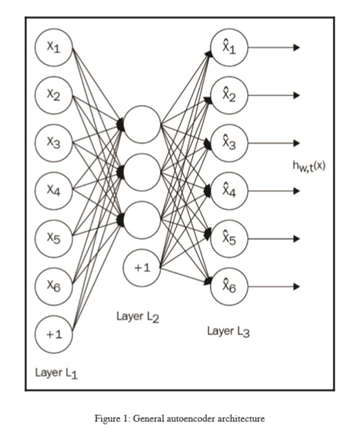

## (二)自动编码器的例子
在本章中，我们将展示一些使用MNIST数据集的自动编码器的不同变体的例子。例如，假设输入x为28×28图像(784像素)的像素强度值;输入数据样本的个数是n=784。在L2层有s2=392个隐藏单元。由于输出和输入数据样本的尺寸相同，y∈R784。输入层神经元数量为784个，中间层L2神经元数量为392个;所以网络将是一个较低的表示，这是一个压缩版本的输出。然后，网络将把输入a(L2) ∈R392压缩后的较低表示形式提供给网络的第二部分，后者将努力从这个压缩版本重构输入像素784。

自动编码器依赖于这样一个事实，即由图像像素表示的输入样本将以某种方式相互关联，然后它将利用这个事实来重构它们。因此，自动编码器有点类似于降维技术，因为它们还可以学习输入数据的更低表示形式。

综上所述，一个典型的自动编码器由三部分组成:
1.编码器部分，负责将输入压缩成较低的表示形式
2.代码，它是编码器的中间结果
3.解码器，它负责用这个代码重建原始输入

下图显示了一个典型的自动编码器的三个主要组件:

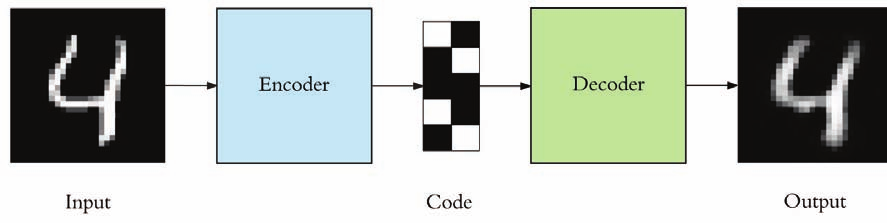

正如我们所提到的，自动编码器部分学习输入的压缩表示，然后将其输入到第三部分，第三部分试图重构输入。重构后的输入与输出类似，但与原始输出并不完全相同，因此自动编码器不能用于压缩任务。

## (二)自动编码器的结构
正如我们所提到的，一个典型的自动编码器由三个部分组成。让我们更详细地探讨这三个部分。为了激励你们，我们不打算在这一章里重复发明轮子。编码器-解码器部分是一个完全连接的神经网络，而代码部分是另一个神经网络，但它没有完全连接。该代码部分的维度是可控的，我们可以把它当作一个超参数:

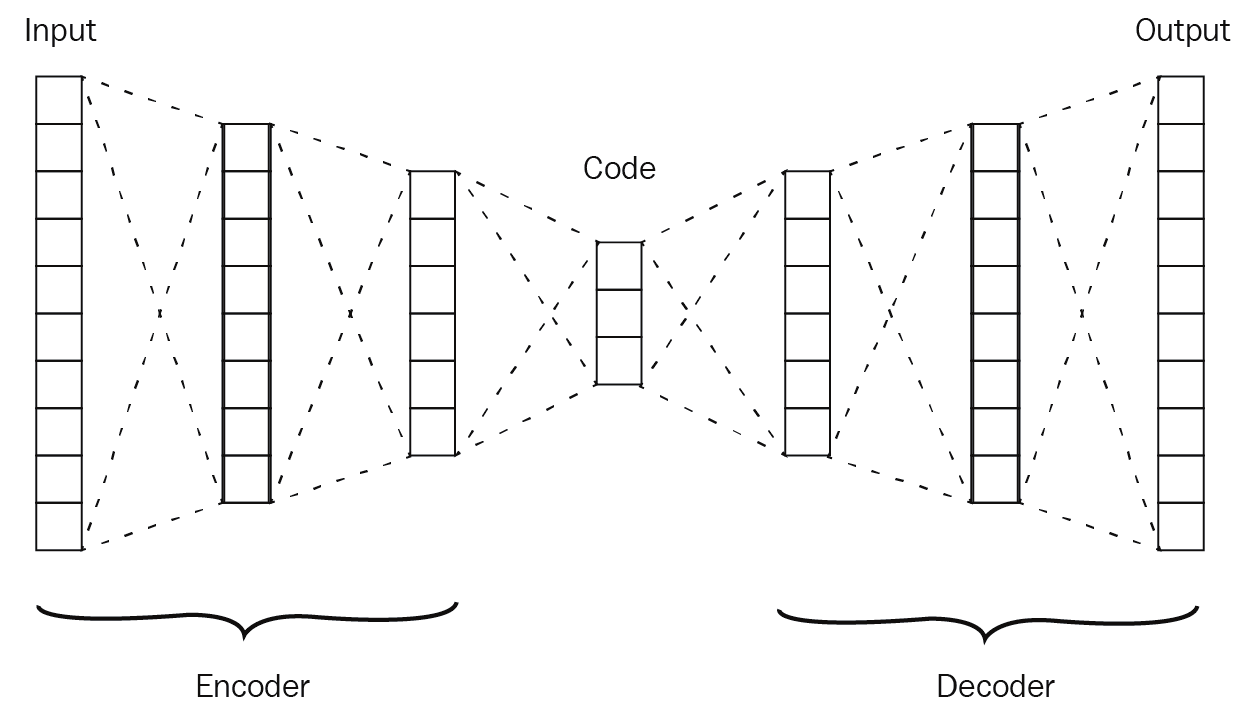

在深入使用自动编码器压缩MNIST数据集之前，我们将列出一组超参数，我们可以使用它们来微调自动编码器模型。超参数主要有四个:

1、代码部分大小:这是中间层的单元数。这一层的单元数越少，我们得到的输入表示就越压缩。

2、编码器和解码器的层数:正如我们所提到的，编码器和解码器只是一个完全连接的神经网络，我们可以通过添加更多的层来尽可能深入地构建它。

3、每个层的单元数:我们也可以在每个层中使用不同数量的单元数。编码器和解码器的形状非常类似于反解码器，当我们接近代码部分时，编码器中的层数会减少，然后在接近解码器的最后一层时开始增加。

4、模型损失函数:我们可以使用不同的损失函数，如MSE或交叉熵。

在定义这些超参数并给出初始值之后，我们可以使用反向传播算法对网络进行训练。


## (三)压缩MNIST数据集
在这一部分中，我们将构建一个简单的自编码器，用于压缩MNIST数据集。因此，我们将把这个数据集的图像输入到编码器部分，编码器将尝试为它们学习一个较低的压缩表示;然后在解码器部分尝试重新构造输入图像。

### 1.MNIST数据集

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
import tensorflow.examples.tutorials.mnist.input_data as input_data
mnist_dataset = input_data.read_data_sets("MNIST_data/",validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


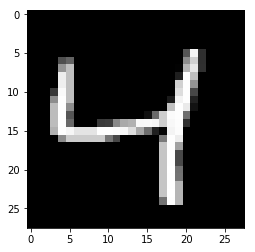

In [4]:
#从训练集中选取一个图像画出来
image = mnist_dataset.train.images[2]
plt.imshow(image.reshape((28,28)),cmap = 'Greys_r')#从训练集中选取一个图像画出来

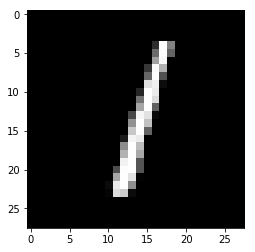

In [5]:
#从训练集中选取一个图像画出来
image = mnist_dataset.test.images[2]
plt.imshow(image.reshape((28,28)), cmap= 'Greys_r')

### 2.建立模型
为了构建编码器，我们需要计算出每个MNIST图像将有多少像素，这样我们就可以计算出编码器的输入层的大小。来自MNIST数据集的每张图像都是28×28像素，因此我们将把这个矩阵重塑为一个28×28 = 784像素值的向量。我们不需要标准化MNIST的图像因为它们已经标准化了。

让我们开始构建模型的三个组件。在这个实现中，我们将使用一个非常简单的架构，即一个隐藏层，后面是ReLU激活
如下图所示:


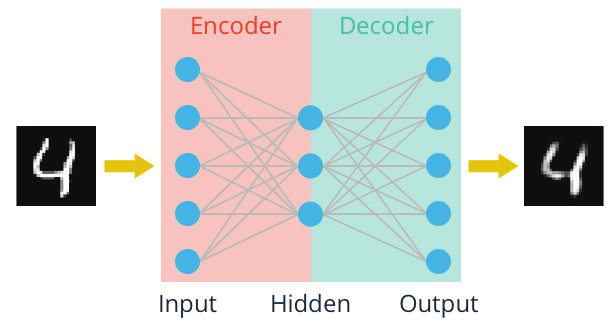


让我们按照前面的解释来实现这个简单的编码器-解码器架构:

In [6]:
#编码层的大小或者说是隐藏层的大小
img_size = mnist_dataset.train.images.shape[1]
img_size

784

In [7]:
#编码层或者隐藏层的大小
encoding_layer_dim = 32
img_size =  mnist_dataset.train.images.shape[1]

In [8]:
#定义输入和目标值的占位符变量,其中placeholder中的None是指后续训练会传入很多数字图像，项数不固定，所以设置为None
#img_size就是图像的大小，是28x28的
inputs_values = tf.placeholder(tf.float32,(None,img_size),name = "inputs_values")
targets_values = tf.placeholder(tf.float32,(None,img_size),name = "targets_values")

In [9]:
#定义一个接受输入值并对其进行编码的编码层
encoding_layer = tf.layers.dense(inputs_values, encoding_layer_dim,activation = tf.nn.relu)
#其中定义激活函数tf.nn.relu

In [10]:
#定义logit层，这是一个完全连接的层，但是它的输出没有任何激活函数
logits_layer = tf.layers.dense(encoding_layer, img_size, activation = None)

#### 定义解码层

In [11]:
#在logit层后面添加一个sigmoid层
decoding_layer = tf.sigmoid(logits_layer,name = "decoding_layer")

In [12]:
#用sigmoid函数交叉熵作为一个损失函数
model_loss = tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_layer,labels=targets_values)

In [13]:
#平均输入数据的损失值
model_cost = tf.reduce_mean(model_loss)

In [14]:
#现在我们有了一个损失函数，我们需要使用Adam优化器来优化它
model_optimizier = tf.train.AdamOptimizer().minimize(model_cost)

现在我们已经定义了我们的模型并且使用了二进制交叉熵作为损失函数，并且图像值已经标准化了。

### 3.模型训练
在本节中，我们将开始训练过程。我们将使用mnist_dataset对象的辅助函数，以便从具有特定大小的数据集中获得随机批处理;然后我们将对这批图像运行优化器。

让我们从创建会话变量开始这一节，它将负责执行我们前面定义的计算图:

In [15]:
#创建会话
sess = tf.Session()

接下来，让我们开始训练过程:

In [16]:
#现在让我们开始训练过程
num_epochs = 20 #执行20个周期
train_batch_size = 200 #每一批次200数据

sess.run(tf.global_variables_initializer())#初始化所有tensorflow全局变量
for e in range(num_epochs):  #使e循环遍历num_epcohs 即20个周期
    for ii in range(mnist_dataset.train.num_examples//train_batch_size): #使用60000项数据进行训练，分为每一批次200项数据，所以有300个批次
        input_batch = mnist_dataset.train.next_batch(train_batch_size)  #调用.next_batch函数，每次拿取200个数据进行训练
        feed_dict = {inputs_values: input_batch[0], targets_values:input_batch[0]} #把 input_batch[0]得值喂给inputs_values,把input_batch[0]喂给targets_values
        input_batch_cost, _ = sess.run([model_cost, model_optimizier],feed_dict=feed_dict)# 运行这些代码    
        
        print("Epoch:{}/{}...".format(e+1, num_epochs),"Training loss: {:.3f}".format(input_batch_cost)) #保留小数点后三位

Epoch:1/20... Training loss: 0.695
Epoch:1/20... Training loss: 0.691
Epoch:1/20... Training loss: 0.688
Epoch:1/20... Training loss: 0.684
Epoch:1/20... Training loss: 0.679
Epoch:1/20... Training loss: 0.674
Epoch:1/20... Training loss: 0.666
Epoch:1/20... Training loss: 0.659
Epoch:1/20... Training loss: 0.650
Epoch:1/20... Training loss: 0.640
Epoch:1/20... Training loss: 0.626
Epoch:1/20... Training loss: 0.614
Epoch:1/20... Training loss: 0.600
Epoch:1/20... Training loss: 0.587
Epoch:1/20... Training loss: 0.569
Epoch:1/20... Training loss: 0.551
Epoch:1/20... Training loss: 0.534
Epoch:1/20... Training loss: 0.517
Epoch:1/20... Training loss: 0.498
Epoch:1/20... Training loss: 0.477
Epoch:1/20... Training loss: 0.464
Epoch:1/20... Training loss: 0.449
Epoch:1/20... Training loss: 0.431
Epoch:1/20... Training loss: 0.420
Epoch:1/20... Training loss: 0.404
Epoch:1/20... Training loss: 0.398
Epoch:1/20... Training loss: 0.376
Epoch:1/20... Training loss: 0.371
Epoch:1/20... Traini

Epoch:1/20... Training loss: 0.187
Epoch:1/20... Training loss: 0.194
Epoch:1/20... Training loss: 0.189
Epoch:1/20... Training loss: 0.193
Epoch:1/20... Training loss: 0.197
Epoch:1/20... Training loss: 0.191
Epoch:1/20... Training loss: 0.192
Epoch:1/20... Training loss: 0.193
Epoch:1/20... Training loss: 0.188
Epoch:1/20... Training loss: 0.190
Epoch:1/20... Training loss: 0.188
Epoch:1/20... Training loss: 0.198
Epoch:1/20... Training loss: 0.191
Epoch:1/20... Training loss: 0.193
Epoch:1/20... Training loss: 0.190
Epoch:1/20... Training loss: 0.189
Epoch:1/20... Training loss: 0.189
Epoch:1/20... Training loss: 0.190
Epoch:1/20... Training loss: 0.186
Epoch:1/20... Training loss: 0.190
Epoch:1/20... Training loss: 0.189
Epoch:1/20... Training loss: 0.194
Epoch:1/20... Training loss: 0.188
Epoch:1/20... Training loss: 0.187
Epoch:1/20... Training loss: 0.189
Epoch:1/20... Training loss: 0.182
Epoch:1/20... Training loss: 0.190
Epoch:1/20... Training loss: 0.195
Epoch:1/20... Traini

Epoch:2/20... Training loss: 0.155
Epoch:2/20... Training loss: 0.154
Epoch:2/20... Training loss: 0.147
Epoch:2/20... Training loss: 0.161
Epoch:2/20... Training loss: 0.157
Epoch:2/20... Training loss: 0.151
Epoch:2/20... Training loss: 0.152
Epoch:2/20... Training loss: 0.157
Epoch:2/20... Training loss: 0.157
Epoch:2/20... Training loss: 0.151
Epoch:2/20... Training loss: 0.151
Epoch:2/20... Training loss: 0.154
Epoch:2/20... Training loss: 0.155
Epoch:2/20... Training loss: 0.154
Epoch:2/20... Training loss: 0.151
Epoch:2/20... Training loss: 0.152
Epoch:2/20... Training loss: 0.150
Epoch:2/20... Training loss: 0.158
Epoch:2/20... Training loss: 0.152
Epoch:2/20... Training loss: 0.152
Epoch:2/20... Training loss: 0.154
Epoch:2/20... Training loss: 0.153
Epoch:2/20... Training loss: 0.153
Epoch:2/20... Training loss: 0.153
Epoch:2/20... Training loss: 0.147
Epoch:2/20... Training loss: 0.145
Epoch:2/20... Training loss: 0.153
Epoch:2/20... Training loss: 0.149
Epoch:2/20... Traini

Epoch:3/20... Training loss: 0.137
Epoch:3/20... Training loss: 0.132
Epoch:3/20... Training loss: 0.137
Epoch:3/20... Training loss: 0.131
Epoch:3/20... Training loss: 0.137
Epoch:3/20... Training loss: 0.135
Epoch:3/20... Training loss: 0.133
Epoch:3/20... Training loss: 0.130
Epoch:3/20... Training loss: 0.132
Epoch:3/20... Training loss: 0.127
Epoch:3/20... Training loss: 0.132
Epoch:3/20... Training loss: 0.133
Epoch:3/20... Training loss: 0.135
Epoch:3/20... Training loss: 0.135
Epoch:3/20... Training loss: 0.133
Epoch:3/20... Training loss: 0.134
Epoch:3/20... Training loss: 0.133
Epoch:3/20... Training loss: 0.132
Epoch:3/20... Training loss: 0.129
Epoch:3/20... Training loss: 0.128
Epoch:3/20... Training loss: 0.136
Epoch:3/20... Training loss: 0.129
Epoch:3/20... Training loss: 0.130
Epoch:3/20... Training loss: 0.134
Epoch:3/20... Training loss: 0.133
Epoch:3/20... Training loss: 0.133
Epoch:3/20... Training loss: 0.133
Epoch:3/20... Training loss: 0.135
Epoch:3/20... Traini

Epoch:4/20... Training loss: 0.118
Epoch:4/20... Training loss: 0.119
Epoch:4/20... Training loss: 0.122
Epoch:4/20... Training loss: 0.120
Epoch:4/20... Training loss: 0.118
Epoch:4/20... Training loss: 0.117
Epoch:4/20... Training loss: 0.122
Epoch:4/20... Training loss: 0.123
Epoch:4/20... Training loss: 0.122
Epoch:4/20... Training loss: 0.122
Epoch:4/20... Training loss: 0.120
Epoch:4/20... Training loss: 0.119
Epoch:4/20... Training loss: 0.126
Epoch:4/20... Training loss: 0.122
Epoch:4/20... Training loss: 0.117
Epoch:4/20... Training loss: 0.122
Epoch:4/20... Training loss: 0.121
Epoch:4/20... Training loss: 0.121
Epoch:4/20... Training loss: 0.121
Epoch:4/20... Training loss: 0.118
Epoch:4/20... Training loss: 0.125
Epoch:4/20... Training loss: 0.124
Epoch:4/20... Training loss: 0.122
Epoch:4/20... Training loss: 0.120
Epoch:4/20... Training loss: 0.119
Epoch:4/20... Training loss: 0.123
Epoch:4/20... Training loss: 0.118
Epoch:4/20... Training loss: 0.116
Epoch:4/20... Traini

Epoch:5/20... Training loss: 0.111
Epoch:5/20... Training loss: 0.114
Epoch:5/20... Training loss: 0.107
Epoch:5/20... Training loss: 0.108
Epoch:5/20... Training loss: 0.114
Epoch:5/20... Training loss: 0.111
Epoch:5/20... Training loss: 0.112
Epoch:5/20... Training loss: 0.112
Epoch:5/20... Training loss: 0.112
Epoch:5/20... Training loss: 0.111
Epoch:5/20... Training loss: 0.110
Epoch:5/20... Training loss: 0.111
Epoch:5/20... Training loss: 0.111
Epoch:5/20... Training loss: 0.113
Epoch:5/20... Training loss: 0.108
Epoch:5/20... Training loss: 0.112
Epoch:5/20... Training loss: 0.113
Epoch:5/20... Training loss: 0.108
Epoch:5/20... Training loss: 0.113
Epoch:5/20... Training loss: 0.112
Epoch:5/20... Training loss: 0.108
Epoch:5/20... Training loss: 0.110
Epoch:5/20... Training loss: 0.109
Epoch:5/20... Training loss: 0.112
Epoch:5/20... Training loss: 0.113
Epoch:5/20... Training loss: 0.110
Epoch:5/20... Training loss: 0.116
Epoch:5/20... Training loss: 0.113
Epoch:5/20... Traini

Epoch:6/20... Training loss: 0.111
Epoch:6/20... Training loss: 0.106
Epoch:6/20... Training loss: 0.108
Epoch:6/20... Training loss: 0.106
Epoch:6/20... Training loss: 0.111
Epoch:6/20... Training loss: 0.105
Epoch:6/20... Training loss: 0.110
Epoch:6/20... Training loss: 0.105
Epoch:6/20... Training loss: 0.107
Epoch:6/20... Training loss: 0.105
Epoch:6/20... Training loss: 0.106
Epoch:6/20... Training loss: 0.110
Epoch:6/20... Training loss: 0.105
Epoch:6/20... Training loss: 0.109
Epoch:6/20... Training loss: 0.103
Epoch:6/20... Training loss: 0.107
Epoch:6/20... Training loss: 0.103
Epoch:6/20... Training loss: 0.107
Epoch:6/20... Training loss: 0.103
Epoch:6/20... Training loss: 0.106
Epoch:6/20... Training loss: 0.105
Epoch:6/20... Training loss: 0.103
Epoch:6/20... Training loss: 0.104
Epoch:6/20... Training loss: 0.102
Epoch:6/20... Training loss: 0.105
Epoch:6/20... Training loss: 0.105
Epoch:6/20... Training loss: 0.106
Epoch:6/20... Training loss: 0.106
Epoch:6/20... Traini

Epoch:6/20... Training loss: 0.104
Epoch:6/20... Training loss: 0.100
Epoch:6/20... Training loss: 0.103
Epoch:6/20... Training loss: 0.102
Epoch:6/20... Training loss: 0.105
Epoch:6/20... Training loss: 0.104
Epoch:6/20... Training loss: 0.105
Epoch:6/20... Training loss: 0.100
Epoch:6/20... Training loss: 0.099
Epoch:6/20... Training loss: 0.101
Epoch:6/20... Training loss: 0.099
Epoch:6/20... Training loss: 0.099
Epoch:6/20... Training loss: 0.105
Epoch:6/20... Training loss: 0.100
Epoch:6/20... Training loss: 0.102
Epoch:6/20... Training loss: 0.101
Epoch:6/20... Training loss: 0.099
Epoch:6/20... Training loss: 0.102
Epoch:6/20... Training loss: 0.100
Epoch:6/20... Training loss: 0.101
Epoch:6/20... Training loss: 0.097
Epoch:6/20... Training loss: 0.100
Epoch:6/20... Training loss: 0.103
Epoch:6/20... Training loss: 0.100
Epoch:6/20... Training loss: 0.098
Epoch:6/20... Training loss: 0.103
Epoch:6/20... Training loss: 0.100
Epoch:6/20... Training loss: 0.098
Epoch:6/20... Traini

Epoch:7/20... Training loss: 0.103
Epoch:7/20... Training loss: 0.099
Epoch:7/20... Training loss: 0.100
Epoch:7/20... Training loss: 0.101
Epoch:7/20... Training loss: 0.096
Epoch:7/20... Training loss: 0.098
Epoch:7/20... Training loss: 0.101
Epoch:7/20... Training loss: 0.105
Epoch:7/20... Training loss: 0.101
Epoch:7/20... Training loss: 0.097
Epoch:7/20... Training loss: 0.102
Epoch:7/20... Training loss: 0.105
Epoch:7/20... Training loss: 0.096
Epoch:7/20... Training loss: 0.100
Epoch:7/20... Training loss: 0.096
Epoch:7/20... Training loss: 0.099
Epoch:7/20... Training loss: 0.099
Epoch:7/20... Training loss: 0.098
Epoch:7/20... Training loss: 0.099
Epoch:7/20... Training loss: 0.096
Epoch:7/20... Training loss: 0.098
Epoch:7/20... Training loss: 0.098
Epoch:7/20... Training loss: 0.099
Epoch:7/20... Training loss: 0.096
Epoch:7/20... Training loss: 0.099
Epoch:7/20... Training loss: 0.101
Epoch:7/20... Training loss: 0.099
Epoch:7/20... Training loss: 0.100
Epoch:7/20... Traini

Epoch:8/20... Training loss: 0.098
Epoch:8/20... Training loss: 0.095
Epoch:8/20... Training loss: 0.098
Epoch:8/20... Training loss: 0.097
Epoch:8/20... Training loss: 0.100
Epoch:8/20... Training loss: 0.099
Epoch:8/20... Training loss: 0.096
Epoch:8/20... Training loss: 0.098
Epoch:8/20... Training loss: 0.098
Epoch:8/20... Training loss: 0.097
Epoch:8/20... Training loss: 0.100
Epoch:8/20... Training loss: 0.097
Epoch:8/20... Training loss: 0.097
Epoch:8/20... Training loss: 0.098
Epoch:8/20... Training loss: 0.096
Epoch:8/20... Training loss: 0.098
Epoch:8/20... Training loss: 0.098
Epoch:8/20... Training loss: 0.094
Epoch:8/20... Training loss: 0.095
Epoch:8/20... Training loss: 0.098
Epoch:8/20... Training loss: 0.099
Epoch:8/20... Training loss: 0.099
Epoch:8/20... Training loss: 0.098
Epoch:8/20... Training loss: 0.095
Epoch:8/20... Training loss: 0.096
Epoch:8/20... Training loss: 0.101
Epoch:8/20... Training loss: 0.099
Epoch:8/20... Training loss: 0.094
Epoch:8/20... Traini

Epoch:9/20... Training loss: 0.097
Epoch:9/20... Training loss: 0.097
Epoch:9/20... Training loss: 0.095
Epoch:9/20... Training loss: 0.096
Epoch:9/20... Training loss: 0.096
Epoch:9/20... Training loss: 0.096
Epoch:9/20... Training loss: 0.094
Epoch:9/20... Training loss: 0.097
Epoch:9/20... Training loss: 0.098
Epoch:9/20... Training loss: 0.097
Epoch:9/20... Training loss: 0.093
Epoch:9/20... Training loss: 0.095
Epoch:9/20... Training loss: 0.096
Epoch:9/20... Training loss: 0.097
Epoch:9/20... Training loss: 0.099
Epoch:9/20... Training loss: 0.097
Epoch:9/20... Training loss: 0.093
Epoch:9/20... Training loss: 0.098
Epoch:9/20... Training loss: 0.094
Epoch:9/20... Training loss: 0.097
Epoch:9/20... Training loss: 0.096
Epoch:9/20... Training loss: 0.097
Epoch:9/20... Training loss: 0.097
Epoch:9/20... Training loss: 0.101
Epoch:9/20... Training loss: 0.099
Epoch:9/20... Training loss: 0.100
Epoch:9/20... Training loss: 0.094
Epoch:9/20... Training loss: 0.096
Epoch:9/20... Traini

Epoch:10/20... Training loss: 0.097
Epoch:10/20... Training loss: 0.099
Epoch:10/20... Training loss: 0.098
Epoch:10/20... Training loss: 0.098
Epoch:10/20... Training loss: 0.096
Epoch:10/20... Training loss: 0.094
Epoch:10/20... Training loss: 0.094
Epoch:10/20... Training loss: 0.097
Epoch:10/20... Training loss: 0.096
Epoch:10/20... Training loss: 0.097
Epoch:10/20... Training loss: 0.095
Epoch:10/20... Training loss: 0.095
Epoch:10/20... Training loss: 0.099
Epoch:10/20... Training loss: 0.097
Epoch:10/20... Training loss: 0.096
Epoch:10/20... Training loss: 0.097
Epoch:10/20... Training loss: 0.100
Epoch:10/20... Training loss: 0.098
Epoch:10/20... Training loss: 0.096
Epoch:10/20... Training loss: 0.100
Epoch:10/20... Training loss: 0.096
Epoch:10/20... Training loss: 0.102
Epoch:10/20... Training loss: 0.094
Epoch:10/20... Training loss: 0.096
Epoch:10/20... Training loss: 0.094
Epoch:10/20... Training loss: 0.094
Epoch:10/20... Training loss: 0.092
Epoch:10/20... Training loss

Epoch:11/20... Training loss: 0.094
Epoch:11/20... Training loss: 0.092
Epoch:11/20... Training loss: 0.094
Epoch:11/20... Training loss: 0.092
Epoch:11/20... Training loss: 0.094
Epoch:11/20... Training loss: 0.093
Epoch:11/20... Training loss: 0.097
Epoch:11/20... Training loss: 0.096
Epoch:11/20... Training loss: 0.096
Epoch:11/20... Training loss: 0.093
Epoch:11/20... Training loss: 0.094
Epoch:11/20... Training loss: 0.097
Epoch:11/20... Training loss: 0.096
Epoch:11/20... Training loss: 0.093
Epoch:11/20... Training loss: 0.094
Epoch:11/20... Training loss: 0.099
Epoch:11/20... Training loss: 0.094
Epoch:11/20... Training loss: 0.096
Epoch:11/20... Training loss: 0.095
Epoch:11/20... Training loss: 0.097
Epoch:11/20... Training loss: 0.091
Epoch:11/20... Training loss: 0.095
Epoch:11/20... Training loss: 0.093
Epoch:11/20... Training loss: 0.093
Epoch:11/20... Training loss: 0.094
Epoch:11/20... Training loss: 0.096
Epoch:11/20... Training loss: 0.097
Epoch:11/20... Training loss

Epoch:11/20... Training loss: 0.092
Epoch:11/20... Training loss: 0.093
Epoch:11/20... Training loss: 0.099
Epoch:11/20... Training loss: 0.092
Epoch:11/20... Training loss: 0.094
Epoch:11/20... Training loss: 0.097
Epoch:11/20... Training loss: 0.095
Epoch:11/20... Training loss: 0.096
Epoch:11/20... Training loss: 0.096
Epoch:11/20... Training loss: 0.089
Epoch:11/20... Training loss: 0.093
Epoch:11/20... Training loss: 0.091
Epoch:11/20... Training loss: 0.094
Epoch:11/20... Training loss: 0.098
Epoch:11/20... Training loss: 0.097
Epoch:11/20... Training loss: 0.090
Epoch:11/20... Training loss: 0.095
Epoch:11/20... Training loss: 0.093
Epoch:11/20... Training loss: 0.093
Epoch:11/20... Training loss: 0.095
Epoch:11/20... Training loss: 0.096
Epoch:11/20... Training loss: 0.097
Epoch:11/20... Training loss: 0.095
Epoch:11/20... Training loss: 0.097
Epoch:11/20... Training loss: 0.097
Epoch:11/20... Training loss: 0.092
Epoch:11/20... Training loss: 0.094
Epoch:11/20... Training loss

Epoch:12/20... Training loss: 0.097
Epoch:12/20... Training loss: 0.097
Epoch:12/20... Training loss: 0.092
Epoch:12/20... Training loss: 0.097
Epoch:12/20... Training loss: 0.095
Epoch:12/20... Training loss: 0.095
Epoch:12/20... Training loss: 0.094
Epoch:12/20... Training loss: 0.092
Epoch:12/20... Training loss: 0.093
Epoch:12/20... Training loss: 0.096
Epoch:12/20... Training loss: 0.094
Epoch:12/20... Training loss: 0.096
Epoch:12/20... Training loss: 0.094
Epoch:12/20... Training loss: 0.095
Epoch:12/20... Training loss: 0.095
Epoch:12/20... Training loss: 0.094
Epoch:12/20... Training loss: 0.092
Epoch:12/20... Training loss: 0.093
Epoch:12/20... Training loss: 0.093
Epoch:12/20... Training loss: 0.096
Epoch:12/20... Training loss: 0.098
Epoch:12/20... Training loss: 0.093
Epoch:12/20... Training loss: 0.094
Epoch:12/20... Training loss: 0.095
Epoch:12/20... Training loss: 0.095
Epoch:12/20... Training loss: 0.095
Epoch:12/20... Training loss: 0.094
Epoch:12/20... Training loss

Epoch:13/20... Training loss: 0.094
Epoch:13/20... Training loss: 0.091
Epoch:13/20... Training loss: 0.096
Epoch:13/20... Training loss: 0.098
Epoch:13/20... Training loss: 0.092
Epoch:13/20... Training loss: 0.095
Epoch:13/20... Training loss: 0.091
Epoch:13/20... Training loss: 0.095
Epoch:13/20... Training loss: 0.095
Epoch:13/20... Training loss: 0.098
Epoch:13/20... Training loss: 0.096
Epoch:13/20... Training loss: 0.095
Epoch:13/20... Training loss: 0.091
Epoch:13/20... Training loss: 0.091
Epoch:13/20... Training loss: 0.098
Epoch:13/20... Training loss: 0.093
Epoch:13/20... Training loss: 0.093
Epoch:13/20... Training loss: 0.096
Epoch:13/20... Training loss: 0.097
Epoch:13/20... Training loss: 0.094
Epoch:13/20... Training loss: 0.096
Epoch:13/20... Training loss: 0.093
Epoch:13/20... Training loss: 0.093
Epoch:13/20... Training loss: 0.091
Epoch:13/20... Training loss: 0.091
Epoch:13/20... Training loss: 0.094
Epoch:13/20... Training loss: 0.089
Epoch:13/20... Training loss

Epoch:14/20... Training loss: 0.095
Epoch:14/20... Training loss: 0.091
Epoch:14/20... Training loss: 0.087
Epoch:14/20... Training loss: 0.093
Epoch:14/20... Training loss: 0.094
Epoch:14/20... Training loss: 0.094
Epoch:14/20... Training loss: 0.096
Epoch:14/20... Training loss: 0.093
Epoch:14/20... Training loss: 0.091
Epoch:14/20... Training loss: 0.092
Epoch:14/20... Training loss: 0.095
Epoch:14/20... Training loss: 0.090
Epoch:14/20... Training loss: 0.094
Epoch:14/20... Training loss: 0.098
Epoch:14/20... Training loss: 0.094
Epoch:14/20... Training loss: 0.097
Epoch:14/20... Training loss: 0.091
Epoch:14/20... Training loss: 0.093
Epoch:14/20... Training loss: 0.092
Epoch:14/20... Training loss: 0.095
Epoch:14/20... Training loss: 0.095
Epoch:14/20... Training loss: 0.094
Epoch:14/20... Training loss: 0.094
Epoch:14/20... Training loss: 0.091
Epoch:14/20... Training loss: 0.092
Epoch:14/20... Training loss: 0.092
Epoch:14/20... Training loss: 0.092
Epoch:14/20... Training loss

Epoch:15/20... Training loss: 0.093
Epoch:15/20... Training loss: 0.094
Epoch:15/20... Training loss: 0.094
Epoch:15/20... Training loss: 0.095
Epoch:15/20... Training loss: 0.089
Epoch:15/20... Training loss: 0.092
Epoch:15/20... Training loss: 0.092
Epoch:15/20... Training loss: 0.095
Epoch:15/20... Training loss: 0.095
Epoch:15/20... Training loss: 0.093
Epoch:15/20... Training loss: 0.093
Epoch:15/20... Training loss: 0.095
Epoch:15/20... Training loss: 0.097
Epoch:15/20... Training loss: 0.095
Epoch:15/20... Training loss: 0.095
Epoch:15/20... Training loss: 0.092
Epoch:15/20... Training loss: 0.092
Epoch:15/20... Training loss: 0.093
Epoch:15/20... Training loss: 0.095
Epoch:15/20... Training loss: 0.098
Epoch:15/20... Training loss: 0.095
Epoch:15/20... Training loss: 0.094
Epoch:15/20... Training loss: 0.095
Epoch:15/20... Training loss: 0.096
Epoch:15/20... Training loss: 0.092
Epoch:15/20... Training loss: 0.094
Epoch:15/20... Training loss: 0.093
Epoch:15/20... Training loss

Epoch:16/20... Training loss: 0.092
Epoch:16/20... Training loss: 0.096
Epoch:16/20... Training loss: 0.091
Epoch:16/20... Training loss: 0.097
Epoch:16/20... Training loss: 0.095
Epoch:16/20... Training loss: 0.095
Epoch:16/20... Training loss: 0.096
Epoch:16/20... Training loss: 0.094
Epoch:16/20... Training loss: 0.093
Epoch:16/20... Training loss: 0.091
Epoch:16/20... Training loss: 0.093
Epoch:16/20... Training loss: 0.092
Epoch:16/20... Training loss: 0.095
Epoch:16/20... Training loss: 0.092
Epoch:16/20... Training loss: 0.091
Epoch:16/20... Training loss: 0.092
Epoch:16/20... Training loss: 0.093
Epoch:16/20... Training loss: 0.094
Epoch:16/20... Training loss: 0.091
Epoch:16/20... Training loss: 0.094
Epoch:16/20... Training loss: 0.093
Epoch:16/20... Training loss: 0.096
Epoch:16/20... Training loss: 0.094
Epoch:16/20... Training loss: 0.093
Epoch:16/20... Training loss: 0.094
Epoch:16/20... Training loss: 0.091
Epoch:16/20... Training loss: 0.093
Epoch:16/20... Training loss

Epoch:16/20... Training loss: 0.094
Epoch:16/20... Training loss: 0.091
Epoch:16/20... Training loss: 0.094
Epoch:16/20... Training loss: 0.096
Epoch:16/20... Training loss: 0.095
Epoch:16/20... Training loss: 0.095
Epoch:16/20... Training loss: 0.096
Epoch:16/20... Training loss: 0.093
Epoch:16/20... Training loss: 0.093
Epoch:16/20... Training loss: 0.090
Epoch:16/20... Training loss: 0.095
Epoch:16/20... Training loss: 0.093
Epoch:16/20... Training loss: 0.096
Epoch:16/20... Training loss: 0.094
Epoch:16/20... Training loss: 0.094
Epoch:16/20... Training loss: 0.093
Epoch:16/20... Training loss: 0.095
Epoch:16/20... Training loss: 0.096
Epoch:16/20... Training loss: 0.094
Epoch:16/20... Training loss: 0.090
Epoch:16/20... Training loss: 0.096
Epoch:16/20... Training loss: 0.094
Epoch:16/20... Training loss: 0.095
Epoch:16/20... Training loss: 0.092
Epoch:16/20... Training loss: 0.092
Epoch:16/20... Training loss: 0.095
Epoch:16/20... Training loss: 0.092
Epoch:16/20... Training loss

Epoch:17/20... Training loss: 0.094
Epoch:17/20... Training loss: 0.090
Epoch:17/20... Training loss: 0.096
Epoch:17/20... Training loss: 0.095
Epoch:17/20... Training loss: 0.096
Epoch:17/20... Training loss: 0.095
Epoch:17/20... Training loss: 0.094
Epoch:17/20... Training loss: 0.093
Epoch:17/20... Training loss: 0.090
Epoch:17/20... Training loss: 0.092
Epoch:17/20... Training loss: 0.089
Epoch:17/20... Training loss: 0.092
Epoch:17/20... Training loss: 0.094
Epoch:17/20... Training loss: 0.094
Epoch:17/20... Training loss: 0.094
Epoch:17/20... Training loss: 0.094
Epoch:17/20... Training loss: 0.096
Epoch:17/20... Training loss: 0.091
Epoch:17/20... Training loss: 0.095
Epoch:17/20... Training loss: 0.096
Epoch:17/20... Training loss: 0.094
Epoch:17/20... Training loss: 0.098
Epoch:17/20... Training loss: 0.090
Epoch:17/20... Training loss: 0.092
Epoch:17/20... Training loss: 0.091
Epoch:17/20... Training loss: 0.094
Epoch:17/20... Training loss: 0.093
Epoch:17/20... Training loss

Epoch:18/20... Training loss: 0.093
Epoch:18/20... Training loss: 0.094
Epoch:18/20... Training loss: 0.095
Epoch:18/20... Training loss: 0.090
Epoch:18/20... Training loss: 0.093
Epoch:18/20... Training loss: 0.094
Epoch:18/20... Training loss: 0.096
Epoch:18/20... Training loss: 0.090
Epoch:18/20... Training loss: 0.095
Epoch:18/20... Training loss: 0.091
Epoch:18/20... Training loss: 0.091
Epoch:18/20... Training loss: 0.092
Epoch:18/20... Training loss: 0.093
Epoch:18/20... Training loss: 0.092
Epoch:18/20... Training loss: 0.091
Epoch:18/20... Training loss: 0.092
Epoch:18/20... Training loss: 0.093
Epoch:18/20... Training loss: 0.093
Epoch:18/20... Training loss: 0.097
Epoch:18/20... Training loss: 0.094
Epoch:18/20... Training loss: 0.092
Epoch:18/20... Training loss: 0.093
Epoch:18/20... Training loss: 0.095
Epoch:18/20... Training loss: 0.093
Epoch:18/20... Training loss: 0.097
Epoch:18/20... Training loss: 0.095
Epoch:18/20... Training loss: 0.095
Epoch:18/20... Training loss

Epoch:19/20... Training loss: 0.094
Epoch:19/20... Training loss: 0.092
Epoch:19/20... Training loss: 0.092
Epoch:19/20... Training loss: 0.093
Epoch:19/20... Training loss: 0.095
Epoch:19/20... Training loss: 0.093
Epoch:19/20... Training loss: 0.092
Epoch:19/20... Training loss: 0.091
Epoch:19/20... Training loss: 0.096
Epoch:19/20... Training loss: 0.094
Epoch:19/20... Training loss: 0.093
Epoch:19/20... Training loss: 0.094
Epoch:19/20... Training loss: 0.094
Epoch:19/20... Training loss: 0.088
Epoch:19/20... Training loss: 0.091
Epoch:19/20... Training loss: 0.090
Epoch:19/20... Training loss: 0.095
Epoch:19/20... Training loss: 0.096
Epoch:19/20... Training loss: 0.093
Epoch:19/20... Training loss: 0.093
Epoch:19/20... Training loss: 0.088
Epoch:19/20... Training loss: 0.091
Epoch:19/20... Training loss: 0.093
Epoch:19/20... Training loss: 0.095
Epoch:19/20... Training loss: 0.094
Epoch:19/20... Training loss: 0.099
Epoch:19/20... Training loss: 0.089
Epoch:19/20... Training loss

Epoch:20/20... Training loss: 0.094
Epoch:20/20... Training loss: 0.092
Epoch:20/20... Training loss: 0.093
Epoch:20/20... Training loss: 0.090
Epoch:20/20... Training loss: 0.093
Epoch:20/20... Training loss: 0.096
Epoch:20/20... Training loss: 0.094
Epoch:20/20... Training loss: 0.093
Epoch:20/20... Training loss: 0.093
Epoch:20/20... Training loss: 0.088
Epoch:20/20... Training loss: 0.091
Epoch:20/20... Training loss: 0.096
Epoch:20/20... Training loss: 0.091
Epoch:20/20... Training loss: 0.094
Epoch:20/20... Training loss: 0.094
Epoch:20/20... Training loss: 0.095
Epoch:20/20... Training loss: 0.091
Epoch:20/20... Training loss: 0.088
Epoch:20/20... Training loss: 0.092
Epoch:20/20... Training loss: 0.093
Epoch:20/20... Training loss: 0.092
Epoch:20/20... Training loss: 0.091
Epoch:20/20... Training loss: 0.091
Epoch:20/20... Training loss: 0.091
Epoch:20/20... Training loss: 0.093
Epoch:20/20... Training loss: 0.091
Epoch:20/20... Training loss: 0.091
Epoch:20/20... Training loss

Epoch:20/20... Training loss: 0.095
Epoch:20/20... Training loss: 0.093
Epoch:20/20... Training loss: 0.091
Epoch:20/20... Training loss: 0.097
Epoch:20/20... Training loss: 0.090
Epoch:20/20... Training loss: 0.094
Epoch:20/20... Training loss: 0.094
Epoch:20/20... Training loss: 0.095
Epoch:20/20... Training loss: 0.096
Epoch:20/20... Training loss: 0.092
Epoch:20/20... Training loss: 0.095
Epoch:20/20... Training loss: 0.093
Epoch:20/20... Training loss: 0.096
Epoch:20/20... Training loss: 0.092
Epoch:20/20... Training loss: 0.092
Epoch:20/20... Training loss: 0.093
Epoch:20/20... Training loss: 0.092
Epoch:20/20... Training loss: 0.093
Epoch:20/20... Training loss: 0.093
Epoch:20/20... Training loss: 0.093
Epoch:20/20... Training loss: 0.090
Epoch:20/20... Training loss: 0.096
Epoch:20/20... Training loss: 0.093
Epoch:20/20... Training loss: 0.094
Epoch:20/20... Training loss: 0.091
Epoch:20/20... Training loss: 0.091
Epoch:20/20... Training loss: 0.088
Epoch:20/20... Training loss

在运行前面的代码片段20个epoch之后，我们将得到一个经过训练的模型，它能够从MNIST数据的测试集生成或重构图像。
请记住，如果我们输入的图像与模型所训练的图像不相似，那么重构过程就无法工作，因为自动编码器是特定于数据的。

让我们从测试集中获取一些图像，对训练好的模型进行测试，看看模型在解码器部分是如何进行重构的:

(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)
(784,)


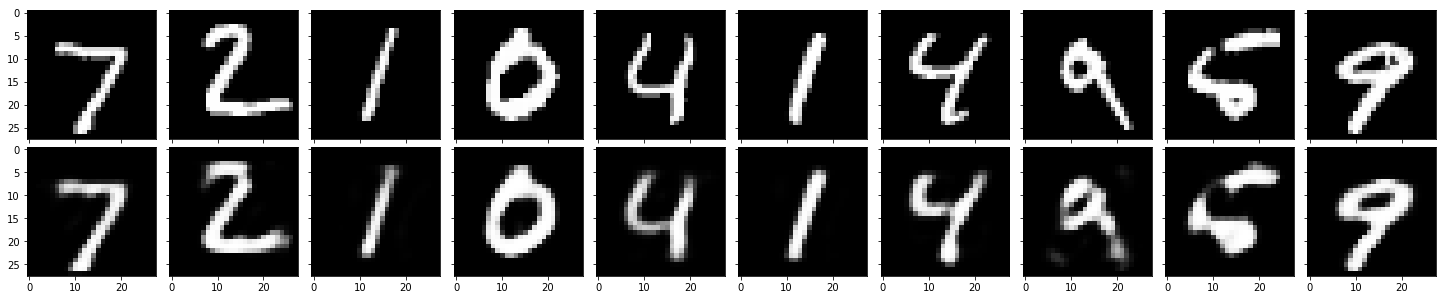

In [17]:
fig, axes = plt.subplots(nrows=2, ncols = 10, sharex=True, sharey=True, figsize=(20,4))#就是绘制行为2列为10的图像集，图片大小为20x4
input_images = mnist_dataset.test.images[:10]#先取出mnist训练图像的前十个值   
reconstructed_images, compressed_images = sess.run([decoding_layer, encoding_layer], 
feed_dict={inputs_values:input_images})#decoding_layer = tf.sigmoid(logits_layer,name = "decoding_layer")
                                       #encoding_layer = tf.layers.dense(inputs_values, encoding_layer_dim,activation = tf.nn.relu)
for imgs, row in zip([input_images, reconstructed_images], axes): #用img遍历输入的图像和重构的图像
    for img, ax in zip(imgs, row):  #然后用img一次遍历imgs的图像
        print(img.shape)
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(True) #True代表显示坐标轴，False代表隐藏坐标轴
        ax.get_yaxis().set_visible(True)

    fig.tight_layout(pad=0.1)#调整多个图之间的间隔来减少堆叠，pad值越大，间隔越大

正如你所看到的，重构的图像与输入的图像非常接近，但是我们可以在编码器-解码器部分使用卷积层得到更好的图像

# (四) 卷积神经网络自动编码器
前面的简单实现在尝试从MNIST数据集重构输入图像时做得很好，但是我们可以通过编码器中的卷积层和自动编码器的解码器部分获得更好的性能。这种替换的结果网络称为卷积自动编码器(CAE)。能够替换层的这种灵活性是自动编码器的一大优点，使它们适用于不同的领域。

我们将用于CAE的架构将在网络的解码器部分包含上采样层，以获得图像的重构版本。

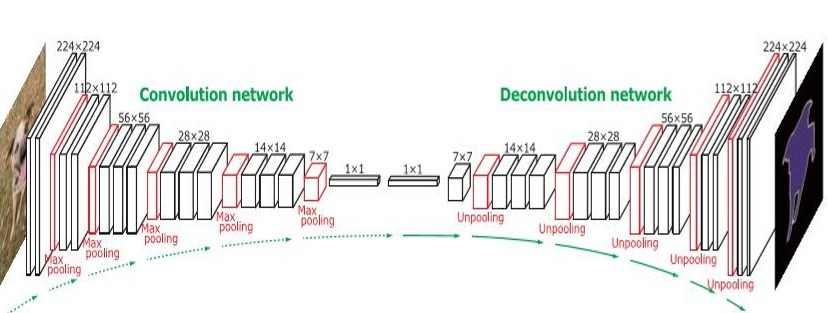


## 数据集
在这个代码实现中，我们可以使用任何类型的成像数据集，看看如何自动编码器的卷积版本会有所不同。我们仍然会使用MNIST为此数据集，所以让我们从使用TensorFlow助手获取数据集开始:

In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [18]:
import tensorflow.examples.tutorials.mnist.input_data as input_data#导入数据
mnist_dataset = input_data.read_data_sets("MNIST_data/",validation_size=0)#设置验证数据为0

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


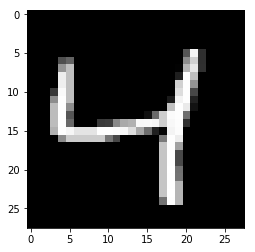

In [19]:
#从训练集中选取一个图像画出来
image = mnist_dataset.train.images[2]
plt.imshow(image.reshape((28,28)),cmap = 'Greys_r')#从训练集中选取一个图像画出来

## 建立模型
在这个实现中，我们将使用步长为1的卷积层，pading = same。这样，我们就不会改变图像的高度或宽度。另外，我们使用一组最大池化层来减少图像的宽度和高度，从而构建图像的压缩较低的表示形式。

In [20]:
learning_rate = 0.001 #设置学习率为0.001
#为输入和目标值定义占位符变量，1为黑白色
inputs_values = tf.placeholder(tf.float32, (None, 28, 28, 1), name='inputs_values')
targets_values = tf.placeholder(tf.float32, (None, 28, 28, 1), name='targets_values')

In [21]:
inputs_values

<tf.Tensor 'inputs_values_1:0' shape=(?, 28, 28, 1) dtype=float32>

In [22]:
#定义netowrk的编码器部分
##在编码器parrt中定义第一个卷积层
#输出的张量将会是28x28x16 conv2d，就是二维卷积层，即对图像的空域卷积。该层对二维输入进行滑动窗卷积，滤镜16个，每一个滤镜3x3大小，
#让卷积运算产生的图像大小不变 激活函数为relu
conv_layer_1 = tf.layers.conv2d(inputs=inputs_values, filters=16, kernel_size=(3,3), padding='same', 
                                activation=tf.nn.relu)

In [23]:
#输出张量的形状为14x14x16   池化大小大小为2x2，步长为从左至右从上至下分别移动两格，same模式会在边界之外补零，使输入与输出图像的大小相同
maxpool_layer_1 = tf.layers.max_pooling2d(conv_layer_1, pool_size=(2,2), strides=(2,2), padding='same')

In [24]:
#输出张量的形状为14x14x8，滤镜8个，滤镜大小为3x3，same模式会在边界之外补零，使输入与输出图像的大小相同
conv_layer_2 = tf.layers.conv2d(inputs=maxpool_layer_1, filters=8, kernel_size=(3,3),
                                padding='same', activation=tf.nn.relu)

In [25]:
#输出张量的形状为7x7x8 ，池化大小为2x2，步长从左至右，从上至下分别移动两格，same模式会在边界之外补零，使输入与输出图像的大小相同
maxpool_layer_2 = tf.layers.max_pooling2d(conv_layer_2, pool_size=(2,2), strides=(2,2), padding='same')

In [26]:
#输出张量的形状为7x7x8，滤镜8个，滤镜大小为3x3，same模式会在边界之外补零，使输入与输出图像的大小相同
conv_layer_3 = tf.layers.conv2d(inputs = maxpool_layer_2, filters=8,kernel_size=(3,3),
                               padding='same',activation=tf.nn.relu)

In [27]:
#输出张量的形状为4x4x8，池化大小为2x2，步长从左至右，从上至下分别移动两格，same模式会在边界之外补零，使输入与输出图像的大小相同
encoded_layer = tf.layers.max_pooling2d(conv_layer_3, pool_size=(2,2), strides=(2,2),padding='same')

#### 定义神经网络的解码器部分

In [28]:
#定义第一个上采样层
#输出张量的形状为7x7x8 把图片大小由4x4x8变为7x7x8
upsample_layer_1 = tf.image.resize_images(encoded_layer, size=(7,7), 
                                         method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
#encoded_layer表示需要改变此存的图像，第二个参数改变之后图像的大小，method用于表示改变图像过程用的差值方法。这个方法为双曲线插值法

In [29]:
#输出张量的结果是7x7x8 定义第一个卷积层
conv_layer_4 = tf.layers.conv2d(inputs=upsample_layer_1, filters=16, kernel_size=(3,3), 
                                padding='same', activation=tf.nn.relu)

In [30]:
#输出张量的形状为14x14x8 定义第二个上采样层
upsample_layer_2 = tf.image.resize_images(conv_layer_4, size=(14,14),
                                         method= tf.image.ResizeMethod.NEAREST_NEIGHBOR) #双线性插值，即进行图像缩放
 #conv_layer_4表示需要改变此存的图像，第二个参数改变之后图像的大小，method用于表示改变图像过程用的差值方法。这个方法为双曲线插值法

In [31]:
#输出张量的结果是14x14x8  定义第二个卷积层
conv_layer_5 = tf.layers.conv2d(inputs=upsample_layer_2, filters=8,
                               kernel_size = (3,3), padding='same', activation=tf.nn.relu)

In [32]:
#输出张量的形状为28x28x8 定义第三个上采样层
upsample_layer_3 =  tf.image.resize_images(conv_layer_4, size=(28,28),
                                         method= tf.image.ResizeMethod.NEAREST_NEIGHBOR)#双线性插值，即进行图像缩放

In [33]:
#t输出张量的形状为28x28x16 定义第三个卷积层
conv6 = tf.layers.conv2d(inputs=upsample_layer_3, filters=16, kernel_size=(3,3), padding='same', 
                        activation=tf.nn.relu)

In [34]:
#输出张量的形状为28x28x1
logits_layer = tf.layers.conv2d(inputs=conv6, filters=1, kernel_size=(3,3),padding='same', activation=None)

In [35]:
#将logits值赋给sigmoid激活函数函数，得到重建的图像
decoded_layer = tf.nn.sigmoid(logits_layer)

In [36]:
#把目标值和逻辑层喂给交叉熵，得到损失函数
model_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_values,logits=logits_layer)

In [37]:
#得到模型的损失并且定义优化器来优化
model_cost = tf.reduce_mean(model_loss)
model_optimizer = tf.train.AdamOptimizer(learning_rate).minimize(model_cost)

现在我们已经做得很好了，我们构建了卷积神经网络的解码器-解码器部分，同时展示了如何在解码器部分重建输入图像的尺寸

## 模型训练
现在我们已经构建了模型，那么我们可以通过生成启动学习过程
随机批量形成MNIST数据集，并将它们提供给前面所定义的优化器。

让我们从创建会话变量开始吧，它将负责执行我们之前所定义的计算图:

In [38]:
sess = tf.Session()
num_epochs = 20 #执行20个周期  一个周期300个批次 共有60000个数据
train_batch_size = 200 #每批次执行200个数据
sess.run(tf.global_variables_initializer()) #初始化全局变量

for e in range(num_epochs): #e遍历20个周期
    for ii in range(mnist_dataset.train.num_examples//train_batch_size):#使用60000项数据进行训练，分为每一批次200项数据，所以有300个批次
        input_batch = mnist_dataset.train.next_batch(train_batch_size) #调用.next_batch函数，每次拿取200个数据进行训练
        input_images = input_batch[0].reshape((-1,28,28,1)) ##项数不固定，这是为-1， 1为单色，3才为彩色
        input_batch_cost, _ =sess.run([model_cost,model_optimizer],
        feed_dict={inputs_values:input_images,targets_values:input_images}) 
        
        print("Epoch: {}/{}...".format(e+1, num_epochs),
               "Training loss: {:.3f}".format(input_batch_cost))

Epoch: 1/20... Training loss: 0.693
Epoch: 1/20... Training loss: 0.686
Epoch: 1/20... Training loss: 0.678
Epoch: 1/20... Training loss: 0.668
Epoch: 1/20... Training loss: 0.657
Epoch: 1/20... Training loss: 0.643
Epoch: 1/20... Training loss: 0.628
Epoch: 1/20... Training loss: 0.611
Epoch: 1/20... Training loss: 0.592
Epoch: 1/20... Training loss: 0.573
Epoch: 1/20... Training loss: 0.552
Epoch: 1/20... Training loss: 0.539
Epoch: 1/20... Training loss: 0.530
Epoch: 1/20... Training loss: 0.524
Epoch: 1/20... Training loss: 0.527
Epoch: 1/20... Training loss: 0.527
Epoch: 1/20... Training loss: 0.522
Epoch: 1/20... Training loss: 0.527
Epoch: 1/20... Training loss: 0.511
Epoch: 1/20... Training loss: 0.495
Epoch: 1/20... Training loss: 0.481
Epoch: 1/20... Training loss: 0.483
Epoch: 1/20... Training loss: 0.474
Epoch: 1/20... Training loss: 0.462
Epoch: 1/20... Training loss: 0.467
Epoch: 1/20... Training loss: 0.447
Epoch: 1/20... Training loss: 0.447
Epoch: 1/20... Training loss

Epoch: 1/20... Training loss: 0.158
Epoch: 1/20... Training loss: 0.162
Epoch: 1/20... Training loss: 0.161
Epoch: 1/20... Training loss: 0.158
Epoch: 1/20... Training loss: 0.158
Epoch: 1/20... Training loss: 0.153
Epoch: 1/20... Training loss: 0.157
Epoch: 1/20... Training loss: 0.159
Epoch: 1/20... Training loss: 0.153
Epoch: 1/20... Training loss: 0.156
Epoch: 1/20... Training loss: 0.154
Epoch: 1/20... Training loss: 0.156
Epoch: 1/20... Training loss: 0.152
Epoch: 1/20... Training loss: 0.152
Epoch: 1/20... Training loss: 0.148
Epoch: 1/20... Training loss: 0.154
Epoch: 1/20... Training loss: 0.152
Epoch: 1/20... Training loss: 0.157
Epoch: 1/20... Training loss: 0.152
Epoch: 1/20... Training loss: 0.152
Epoch: 1/20... Training loss: 0.150
Epoch: 1/20... Training loss: 0.161
Epoch: 1/20... Training loss: 0.158
Epoch: 1/20... Training loss: 0.151
Epoch: 1/20... Training loss: 0.151
Epoch: 1/20... Training loss: 0.152
Epoch: 1/20... Training loss: 0.158
Epoch: 1/20... Training loss

Epoch: 2/20... Training loss: 0.135
Epoch: 2/20... Training loss: 0.132
Epoch: 2/20... Training loss: 0.133
Epoch: 2/20... Training loss: 0.135
Epoch: 2/20... Training loss: 0.138
Epoch: 2/20... Training loss: 0.135
Epoch: 2/20... Training loss: 0.131
Epoch: 2/20... Training loss: 0.132
Epoch: 2/20... Training loss: 0.130
Epoch: 2/20... Training loss: 0.132
Epoch: 2/20... Training loss: 0.132
Epoch: 2/20... Training loss: 0.129
Epoch: 2/20... Training loss: 0.136
Epoch: 2/20... Training loss: 0.130
Epoch: 2/20... Training loss: 0.139
Epoch: 2/20... Training loss: 0.134
Epoch: 2/20... Training loss: 0.135
Epoch: 2/20... Training loss: 0.135
Epoch: 2/20... Training loss: 0.133
Epoch: 2/20... Training loss: 0.132
Epoch: 2/20... Training loss: 0.132
Epoch: 2/20... Training loss: 0.135
Epoch: 2/20... Training loss: 0.136
Epoch: 2/20... Training loss: 0.138
Epoch: 2/20... Training loss: 0.135
Epoch: 2/20... Training loss: 0.129
Epoch: 2/20... Training loss: 0.134
Epoch: 2/20... Training loss

Epoch: 3/20... Training loss: 0.127
Epoch: 3/20... Training loss: 0.128
Epoch: 3/20... Training loss: 0.126
Epoch: 3/20... Training loss: 0.128
Epoch: 3/20... Training loss: 0.120
Epoch: 3/20... Training loss: 0.127
Epoch: 3/20... Training loss: 0.126
Epoch: 3/20... Training loss: 0.122
Epoch: 3/20... Training loss: 0.126
Epoch: 3/20... Training loss: 0.126
Epoch: 3/20... Training loss: 0.121
Epoch: 3/20... Training loss: 0.126
Epoch: 3/20... Training loss: 0.129
Epoch: 3/20... Training loss: 0.128
Epoch: 3/20... Training loss: 0.126
Epoch: 3/20... Training loss: 0.124
Epoch: 3/20... Training loss: 0.126
Epoch: 3/20... Training loss: 0.122
Epoch: 3/20... Training loss: 0.122
Epoch: 3/20... Training loss: 0.125
Epoch: 3/20... Training loss: 0.125
Epoch: 3/20... Training loss: 0.124
Epoch: 3/20... Training loss: 0.123
Epoch: 3/20... Training loss: 0.127
Epoch: 3/20... Training loss: 0.122
Epoch: 3/20... Training loss: 0.122
Epoch: 3/20... Training loss: 0.129
Epoch: 3/20... Training loss

Epoch: 4/20... Training loss: 0.122
Epoch: 4/20... Training loss: 0.123
Epoch: 4/20... Training loss: 0.118
Epoch: 4/20... Training loss: 0.121
Epoch: 4/20... Training loss: 0.123
Epoch: 4/20... Training loss: 0.117
Epoch: 4/20... Training loss: 0.119
Epoch: 4/20... Training loss: 0.115
Epoch: 4/20... Training loss: 0.119
Epoch: 4/20... Training loss: 0.121
Epoch: 4/20... Training loss: 0.119
Epoch: 4/20... Training loss: 0.117
Epoch: 4/20... Training loss: 0.118
Epoch: 4/20... Training loss: 0.119
Epoch: 4/20... Training loss: 0.122
Epoch: 4/20... Training loss: 0.119
Epoch: 4/20... Training loss: 0.121
Epoch: 4/20... Training loss: 0.120
Epoch: 4/20... Training loss: 0.118
Epoch: 4/20... Training loss: 0.118
Epoch: 4/20... Training loss: 0.119
Epoch: 4/20... Training loss: 0.123
Epoch: 4/20... Training loss: 0.124
Epoch: 4/20... Training loss: 0.118
Epoch: 4/20... Training loss: 0.125
Epoch: 4/20... Training loss: 0.118
Epoch: 4/20... Training loss: 0.122
Epoch: 4/20... Training loss

Epoch: 4/20... Training loss: 0.118
Epoch: 4/20... Training loss: 0.115
Epoch: 4/20... Training loss: 0.114
Epoch: 4/20... Training loss: 0.117
Epoch: 4/20... Training loss: 0.114
Epoch: 4/20... Training loss: 0.118
Epoch: 4/20... Training loss: 0.118
Epoch: 4/20... Training loss: 0.114
Epoch: 4/20... Training loss: 0.115
Epoch: 4/20... Training loss: 0.116
Epoch: 4/20... Training loss: 0.115
Epoch: 4/20... Training loss: 0.116
Epoch: 4/20... Training loss: 0.114
Epoch: 4/20... Training loss: 0.119
Epoch: 4/20... Training loss: 0.119
Epoch: 4/20... Training loss: 0.116
Epoch: 4/20... Training loss: 0.113
Epoch: 4/20... Training loss: 0.116
Epoch: 4/20... Training loss: 0.113
Epoch: 4/20... Training loss: 0.115
Epoch: 4/20... Training loss: 0.115
Epoch: 4/20... Training loss: 0.121
Epoch: 4/20... Training loss: 0.116
Epoch: 4/20... Training loss: 0.117
Epoch: 4/20... Training loss: 0.116
Epoch: 4/20... Training loss: 0.115
Epoch: 4/20... Training loss: 0.116
Epoch: 4/20... Training loss

Epoch: 5/20... Training loss: 0.112
Epoch: 5/20... Training loss: 0.109
Epoch: 5/20... Training loss: 0.114
Epoch: 5/20... Training loss: 0.109
Epoch: 5/20... Training loss: 0.111
Epoch: 5/20... Training loss: 0.112
Epoch: 5/20... Training loss: 0.113
Epoch: 5/20... Training loss: 0.109
Epoch: 5/20... Training loss: 0.115
Epoch: 5/20... Training loss: 0.111
Epoch: 5/20... Training loss: 0.112
Epoch: 5/20... Training loss: 0.113
Epoch: 5/20... Training loss: 0.113
Epoch: 5/20... Training loss: 0.115
Epoch: 5/20... Training loss: 0.111
Epoch: 5/20... Training loss: 0.114
Epoch: 5/20... Training loss: 0.114
Epoch: 5/20... Training loss: 0.117
Epoch: 5/20... Training loss: 0.112
Epoch: 5/20... Training loss: 0.109
Epoch: 5/20... Training loss: 0.114
Epoch: 5/20... Training loss: 0.117
Epoch: 5/20... Training loss: 0.116
Epoch: 5/20... Training loss: 0.113
Epoch: 5/20... Training loss: 0.113
Epoch: 5/20... Training loss: 0.114
Epoch: 5/20... Training loss: 0.113
Epoch: 5/20... Training loss

Epoch: 6/20... Training loss: 0.108
Epoch: 6/20... Training loss: 0.110
Epoch: 6/20... Training loss: 0.115
Epoch: 6/20... Training loss: 0.113
Epoch: 6/20... Training loss: 0.114
Epoch: 6/20... Training loss: 0.112
Epoch: 6/20... Training loss: 0.107
Epoch: 6/20... Training loss: 0.111
Epoch: 6/20... Training loss: 0.109
Epoch: 6/20... Training loss: 0.114
Epoch: 6/20... Training loss: 0.112
Epoch: 6/20... Training loss: 0.111
Epoch: 6/20... Training loss: 0.112
Epoch: 6/20... Training loss: 0.114
Epoch: 6/20... Training loss: 0.111
Epoch: 6/20... Training loss: 0.111
Epoch: 6/20... Training loss: 0.112
Epoch: 6/20... Training loss: 0.112
Epoch: 6/20... Training loss: 0.109
Epoch: 6/20... Training loss: 0.109
Epoch: 6/20... Training loss: 0.109
Epoch: 6/20... Training loss: 0.112
Epoch: 6/20... Training loss: 0.108
Epoch: 6/20... Training loss: 0.108
Epoch: 6/20... Training loss: 0.106
Epoch: 6/20... Training loss: 0.111
Epoch: 6/20... Training loss: 0.105
Epoch: 6/20... Training loss

Epoch: 7/20... Training loss: 0.106
Epoch: 7/20... Training loss: 0.108
Epoch: 7/20... Training loss: 0.108
Epoch: 7/20... Training loss: 0.107
Epoch: 7/20... Training loss: 0.110
Epoch: 7/20... Training loss: 0.106
Epoch: 7/20... Training loss: 0.112
Epoch: 7/20... Training loss: 0.107
Epoch: 7/20... Training loss: 0.107
Epoch: 7/20... Training loss: 0.112
Epoch: 7/20... Training loss: 0.108
Epoch: 7/20... Training loss: 0.111
Epoch: 7/20... Training loss: 0.112
Epoch: 7/20... Training loss: 0.115
Epoch: 7/20... Training loss: 0.113
Epoch: 7/20... Training loss: 0.108
Epoch: 7/20... Training loss: 0.109
Epoch: 7/20... Training loss: 0.106
Epoch: 7/20... Training loss: 0.107
Epoch: 7/20... Training loss: 0.112
Epoch: 7/20... Training loss: 0.110
Epoch: 7/20... Training loss: 0.110
Epoch: 7/20... Training loss: 0.112
Epoch: 7/20... Training loss: 0.107
Epoch: 7/20... Training loss: 0.116
Epoch: 7/20... Training loss: 0.116
Epoch: 7/20... Training loss: 0.106
Epoch: 7/20... Training loss

Epoch: 7/20... Training loss: 0.112
Epoch: 7/20... Training loss: 0.110
Epoch: 7/20... Training loss: 0.108
Epoch: 7/20... Training loss: 0.103
Epoch: 7/20... Training loss: 0.109
Epoch: 7/20... Training loss: 0.110
Epoch: 7/20... Training loss: 0.109
Epoch: 7/20... Training loss: 0.108
Epoch: 7/20... Training loss: 0.106
Epoch: 7/20... Training loss: 0.108
Epoch: 7/20... Training loss: 0.107
Epoch: 7/20... Training loss: 0.110
Epoch: 7/20... Training loss: 0.104
Epoch: 7/20... Training loss: 0.106
Epoch: 7/20... Training loss: 0.104
Epoch: 7/20... Training loss: 0.111
Epoch: 7/20... Training loss: 0.111
Epoch: 7/20... Training loss: 0.107
Epoch: 7/20... Training loss: 0.108
Epoch: 7/20... Training loss: 0.110
Epoch: 7/20... Training loss: 0.108
Epoch: 7/20... Training loss: 0.111
Epoch: 7/20... Training loss: 0.107
Epoch: 7/20... Training loss: 0.105
Epoch: 7/20... Training loss: 0.109
Epoch: 7/20... Training loss: 0.108
Epoch: 7/20... Training loss: 0.108
Epoch: 7/20... Training loss

Epoch: 8/20... Training loss: 0.105
Epoch: 8/20... Training loss: 0.106
Epoch: 8/20... Training loss: 0.111
Epoch: 8/20... Training loss: 0.109
Epoch: 8/20... Training loss: 0.102
Epoch: 8/20... Training loss: 0.110
Epoch: 8/20... Training loss: 0.109
Epoch: 8/20... Training loss: 0.106
Epoch: 8/20... Training loss: 0.106
Epoch: 8/20... Training loss: 0.106
Epoch: 8/20... Training loss: 0.105
Epoch: 8/20... Training loss: 0.113
Epoch: 8/20... Training loss: 0.107
Epoch: 8/20... Training loss: 0.106
Epoch: 8/20... Training loss: 0.108
Epoch: 8/20... Training loss: 0.105
Epoch: 8/20... Training loss: 0.109
Epoch: 8/20... Training loss: 0.110
Epoch: 8/20... Training loss: 0.108
Epoch: 8/20... Training loss: 0.108
Epoch: 8/20... Training loss: 0.107
Epoch: 8/20... Training loss: 0.111
Epoch: 8/20... Training loss: 0.106
Epoch: 8/20... Training loss: 0.108
Epoch: 8/20... Training loss: 0.104
Epoch: 8/20... Training loss: 0.106
Epoch: 8/20... Training loss: 0.107
Epoch: 8/20... Training loss

Epoch: 9/20... Training loss: 0.106
Epoch: 9/20... Training loss: 0.106
Epoch: 9/20... Training loss: 0.106
Epoch: 9/20... Training loss: 0.105
Epoch: 9/20... Training loss: 0.107
Epoch: 9/20... Training loss: 0.105
Epoch: 9/20... Training loss: 0.107
Epoch: 9/20... Training loss: 0.109
Epoch: 9/20... Training loss: 0.107
Epoch: 9/20... Training loss: 0.105
Epoch: 9/20... Training loss: 0.110
Epoch: 9/20... Training loss: 0.108
Epoch: 9/20... Training loss: 0.110
Epoch: 9/20... Training loss: 0.106
Epoch: 9/20... Training loss: 0.107
Epoch: 9/20... Training loss: 0.107
Epoch: 9/20... Training loss: 0.107
Epoch: 9/20... Training loss: 0.106
Epoch: 9/20... Training loss: 0.108
Epoch: 9/20... Training loss: 0.112
Epoch: 9/20... Training loss: 0.103
Epoch: 9/20... Training loss: 0.105
Epoch: 9/20... Training loss: 0.105
Epoch: 9/20... Training loss: 0.109
Epoch: 9/20... Training loss: 0.107
Epoch: 9/20... Training loss: 0.109
Epoch: 9/20... Training loss: 0.105
Epoch: 9/20... Training loss

Epoch: 10/20... Training loss: 0.108
Epoch: 10/20... Training loss: 0.113
Epoch: 10/20... Training loss: 0.102
Epoch: 10/20... Training loss: 0.107
Epoch: 10/20... Training loss: 0.107
Epoch: 10/20... Training loss: 0.105
Epoch: 10/20... Training loss: 0.108
Epoch: 10/20... Training loss: 0.109
Epoch: 10/20... Training loss: 0.105
Epoch: 10/20... Training loss: 0.101
Epoch: 10/20... Training loss: 0.107
Epoch: 10/20... Training loss: 0.108
Epoch: 10/20... Training loss: 0.106
Epoch: 10/20... Training loss: 0.106
Epoch: 10/20... Training loss: 0.107
Epoch: 10/20... Training loss: 0.106
Epoch: 10/20... Training loss: 0.107
Epoch: 10/20... Training loss: 0.106
Epoch: 10/20... Training loss: 0.104
Epoch: 10/20... Training loss: 0.108
Epoch: 10/20... Training loss: 0.105
Epoch: 10/20... Training loss: 0.104
Epoch: 10/20... Training loss: 0.103
Epoch: 10/20... Training loss: 0.104
Epoch: 10/20... Training loss: 0.105
Epoch: 10/20... Training loss: 0.104
Epoch: 10/20... Training loss: 0.104
E

Epoch: 10/20... Training loss: 0.105
Epoch: 10/20... Training loss: 0.107
Epoch: 10/20... Training loss: 0.103
Epoch: 10/20... Training loss: 0.103
Epoch: 10/20... Training loss: 0.108
Epoch: 10/20... Training loss: 0.106
Epoch: 10/20... Training loss: 0.105
Epoch: 10/20... Training loss: 0.100
Epoch: 10/20... Training loss: 0.105
Epoch: 10/20... Training loss: 0.104
Epoch: 10/20... Training loss: 0.103
Epoch: 10/20... Training loss: 0.102
Epoch: 10/20... Training loss: 0.107
Epoch: 10/20... Training loss: 0.101
Epoch: 10/20... Training loss: 0.101
Epoch: 10/20... Training loss: 0.104
Epoch: 10/20... Training loss: 0.106
Epoch: 10/20... Training loss: 0.102
Epoch: 10/20... Training loss: 0.105
Epoch: 10/20... Training loss: 0.106
Epoch: 10/20... Training loss: 0.107
Epoch: 10/20... Training loss: 0.109
Epoch: 10/20... Training loss: 0.106
Epoch: 10/20... Training loss: 0.105
Epoch: 10/20... Training loss: 0.107
Epoch: 10/20... Training loss: 0.102
Epoch: 10/20... Training loss: 0.103
E

Epoch: 11/20... Training loss: 0.102
Epoch: 11/20... Training loss: 0.105
Epoch: 11/20... Training loss: 0.099
Epoch: 11/20... Training loss: 0.099
Epoch: 11/20... Training loss: 0.108
Epoch: 11/20... Training loss: 0.103
Epoch: 11/20... Training loss: 0.104
Epoch: 11/20... Training loss: 0.108
Epoch: 11/20... Training loss: 0.100
Epoch: 11/20... Training loss: 0.105
Epoch: 11/20... Training loss: 0.104
Epoch: 11/20... Training loss: 0.100
Epoch: 11/20... Training loss: 0.101
Epoch: 11/20... Training loss: 0.104
Epoch: 11/20... Training loss: 0.102
Epoch: 11/20... Training loss: 0.103
Epoch: 11/20... Training loss: 0.104
Epoch: 11/20... Training loss: 0.106
Epoch: 11/20... Training loss: 0.100
Epoch: 11/20... Training loss: 0.103
Epoch: 11/20... Training loss: 0.101
Epoch: 11/20... Training loss: 0.103
Epoch: 11/20... Training loss: 0.104
Epoch: 11/20... Training loss: 0.100
Epoch: 11/20... Training loss: 0.105
Epoch: 11/20... Training loss: 0.105
Epoch: 11/20... Training loss: 0.102
E

Epoch: 12/20... Training loss: 0.105
Epoch: 12/20... Training loss: 0.103
Epoch: 12/20... Training loss: 0.105
Epoch: 12/20... Training loss: 0.101
Epoch: 12/20... Training loss: 0.104
Epoch: 12/20... Training loss: 0.100
Epoch: 12/20... Training loss: 0.105
Epoch: 12/20... Training loss: 0.105
Epoch: 12/20... Training loss: 0.107
Epoch: 12/20... Training loss: 0.101
Epoch: 12/20... Training loss: 0.099
Epoch: 12/20... Training loss: 0.105
Epoch: 12/20... Training loss: 0.101
Epoch: 12/20... Training loss: 0.106
Epoch: 12/20... Training loss: 0.102
Epoch: 12/20... Training loss: 0.106
Epoch: 12/20... Training loss: 0.103
Epoch: 12/20... Training loss: 0.104
Epoch: 12/20... Training loss: 0.105
Epoch: 12/20... Training loss: 0.100
Epoch: 12/20... Training loss: 0.104
Epoch: 12/20... Training loss: 0.106
Epoch: 12/20... Training loss: 0.105
Epoch: 12/20... Training loss: 0.104
Epoch: 12/20... Training loss: 0.107
Epoch: 12/20... Training loss: 0.103
Epoch: 12/20... Training loss: 0.104
E

Epoch: 13/20... Training loss: 0.101
Epoch: 13/20... Training loss: 0.103
Epoch: 13/20... Training loss: 0.102
Epoch: 13/20... Training loss: 0.102
Epoch: 13/20... Training loss: 0.098
Epoch: 13/20... Training loss: 0.101
Epoch: 13/20... Training loss: 0.101
Epoch: 13/20... Training loss: 0.104
Epoch: 13/20... Training loss: 0.103
Epoch: 13/20... Training loss: 0.102
Epoch: 13/20... Training loss: 0.104
Epoch: 13/20... Training loss: 0.106
Epoch: 13/20... Training loss: 0.103
Epoch: 13/20... Training loss: 0.106
Epoch: 13/20... Training loss: 0.103
Epoch: 13/20... Training loss: 0.099
Epoch: 13/20... Training loss: 0.106
Epoch: 13/20... Training loss: 0.098
Epoch: 13/20... Training loss: 0.103
Epoch: 13/20... Training loss: 0.105
Epoch: 13/20... Training loss: 0.104
Epoch: 13/20... Training loss: 0.103
Epoch: 13/20... Training loss: 0.102
Epoch: 13/20... Training loss: 0.102
Epoch: 13/20... Training loss: 0.105
Epoch: 13/20... Training loss: 0.102
Epoch: 13/20... Training loss: 0.103
E

Epoch: 13/20... Training loss: 0.102
Epoch: 13/20... Training loss: 0.105
Epoch: 13/20... Training loss: 0.101
Epoch: 13/20... Training loss: 0.102
Epoch: 13/20... Training loss: 0.100
Epoch: 13/20... Training loss: 0.103
Epoch: 13/20... Training loss: 0.102
Epoch: 13/20... Training loss: 0.105
Epoch: 13/20... Training loss: 0.102
Epoch: 13/20... Training loss: 0.101
Epoch: 13/20... Training loss: 0.104
Epoch: 13/20... Training loss: 0.103
Epoch: 13/20... Training loss: 0.102
Epoch: 13/20... Training loss: 0.103
Epoch: 13/20... Training loss: 0.100
Epoch: 13/20... Training loss: 0.100
Epoch: 13/20... Training loss: 0.107
Epoch: 13/20... Training loss: 0.102
Epoch: 13/20... Training loss: 0.101
Epoch: 13/20... Training loss: 0.104
Epoch: 13/20... Training loss: 0.099
Epoch: 13/20... Training loss: 0.101
Epoch: 13/20... Training loss: 0.104
Epoch: 13/20... Training loss: 0.103
Epoch: 13/20... Training loss: 0.104
Epoch: 13/20... Training loss: 0.101
Epoch: 13/20... Training loss: 0.102
E

Epoch: 14/20... Training loss: 0.101
Epoch: 14/20... Training loss: 0.098
Epoch: 14/20... Training loss: 0.102
Epoch: 14/20... Training loss: 0.102
Epoch: 14/20... Training loss: 0.099
Epoch: 14/20... Training loss: 0.102
Epoch: 14/20... Training loss: 0.100
Epoch: 14/20... Training loss: 0.101
Epoch: 14/20... Training loss: 0.104
Epoch: 14/20... Training loss: 0.103
Epoch: 14/20... Training loss: 0.102
Epoch: 14/20... Training loss: 0.098
Epoch: 14/20... Training loss: 0.099
Epoch: 14/20... Training loss: 0.102
Epoch: 14/20... Training loss: 0.100
Epoch: 14/20... Training loss: 0.101
Epoch: 14/20... Training loss: 0.102
Epoch: 14/20... Training loss: 0.103
Epoch: 14/20... Training loss: 0.102
Epoch: 14/20... Training loss: 0.098
Epoch: 14/20... Training loss: 0.102
Epoch: 14/20... Training loss: 0.101
Epoch: 14/20... Training loss: 0.102
Epoch: 14/20... Training loss: 0.102
Epoch: 14/20... Training loss: 0.102
Epoch: 14/20... Training loss: 0.099
Epoch: 14/20... Training loss: 0.103
E

Epoch: 15/20... Training loss: 0.104
Epoch: 15/20... Training loss: 0.099
Epoch: 15/20... Training loss: 0.103
Epoch: 15/20... Training loss: 0.103
Epoch: 15/20... Training loss: 0.098
Epoch: 15/20... Training loss: 0.100
Epoch: 15/20... Training loss: 0.100
Epoch: 15/20... Training loss: 0.101
Epoch: 15/20... Training loss: 0.099
Epoch: 15/20... Training loss: 0.102
Epoch: 15/20... Training loss: 0.100
Epoch: 15/20... Training loss: 0.100
Epoch: 15/20... Training loss: 0.100
Epoch: 15/20... Training loss: 0.101
Epoch: 15/20... Training loss: 0.101
Epoch: 15/20... Training loss: 0.099
Epoch: 15/20... Training loss: 0.098
Epoch: 15/20... Training loss: 0.098
Epoch: 15/20... Training loss: 0.104
Epoch: 15/20... Training loss: 0.097
Epoch: 15/20... Training loss: 0.105
Epoch: 15/20... Training loss: 0.097
Epoch: 15/20... Training loss: 0.102
Epoch: 15/20... Training loss: 0.101
Epoch: 15/20... Training loss: 0.100
Epoch: 15/20... Training loss: 0.100
Epoch: 15/20... Training loss: 0.100
E

Epoch: 16/20... Training loss: 0.098
Epoch: 16/20... Training loss: 0.098
Epoch: 16/20... Training loss: 0.101
Epoch: 16/20... Training loss: 0.100
Epoch: 16/20... Training loss: 0.102
Epoch: 16/20... Training loss: 0.102
Epoch: 16/20... Training loss: 0.106
Epoch: 16/20... Training loss: 0.104
Epoch: 16/20... Training loss: 0.102
Epoch: 16/20... Training loss: 0.106
Epoch: 16/20... Training loss: 0.104
Epoch: 16/20... Training loss: 0.096
Epoch: 16/20... Training loss: 0.098
Epoch: 16/20... Training loss: 0.102
Epoch: 16/20... Training loss: 0.101
Epoch: 16/20... Training loss: 0.102
Epoch: 16/20... Training loss: 0.100
Epoch: 16/20... Training loss: 0.102
Epoch: 16/20... Training loss: 0.099
Epoch: 16/20... Training loss: 0.097
Epoch: 16/20... Training loss: 0.101
Epoch: 16/20... Training loss: 0.100
Epoch: 16/20... Training loss: 0.100
Epoch: 16/20... Training loss: 0.101
Epoch: 16/20... Training loss: 0.100
Epoch: 16/20... Training loss: 0.101
Epoch: 16/20... Training loss: 0.101
E

Epoch: 16/20... Training loss: 0.101
Epoch: 16/20... Training loss: 0.098
Epoch: 16/20... Training loss: 0.100
Epoch: 16/20... Training loss: 0.100
Epoch: 16/20... Training loss: 0.099
Epoch: 16/20... Training loss: 0.102
Epoch: 16/20... Training loss: 0.098
Epoch: 16/20... Training loss: 0.099
Epoch: 16/20... Training loss: 0.104
Epoch: 16/20... Training loss: 0.101
Epoch: 16/20... Training loss: 0.103
Epoch: 16/20... Training loss: 0.096
Epoch: 16/20... Training loss: 0.101
Epoch: 16/20... Training loss: 0.100
Epoch: 16/20... Training loss: 0.100
Epoch: 16/20... Training loss: 0.100
Epoch: 16/20... Training loss: 0.099
Epoch: 16/20... Training loss: 0.096
Epoch: 16/20... Training loss: 0.098
Epoch: 16/20... Training loss: 0.099
Epoch: 16/20... Training loss: 0.099
Epoch: 16/20... Training loss: 0.104
Epoch: 16/20... Training loss: 0.100
Epoch: 16/20... Training loss: 0.101
Epoch: 16/20... Training loss: 0.098
Epoch: 16/20... Training loss: 0.103
Epoch: 16/20... Training loss: 0.102
E

Epoch: 17/20... Training loss: 0.101
Epoch: 17/20... Training loss: 0.098
Epoch: 17/20... Training loss: 0.102
Epoch: 17/20... Training loss: 0.099
Epoch: 17/20... Training loss: 0.098
Epoch: 17/20... Training loss: 0.099
Epoch: 17/20... Training loss: 0.099
Epoch: 17/20... Training loss: 0.098
Epoch: 17/20... Training loss: 0.102
Epoch: 17/20... Training loss: 0.102
Epoch: 17/20... Training loss: 0.100
Epoch: 17/20... Training loss: 0.100
Epoch: 17/20... Training loss: 0.099
Epoch: 17/20... Training loss: 0.099
Epoch: 17/20... Training loss: 0.102
Epoch: 17/20... Training loss: 0.103
Epoch: 17/20... Training loss: 0.098
Epoch: 17/20... Training loss: 0.101
Epoch: 17/20... Training loss: 0.098
Epoch: 17/20... Training loss: 0.098
Epoch: 17/20... Training loss: 0.097
Epoch: 17/20... Training loss: 0.098
Epoch: 17/20... Training loss: 0.101
Epoch: 17/20... Training loss: 0.100
Epoch: 17/20... Training loss: 0.100
Epoch: 17/20... Training loss: 0.103
Epoch: 17/20... Training loss: 0.099
E

Epoch: 18/20... Training loss: 0.101
Epoch: 18/20... Training loss: 0.098
Epoch: 18/20... Training loss: 0.097
Epoch: 18/20... Training loss: 0.098
Epoch: 18/20... Training loss: 0.099
Epoch: 18/20... Training loss: 0.097
Epoch: 18/20... Training loss: 0.098
Epoch: 18/20... Training loss: 0.099
Epoch: 18/20... Training loss: 0.101
Epoch: 18/20... Training loss: 0.100
Epoch: 18/20... Training loss: 0.101
Epoch: 18/20... Training loss: 0.099
Epoch: 18/20... Training loss: 0.097
Epoch: 18/20... Training loss: 0.096
Epoch: 18/20... Training loss: 0.100
Epoch: 18/20... Training loss: 0.098
Epoch: 18/20... Training loss: 0.099
Epoch: 18/20... Training loss: 0.101
Epoch: 18/20... Training loss: 0.101
Epoch: 18/20... Training loss: 0.100
Epoch: 18/20... Training loss: 0.100
Epoch: 18/20... Training loss: 0.098
Epoch: 18/20... Training loss: 0.100
Epoch: 18/20... Training loss: 0.102
Epoch: 18/20... Training loss: 0.097
Epoch: 18/20... Training loss: 0.099
Epoch: 18/20... Training loss: 0.100
E

Epoch: 18/20... Training loss: 0.100
Epoch: 19/20... Training loss: 0.100
Epoch: 19/20... Training loss: 0.100
Epoch: 19/20... Training loss: 0.095
Epoch: 19/20... Training loss: 0.103
Epoch: 19/20... Training loss: 0.100
Epoch: 19/20... Training loss: 0.096
Epoch: 19/20... Training loss: 0.097
Epoch: 19/20... Training loss: 0.098
Epoch: 19/20... Training loss: 0.097
Epoch: 19/20... Training loss: 0.097
Epoch: 19/20... Training loss: 0.098
Epoch: 19/20... Training loss: 0.099
Epoch: 19/20... Training loss: 0.096
Epoch: 19/20... Training loss: 0.098
Epoch: 19/20... Training loss: 0.097
Epoch: 19/20... Training loss: 0.098
Epoch: 19/20... Training loss: 0.099
Epoch: 19/20... Training loss: 0.098
Epoch: 19/20... Training loss: 0.102
Epoch: 19/20... Training loss: 0.100
Epoch: 19/20... Training loss: 0.098
Epoch: 19/20... Training loss: 0.101
Epoch: 19/20... Training loss: 0.099
Epoch: 19/20... Training loss: 0.102
Epoch: 19/20... Training loss: 0.096
Epoch: 19/20... Training loss: 0.102
E

Epoch: 19/20... Training loss: 0.097
Epoch: 19/20... Training loss: 0.100
Epoch: 19/20... Training loss: 0.101
Epoch: 19/20... Training loss: 0.100
Epoch: 19/20... Training loss: 0.097
Epoch: 19/20... Training loss: 0.104
Epoch: 19/20... Training loss: 0.096
Epoch: 19/20... Training loss: 0.100
Epoch: 19/20... Training loss: 0.100
Epoch: 19/20... Training loss: 0.098
Epoch: 19/20... Training loss: 0.097
Epoch: 19/20... Training loss: 0.097
Epoch: 19/20... Training loss: 0.100
Epoch: 19/20... Training loss: 0.103
Epoch: 19/20... Training loss: 0.098
Epoch: 19/20... Training loss: 0.098
Epoch: 19/20... Training loss: 0.097
Epoch: 19/20... Training loss: 0.096
Epoch: 19/20... Training loss: 0.101
Epoch: 19/20... Training loss: 0.099
Epoch: 19/20... Training loss: 0.099
Epoch: 19/20... Training loss: 0.103
Epoch: 19/20... Training loss: 0.098
Epoch: 19/20... Training loss: 0.100
Epoch: 19/20... Training loss: 0.098
Epoch: 19/20... Training loss: 0.099
Epoch: 19/20... Training loss: 0.099
E

Epoch: 20/20... Training loss: 0.098
Epoch: 20/20... Training loss: 0.099
Epoch: 20/20... Training loss: 0.099
Epoch: 20/20... Training loss: 0.100
Epoch: 20/20... Training loss: 0.101
Epoch: 20/20... Training loss: 0.098
Epoch: 20/20... Training loss: 0.102
Epoch: 20/20... Training loss: 0.097
Epoch: 20/20... Training loss: 0.100
Epoch: 20/20... Training loss: 0.099
Epoch: 20/20... Training loss: 0.099
Epoch: 20/20... Training loss: 0.100
Epoch: 20/20... Training loss: 0.097
Epoch: 20/20... Training loss: 0.100
Epoch: 20/20... Training loss: 0.102
Epoch: 20/20... Training loss: 0.098
Epoch: 20/20... Training loss: 0.097
Epoch: 20/20... Training loss: 0.099
Epoch: 20/20... Training loss: 0.095
Epoch: 20/20... Training loss: 0.100
Epoch: 20/20... Training loss: 0.096
Epoch: 20/20... Training loss: 0.102
Epoch: 20/20... Training loss: 0.098
Epoch: 20/20... Training loss: 0.099
Epoch: 20/20... Training loss: 0.102
Epoch: 20/20... Training loss: 0.099
Epoch: 20/20... Training loss: 0.099
E

在运行前面的代码片段20个阶段后，我们可以训练得到CAE，
所以让我们继续测试这个模型，从MNIST数据集中输入类似的图像

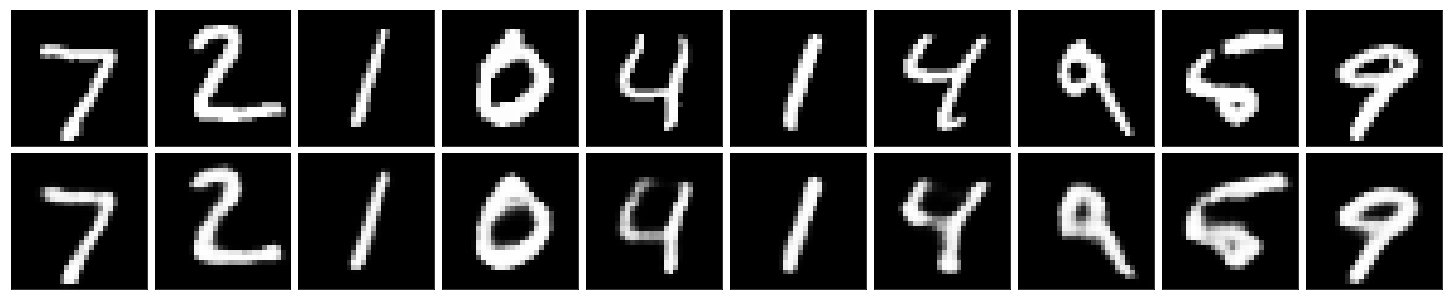

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))#绘制行为2列为10的子图 图片大小为20x4
input_images = mnist_dataset.test.images[:10] #先取出mnist训练图像的前十个值  
reconstructed_images = sess.run(decoded_layer, 
                                feed_dict={inputs_values:input_images.reshape((10,28,28,1))})
 
for imgs, row in zip([input_images, reconstructed_images], axes): #用img遍历输入的图像和重构的图像
    for img, ax in zip(imgs, row):#然后用img遍历imgs
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)#True代表显示坐标轴，False代表隐藏坐标轴
        ax.get_yaxis().set_visible(False)
fig.tight_layout(pad=0.1)#调整多个图之间的间隔来减少堆叠，pad值越大，间隔越大


# 去噪自动编码器
我们可以通过强迫autoencoder体系结构学习更重要的内容来进一步了解它关于输入数据的特性。通过在输入图像中加入噪声并以原始图像为目标，模型将尝试去除噪声并学习重要特征从而在输出中产生有意义的重构图像。这种CAE结构可用于去除输入图像的噪声。这个特定的自动编码器的变化称为去噪自动编码器:

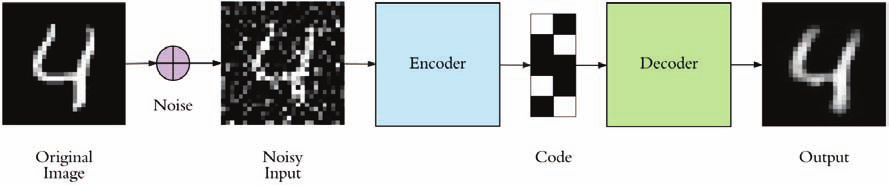

让我们从实现下图中的体系结构开始。我们在这个去噪的自动编码器架构中添加的唯一额外的东西，给原始输入图像添加一些噪声:
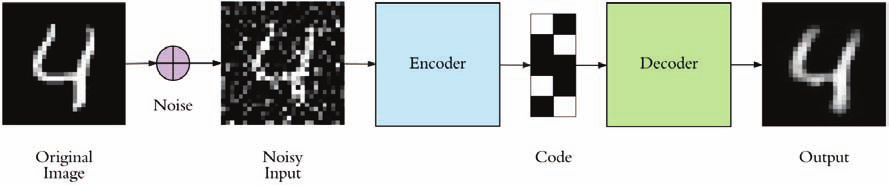

## 建立模型
在这个实现中，我们将在编码器和解码器部分使用更多的层，这是因为我们在输入中添加了新的复杂性，下一个模型虽然与前一个CAE完全相同，但是增加了额外的图层，这将帮助我们从一个有噪声的图像中重建一个无噪声的图像。

让我们继续构建这个架构吧:


In [40]:
learning_rate = 0.001
#定义输入和目标值的占位符变量sfof
inputs_values = tf.placeholder(tf.float32, (None,28,28,1),name='inputs_values')
targets_values = tf.placeholder(tf.float32, (None,28,28,1),name='targets_values')

In [41]:
#定义网络的编码器部分
#在编码器parrt中定义第一个卷积层 conv2d，就是二维卷积层，即对图像的空域卷积。该层对二维输入进行滑动窗卷积，滤镜32个，每一个滤镜3x3大小，
#张量将呈28x28x32的形状 这里滤镜大小为32， 
conv_layer_1 = tf.layers.conv2d(inputs=inputs_values, filters=32, kernel_size=(3,3), 
                                padding='same',activation=tf.nn.relu)

In [42]:
#输出张量的形状是14x14x32  建立第一个池化层
maxpool_layer_1 = tf.layers.max_pooling2d(conv_layer_1, pool_size=(2,2),
                    strides=(2,2), padding='same')

In [43]:
#输出张量的形状是14x14x32  定义第二个卷积层
conv_layer_2 = tf.layers.conv2d(inputs = maxpool_layer_1, filters=32, kernel_size=(3,3),
                                padding='same',activation=tf.nn.relu)

In [44]:
#输出张量的形状是7x7x32 定义第二个池化层
maxpool_layer_2 = tf.layers.max_pooling2d(conv_layer_2, pool_size=(2,2),
                                         strides=(2,2), padding='same')

In [45]:
#输出张量的形状是7x7x16 定义第三个卷积层
conv_layer_3 = tf.layers.conv2d(inputs=maxpool_layer_2, filters=16,
                               kernel_size=(3,3), padding='same', activation=tf.nn.relu)

In [46]:
#输出张量的形状是4x4x16 定义编码层
encoding_layer = tf.layers.max_pooling2d(conv_layer_3, pool_size=(2,2),
                                        strides=(2,2), padding='same')

#### 定义神经网络的解码器部分

In [47]:
#输出张量将呈7x7x16的形状  把原来4x4像素转化成7x7
upsample_layer_1 = tf.image.resize_images(encoding_layer,size=(7,7),
                                         method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)#双线性插值，即进行图像缩放

In [48]:
#输出张量将呈是7x7x16的形状 在解码器部分中定义第一个卷积层
conv_layer_4 = tf.layers.conv2d(inputs=upsample_layer_1, filters=16, kernel_size=(3,3),
                              padding='same', activation=tf.nn.relu)

In [49]:
#输出张量将呈是14x14x16的形状  把原本7x7的像素还原成14x14
upsample_layer_2 = tf.image.resize_images(conv_layer_4, size=(14,14),
                                         method = tf.image.ResizeMethod.NEAREST_NEIGHBOR)#双线性插值，即进行图像缩放

In [50]:
#输出张量将呈是14x14x32的形状   在解码器部分中定义第二个卷积层
conv_layer_5 = tf.layers.conv2d(inputs=upsample_layer_2, filters=32,
                               kernel_size=(3,3), padding='same',activation=tf.nn.relu)

In [51]:
#输出张量将呈是28x28x32的形状   把原本14x14的像素还原成28x28
upsample_layer_3 = tf.image.resize_images(conv_layer_5, size=(28,28),
                                         method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)#双线性插值，即进行图像缩放

In [52]:
#输出张量将呈是28x28x32的形状   在解码器部分中定义第二个卷积层
conv_layer_6 = tf.layers.conv2d(inputs=upsample_layer_3, filters=32,kernel_size=(3,3),
                                padding='same', activation=tf.nn.relu)

In [53]:
#输出张量将呈是28x28x1的形状      图像的数量不变 没有激活函数
logits_layer = tf.layers.conv2d(inputs=conv_layer_6, filters=1, kernel_size=(3,3),
                               padding='same',activation=None)

In [54]:
#将logits值赋给sigmoid激活函数，得到重建的图像
decoding_layer = tf.nn.sigmoid(logits_layer)

In [55]:
#在计算交叉熵时，将逻辑输入到sigmoid激活函数
model_loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_values,logits=logits_layer)

In [56]:
#获取模型成本并定义优化器以使其最小化
model_cost = tf.reduce_mean(model_loss)
model_optimizer = tf.train.AdamOptimizer(learning_rate).minimize(model_cost)

## 模型训练
现在是开始训练这个更深层次的网络时候了，反过来，通过重构噪声输入的无噪声头像，需要更多的时间来收敛。
让我们创建会话变量开始：

In [57]:
sess = tf.Session()

下一步，我们将开始巡视的过程但是花费更多的周期

In [58]:
num_epochs = 100  #100个周期
train_batch_size = 200 #每一批次为200个数据

In [59]:
#定义要添加到mnist数据集的噪声系数
mnist_noise_factor = 0.5 #决定噪声的难度
sess.run(tf.global_variables_initializer()) #初始化tensorflow全局变量

In [60]:
for e in range(num_epochs):
    for ii in range(mnist_dataset.train.num_examples//train_batch_size):###使用60000项数据进行训练，分为每一批次200项数据，所以有300个批次
        input_batch = mnist_dataset.train.next_batch(train_batch_size)
        #从相应的批处理中获取和重塑图像
        batch_images = input_batch[0].reshape((-1,28,28,1)) #-1为项数不确定，1为单色
        #为输入图像添加随机噪声
        noisy_images = batch_images + mnist_noise_factor * np.random.randn(*batch_images.shape)
        #剪切所有大于0或大于1的值
        noisy_images = np.clip(noisy_images, 0., 1.)
        #设置输入图像为噪声图像，原始图像为目标图像
        input_batch_cost, _ = sess.run([model_cost, model_optimizer],
                                     feed_dict={inputs_values: noisy_images,
                                                targets_values:batch_images})      
        print("Epoch: {}/{}...".format(e+1, num_epochs),
               "Training loss: {:.3f}".format(input_batch_cost))

Epoch: 1/100... Training loss: 0.712
Epoch: 1/100... Training loss: 0.690
Epoch: 1/100... Training loss: 0.682
Epoch: 1/100... Training loss: 0.671
Epoch: 1/100... Training loss: 0.655
Epoch: 1/100... Training loss: 0.631
Epoch: 1/100... Training loss: 0.600
Epoch: 1/100... Training loss: 0.563
Epoch: 1/100... Training loss: 0.520
Epoch: 1/100... Training loss: 0.485
Epoch: 1/100... Training loss: 0.502
Epoch: 1/100... Training loss: 0.520
Epoch: 1/100... Training loss: 0.518
Epoch: 1/100... Training loss: 0.495
Epoch: 1/100... Training loss: 0.486
Epoch: 1/100... Training loss: 0.473
Epoch: 1/100... Training loss: 0.475
Epoch: 1/100... Training loss: 0.454
Epoch: 1/100... Training loss: 0.453
Epoch: 1/100... Training loss: 0.448
Epoch: 1/100... Training loss: 0.442
Epoch: 1/100... Training loss: 0.431
Epoch: 1/100... Training loss: 0.420
Epoch: 1/100... Training loss: 0.417
Epoch: 1/100... Training loss: 0.414
Epoch: 1/100... Training loss: 0.393
Epoch: 1/100... Training loss: 0.394
E

Epoch: 1/100... Training loss: 0.193
Epoch: 1/100... Training loss: 0.189
Epoch: 1/100... Training loss: 0.185
Epoch: 1/100... Training loss: 0.189
Epoch: 1/100... Training loss: 0.189
Epoch: 1/100... Training loss: 0.185
Epoch: 1/100... Training loss: 0.192
Epoch: 1/100... Training loss: 0.191
Epoch: 1/100... Training loss: 0.185
Epoch: 1/100... Training loss: 0.188
Epoch: 1/100... Training loss: 0.183
Epoch: 1/100... Training loss: 0.184
Epoch: 1/100... Training loss: 0.193
Epoch: 1/100... Training loss: 0.189
Epoch: 1/100... Training loss: 0.189
Epoch: 1/100... Training loss: 0.193
Epoch: 1/100... Training loss: 0.187
Epoch: 1/100... Training loss: 0.183
Epoch: 1/100... Training loss: 0.189
Epoch: 1/100... Training loss: 0.188
Epoch: 1/100... Training loss: 0.186
Epoch: 1/100... Training loss: 0.189
Epoch: 1/100... Training loss: 0.189
Epoch: 1/100... Training loss: 0.187
Epoch: 1/100... Training loss: 0.189
Epoch: 1/100... Training loss: 0.187
Epoch: 1/100... Training loss: 0.196
E

Epoch: 2/100... Training loss: 0.162
Epoch: 2/100... Training loss: 0.158
Epoch: 2/100... Training loss: 0.163
Epoch: 2/100... Training loss: 0.159
Epoch: 2/100... Training loss: 0.161
Epoch: 2/100... Training loss: 0.157
Epoch: 2/100... Training loss: 0.158
Epoch: 2/100... Training loss: 0.157
Epoch: 2/100... Training loss: 0.166
Epoch: 2/100... Training loss: 0.160
Epoch: 2/100... Training loss: 0.163
Epoch: 2/100... Training loss: 0.158
Epoch: 2/100... Training loss: 0.162
Epoch: 2/100... Training loss: 0.162
Epoch: 2/100... Training loss: 0.155
Epoch: 2/100... Training loss: 0.158
Epoch: 2/100... Training loss: 0.161
Epoch: 2/100... Training loss: 0.161
Epoch: 2/100... Training loss: 0.159
Epoch: 2/100... Training loss: 0.163
Epoch: 2/100... Training loss: 0.159
Epoch: 2/100... Training loss: 0.162
Epoch: 2/100... Training loss: 0.163
Epoch: 2/100... Training loss: 0.158
Epoch: 2/100... Training loss: 0.157
Epoch: 2/100... Training loss: 0.162
Epoch: 2/100... Training loss: 0.156
E

Epoch: 3/100... Training loss: 0.146
Epoch: 3/100... Training loss: 0.143
Epoch: 3/100... Training loss: 0.142
Epoch: 3/100... Training loss: 0.147
Epoch: 3/100... Training loss: 0.146
Epoch: 3/100... Training loss: 0.148
Epoch: 3/100... Training loss: 0.146
Epoch: 3/100... Training loss: 0.140
Epoch: 3/100... Training loss: 0.140
Epoch: 3/100... Training loss: 0.144
Epoch: 3/100... Training loss: 0.148
Epoch: 3/100... Training loss: 0.141
Epoch: 3/100... Training loss: 0.143
Epoch: 3/100... Training loss: 0.147
Epoch: 3/100... Training loss: 0.150
Epoch: 3/100... Training loss: 0.147
Epoch: 3/100... Training loss: 0.143
Epoch: 3/100... Training loss: 0.144
Epoch: 3/100... Training loss: 0.144
Epoch: 3/100... Training loss: 0.145
Epoch: 3/100... Training loss: 0.141
Epoch: 3/100... Training loss: 0.145
Epoch: 3/100... Training loss: 0.148
Epoch: 3/100... Training loss: 0.141
Epoch: 3/100... Training loss: 0.141
Epoch: 3/100... Training loss: 0.141
Epoch: 3/100... Training loss: 0.145
E

Epoch: 3/100... Training loss: 0.136
Epoch: 3/100... Training loss: 0.135
Epoch: 3/100... Training loss: 0.137
Epoch: 3/100... Training loss: 0.140
Epoch: 3/100... Training loss: 0.134
Epoch: 3/100... Training loss: 0.137
Epoch: 3/100... Training loss: 0.138
Epoch: 3/100... Training loss: 0.133
Epoch: 3/100... Training loss: 0.133
Epoch: 3/100... Training loss: 0.138
Epoch: 3/100... Training loss: 0.136
Epoch: 3/100... Training loss: 0.134
Epoch: 4/100... Training loss: 0.141
Epoch: 4/100... Training loss: 0.135
Epoch: 4/100... Training loss: 0.136
Epoch: 4/100... Training loss: 0.139
Epoch: 4/100... Training loss: 0.132
Epoch: 4/100... Training loss: 0.137
Epoch: 4/100... Training loss: 0.139
Epoch: 4/100... Training loss: 0.133
Epoch: 4/100... Training loss: 0.138
Epoch: 4/100... Training loss: 0.134
Epoch: 4/100... Training loss: 0.137
Epoch: 4/100... Training loss: 0.129
Epoch: 4/100... Training loss: 0.132
Epoch: 4/100... Training loss: 0.134
Epoch: 4/100... Training loss: 0.136
E

Epoch: 4/100... Training loss: 0.134
Epoch: 4/100... Training loss: 0.131
Epoch: 4/100... Training loss: 0.132
Epoch: 4/100... Training loss: 0.128
Epoch: 4/100... Training loss: 0.133
Epoch: 4/100... Training loss: 0.132
Epoch: 4/100... Training loss: 0.133
Epoch: 4/100... Training loss: 0.123
Epoch: 4/100... Training loss: 0.129
Epoch: 4/100... Training loss: 0.128
Epoch: 4/100... Training loss: 0.136
Epoch: 4/100... Training loss: 0.133
Epoch: 4/100... Training loss: 0.126
Epoch: 4/100... Training loss: 0.129
Epoch: 4/100... Training loss: 0.133
Epoch: 4/100... Training loss: 0.130
Epoch: 4/100... Training loss: 0.127
Epoch: 4/100... Training loss: 0.132
Epoch: 4/100... Training loss: 0.130
Epoch: 4/100... Training loss: 0.134
Epoch: 4/100... Training loss: 0.127
Epoch: 4/100... Training loss: 0.129
Epoch: 4/100... Training loss: 0.132
Epoch: 4/100... Training loss: 0.133
Epoch: 4/100... Training loss: 0.128
Epoch: 4/100... Training loss: 0.130
Epoch: 4/100... Training loss: 0.130
E

Epoch: 5/100... Training loss: 0.129
Epoch: 5/100... Training loss: 0.128
Epoch: 5/100... Training loss: 0.128
Epoch: 5/100... Training loss: 0.132
Epoch: 5/100... Training loss: 0.126
Epoch: 5/100... Training loss: 0.131
Epoch: 5/100... Training loss: 0.126
Epoch: 5/100... Training loss: 0.127
Epoch: 5/100... Training loss: 0.131
Epoch: 5/100... Training loss: 0.125
Epoch: 5/100... Training loss: 0.127
Epoch: 5/100... Training loss: 0.126
Epoch: 5/100... Training loss: 0.127
Epoch: 5/100... Training loss: 0.132
Epoch: 5/100... Training loss: 0.131
Epoch: 5/100... Training loss: 0.125
Epoch: 5/100... Training loss: 0.130
Epoch: 5/100... Training loss: 0.129
Epoch: 5/100... Training loss: 0.128
Epoch: 5/100... Training loss: 0.129
Epoch: 5/100... Training loss: 0.132
Epoch: 5/100... Training loss: 0.127
Epoch: 5/100... Training loss: 0.126
Epoch: 5/100... Training loss: 0.128
Epoch: 5/100... Training loss: 0.130
Epoch: 5/100... Training loss: 0.128
Epoch: 5/100... Training loss: 0.122
E

Epoch: 6/100... Training loss: 0.125
Epoch: 6/100... Training loss: 0.126
Epoch: 6/100... Training loss: 0.125
Epoch: 6/100... Training loss: 0.125
Epoch: 6/100... Training loss: 0.126
Epoch: 6/100... Training loss: 0.123
Epoch: 6/100... Training loss: 0.126
Epoch: 6/100... Training loss: 0.126
Epoch: 6/100... Training loss: 0.128
Epoch: 6/100... Training loss: 0.127
Epoch: 6/100... Training loss: 0.126
Epoch: 6/100... Training loss: 0.124
Epoch: 6/100... Training loss: 0.123
Epoch: 6/100... Training loss: 0.126
Epoch: 6/100... Training loss: 0.127
Epoch: 6/100... Training loss: 0.124
Epoch: 6/100... Training loss: 0.122
Epoch: 6/100... Training loss: 0.123
Epoch: 6/100... Training loss: 0.127
Epoch: 6/100... Training loss: 0.123
Epoch: 6/100... Training loss: 0.125
Epoch: 6/100... Training loss: 0.128
Epoch: 6/100... Training loss: 0.125
Epoch: 6/100... Training loss: 0.121
Epoch: 6/100... Training loss: 0.123
Epoch: 6/100... Training loss: 0.123
Epoch: 6/100... Training loss: 0.132
E

Epoch: 6/100... Training loss: 0.117
Epoch: 6/100... Training loss: 0.124
Epoch: 6/100... Training loss: 0.122
Epoch: 6/100... Training loss: 0.126
Epoch: 6/100... Training loss: 0.122
Epoch: 6/100... Training loss: 0.120
Epoch: 6/100... Training loss: 0.118
Epoch: 6/100... Training loss: 0.122
Epoch: 6/100... Training loss: 0.122
Epoch: 6/100... Training loss: 0.123
Epoch: 6/100... Training loss: 0.122
Epoch: 6/100... Training loss: 0.123
Epoch: 6/100... Training loss: 0.123
Epoch: 6/100... Training loss: 0.123
Epoch: 6/100... Training loss: 0.122
Epoch: 6/100... Training loss: 0.122
Epoch: 6/100... Training loss: 0.124
Epoch: 6/100... Training loss: 0.121
Epoch: 6/100... Training loss: 0.127
Epoch: 6/100... Training loss: 0.123
Epoch: 6/100... Training loss: 0.123
Epoch: 6/100... Training loss: 0.122
Epoch: 6/100... Training loss: 0.123
Epoch: 6/100... Training loss: 0.119
Epoch: 7/100... Training loss: 0.119
Epoch: 7/100... Training loss: 0.121
Epoch: 7/100... Training loss: 0.121
E

Epoch: 7/100... Training loss: 0.122
Epoch: 7/100... Training loss: 0.121
Epoch: 7/100... Training loss: 0.122
Epoch: 7/100... Training loss: 0.124
Epoch: 7/100... Training loss: 0.125
Epoch: 7/100... Training loss: 0.118
Epoch: 7/100... Training loss: 0.119
Epoch: 7/100... Training loss: 0.121
Epoch: 7/100... Training loss: 0.123
Epoch: 7/100... Training loss: 0.116
Epoch: 7/100... Training loss: 0.121
Epoch: 7/100... Training loss: 0.120
Epoch: 7/100... Training loss: 0.121
Epoch: 7/100... Training loss: 0.118
Epoch: 7/100... Training loss: 0.122
Epoch: 7/100... Training loss: 0.118
Epoch: 7/100... Training loss: 0.120
Epoch: 7/100... Training loss: 0.119
Epoch: 7/100... Training loss: 0.121
Epoch: 7/100... Training loss: 0.125
Epoch: 7/100... Training loss: 0.122
Epoch: 7/100... Training loss: 0.122
Epoch: 7/100... Training loss: 0.122
Epoch: 7/100... Training loss: 0.123
Epoch: 7/100... Training loss: 0.124
Epoch: 7/100... Training loss: 0.122
Epoch: 7/100... Training loss: 0.117
E

Epoch: 8/100... Training loss: 0.115
Epoch: 8/100... Training loss: 0.119
Epoch: 8/100... Training loss: 0.121
Epoch: 8/100... Training loss: 0.121
Epoch: 8/100... Training loss: 0.118
Epoch: 8/100... Training loss: 0.119
Epoch: 8/100... Training loss: 0.121
Epoch: 8/100... Training loss: 0.118
Epoch: 8/100... Training loss: 0.117
Epoch: 8/100... Training loss: 0.120
Epoch: 8/100... Training loss: 0.119
Epoch: 8/100... Training loss: 0.114
Epoch: 8/100... Training loss: 0.119
Epoch: 8/100... Training loss: 0.117
Epoch: 8/100... Training loss: 0.123
Epoch: 8/100... Training loss: 0.122
Epoch: 8/100... Training loss: 0.124
Epoch: 8/100... Training loss: 0.119
Epoch: 8/100... Training loss: 0.119
Epoch: 8/100... Training loss: 0.119
Epoch: 8/100... Training loss: 0.114
Epoch: 8/100... Training loss: 0.119
Epoch: 8/100... Training loss: 0.115
Epoch: 8/100... Training loss: 0.116
Epoch: 8/100... Training loss: 0.119
Epoch: 8/100... Training loss: 0.120
Epoch: 8/100... Training loss: 0.120
E

Epoch: 9/100... Training loss: 0.118
Epoch: 9/100... Training loss: 0.116
Epoch: 9/100... Training loss: 0.117
Epoch: 9/100... Training loss: 0.120
Epoch: 9/100... Training loss: 0.120
Epoch: 9/100... Training loss: 0.120
Epoch: 9/100... Training loss: 0.118
Epoch: 9/100... Training loss: 0.117
Epoch: 9/100... Training loss: 0.117
Epoch: 9/100... Training loss: 0.118
Epoch: 9/100... Training loss: 0.118
Epoch: 9/100... Training loss: 0.116
Epoch: 9/100... Training loss: 0.113
Epoch: 9/100... Training loss: 0.120
Epoch: 9/100... Training loss: 0.116
Epoch: 9/100... Training loss: 0.120
Epoch: 9/100... Training loss: 0.117
Epoch: 9/100... Training loss: 0.114
Epoch: 9/100... Training loss: 0.120
Epoch: 9/100... Training loss: 0.121
Epoch: 9/100... Training loss: 0.115
Epoch: 9/100... Training loss: 0.123
Epoch: 9/100... Training loss: 0.115
Epoch: 9/100... Training loss: 0.117
Epoch: 9/100... Training loss: 0.122
Epoch: 9/100... Training loss: 0.117
Epoch: 9/100... Training loss: 0.117
E

Epoch: 9/100... Training loss: 0.117
Epoch: 9/100... Training loss: 0.115
Epoch: 9/100... Training loss: 0.113
Epoch: 9/100... Training loss: 0.117
Epoch: 9/100... Training loss: 0.118
Epoch: 9/100... Training loss: 0.124
Epoch: 9/100... Training loss: 0.113
Epoch: 9/100... Training loss: 0.114
Epoch: 9/100... Training loss: 0.124
Epoch: 9/100... Training loss: 0.114
Epoch: 9/100... Training loss: 0.120
Epoch: 9/100... Training loss: 0.118
Epoch: 9/100... Training loss: 0.111
Epoch: 9/100... Training loss: 0.117
Epoch: 9/100... Training loss: 0.119
Epoch: 9/100... Training loss: 0.116
Epoch: 9/100... Training loss: 0.113
Epoch: 9/100... Training loss: 0.121
Epoch: 9/100... Training loss: 0.118
Epoch: 9/100... Training loss: 0.121
Epoch: 9/100... Training loss: 0.119
Epoch: 9/100... Training loss: 0.116
Epoch: 9/100... Training loss: 0.116
Epoch: 9/100... Training loss: 0.121
Epoch: 9/100... Training loss: 0.119
Epoch: 9/100... Training loss: 0.122
Epoch: 9/100... Training loss: 0.115
E

Epoch: 10/100... Training loss: 0.113
Epoch: 10/100... Training loss: 0.117
Epoch: 10/100... Training loss: 0.115
Epoch: 10/100... Training loss: 0.117
Epoch: 10/100... Training loss: 0.111
Epoch: 10/100... Training loss: 0.114
Epoch: 10/100... Training loss: 0.117
Epoch: 10/100... Training loss: 0.115
Epoch: 10/100... Training loss: 0.116
Epoch: 10/100... Training loss: 0.113
Epoch: 10/100... Training loss: 0.113
Epoch: 10/100... Training loss: 0.113
Epoch: 10/100... Training loss: 0.116
Epoch: 10/100... Training loss: 0.118
Epoch: 10/100... Training loss: 0.115
Epoch: 10/100... Training loss: 0.118
Epoch: 10/100... Training loss: 0.111
Epoch: 10/100... Training loss: 0.114
Epoch: 10/100... Training loss: 0.119
Epoch: 10/100... Training loss: 0.120
Epoch: 10/100... Training loss: 0.114
Epoch: 10/100... Training loss: 0.115
Epoch: 10/100... Training loss: 0.114
Epoch: 10/100... Training loss: 0.117
Epoch: 10/100... Training loss: 0.117
Epoch: 10/100... Training loss: 0.117
Epoch: 10/10

Epoch: 11/100... Training loss: 0.115
Epoch: 11/100... Training loss: 0.114
Epoch: 11/100... Training loss: 0.114
Epoch: 11/100... Training loss: 0.116
Epoch: 11/100... Training loss: 0.116
Epoch: 11/100... Training loss: 0.113
Epoch: 11/100... Training loss: 0.114
Epoch: 11/100... Training loss: 0.116
Epoch: 11/100... Training loss: 0.115
Epoch: 11/100... Training loss: 0.116
Epoch: 11/100... Training loss: 0.117
Epoch: 11/100... Training loss: 0.118
Epoch: 11/100... Training loss: 0.114
Epoch: 11/100... Training loss: 0.115
Epoch: 11/100... Training loss: 0.116
Epoch: 11/100... Training loss: 0.115
Epoch: 11/100... Training loss: 0.116
Epoch: 11/100... Training loss: 0.117
Epoch: 11/100... Training loss: 0.117
Epoch: 11/100... Training loss: 0.117
Epoch: 11/100... Training loss: 0.117
Epoch: 11/100... Training loss: 0.112
Epoch: 11/100... Training loss: 0.115
Epoch: 11/100... Training loss: 0.115
Epoch: 11/100... Training loss: 0.116
Epoch: 11/100... Training loss: 0.114
Epoch: 11/10

Epoch: 12/100... Training loss: 0.112
Epoch: 12/100... Training loss: 0.110
Epoch: 12/100... Training loss: 0.114
Epoch: 12/100... Training loss: 0.116
Epoch: 12/100... Training loss: 0.111
Epoch: 12/100... Training loss: 0.116
Epoch: 12/100... Training loss: 0.112
Epoch: 12/100... Training loss: 0.113
Epoch: 12/100... Training loss: 0.114
Epoch: 12/100... Training loss: 0.111
Epoch: 12/100... Training loss: 0.115
Epoch: 12/100... Training loss: 0.115
Epoch: 12/100... Training loss: 0.115
Epoch: 12/100... Training loss: 0.113
Epoch: 12/100... Training loss: 0.115
Epoch: 12/100... Training loss: 0.114
Epoch: 12/100... Training loss: 0.115
Epoch: 12/100... Training loss: 0.115
Epoch: 12/100... Training loss: 0.114
Epoch: 12/100... Training loss: 0.113
Epoch: 12/100... Training loss: 0.115
Epoch: 12/100... Training loss: 0.114
Epoch: 12/100... Training loss: 0.113
Epoch: 12/100... Training loss: 0.111
Epoch: 12/100... Training loss: 0.111
Epoch: 12/100... Training loss: 0.115
Epoch: 12/10

Epoch: 12/100... Training loss: 0.113
Epoch: 12/100... Training loss: 0.111
Epoch: 12/100... Training loss: 0.112
Epoch: 12/100... Training loss: 0.111
Epoch: 12/100... Training loss: 0.111
Epoch: 12/100... Training loss: 0.113
Epoch: 12/100... Training loss: 0.114
Epoch: 12/100... Training loss: 0.111
Epoch: 12/100... Training loss: 0.116
Epoch: 12/100... Training loss: 0.112
Epoch: 12/100... Training loss: 0.112
Epoch: 12/100... Training loss: 0.114
Epoch: 12/100... Training loss: 0.113
Epoch: 12/100... Training loss: 0.109
Epoch: 12/100... Training loss: 0.112
Epoch: 12/100... Training loss: 0.112
Epoch: 12/100... Training loss: 0.114
Epoch: 12/100... Training loss: 0.114
Epoch: 12/100... Training loss: 0.114
Epoch: 12/100... Training loss: 0.113
Epoch: 12/100... Training loss: 0.113
Epoch: 12/100... Training loss: 0.111
Epoch: 12/100... Training loss: 0.114
Epoch: 12/100... Training loss: 0.115
Epoch: 12/100... Training loss: 0.114
Epoch: 12/100... Training loss: 0.115
Epoch: 12/10

Epoch: 13/100... Training loss: 0.109
Epoch: 13/100... Training loss: 0.113
Epoch: 13/100... Training loss: 0.114
Epoch: 13/100... Training loss: 0.107
Epoch: 13/100... Training loss: 0.112
Epoch: 13/100... Training loss: 0.116
Epoch: 13/100... Training loss: 0.109
Epoch: 13/100... Training loss: 0.110
Epoch: 13/100... Training loss: 0.110
Epoch: 13/100... Training loss: 0.112
Epoch: 13/100... Training loss: 0.109
Epoch: 13/100... Training loss: 0.113
Epoch: 13/100... Training loss: 0.112
Epoch: 13/100... Training loss: 0.110
Epoch: 13/100... Training loss: 0.116
Epoch: 13/100... Training loss: 0.111
Epoch: 13/100... Training loss: 0.114
Epoch: 13/100... Training loss: 0.113
Epoch: 13/100... Training loss: 0.116
Epoch: 13/100... Training loss: 0.110
Epoch: 13/100... Training loss: 0.109
Epoch: 13/100... Training loss: 0.112
Epoch: 13/100... Training loss: 0.113
Epoch: 13/100... Training loss: 0.114
Epoch: 13/100... Training loss: 0.116
Epoch: 13/100... Training loss: 0.113
Epoch: 13/10

Epoch: 14/100... Training loss: 0.113
Epoch: 14/100... Training loss: 0.112
Epoch: 14/100... Training loss: 0.113
Epoch: 14/100... Training loss: 0.114
Epoch: 14/100... Training loss: 0.113
Epoch: 14/100... Training loss: 0.110
Epoch: 14/100... Training loss: 0.111
Epoch: 14/100... Training loss: 0.111
Epoch: 14/100... Training loss: 0.114
Epoch: 14/100... Training loss: 0.111
Epoch: 14/100... Training loss: 0.112
Epoch: 14/100... Training loss: 0.110
Epoch: 14/100... Training loss: 0.109
Epoch: 14/100... Training loss: 0.112
Epoch: 14/100... Training loss: 0.111
Epoch: 14/100... Training loss: 0.112
Epoch: 14/100... Training loss: 0.115
Epoch: 14/100... Training loss: 0.111
Epoch: 14/100... Training loss: 0.111
Epoch: 14/100... Training loss: 0.114
Epoch: 14/100... Training loss: 0.112
Epoch: 14/100... Training loss: 0.111
Epoch: 14/100... Training loss: 0.115
Epoch: 14/100... Training loss: 0.109
Epoch: 14/100... Training loss: 0.110
Epoch: 14/100... Training loss: 0.115
Epoch: 14/10

Epoch: 14/100... Training loss: 0.110
Epoch: 14/100... Training loss: 0.109
Epoch: 14/100... Training loss: 0.109
Epoch: 14/100... Training loss: 0.113
Epoch: 14/100... Training loss: 0.106
Epoch: 14/100... Training loss: 0.112
Epoch: 14/100... Training loss: 0.110
Epoch: 14/100... Training loss: 0.109
Epoch: 14/100... Training loss: 0.110
Epoch: 14/100... Training loss: 0.110
Epoch: 14/100... Training loss: 0.110
Epoch: 14/100... Training loss: 0.115
Epoch: 14/100... Training loss: 0.108
Epoch: 14/100... Training loss: 0.109
Epoch: 14/100... Training loss: 0.110
Epoch: 14/100... Training loss: 0.109
Epoch: 14/100... Training loss: 0.114
Epoch: 14/100... Training loss: 0.106
Epoch: 14/100... Training loss: 0.108
Epoch: 14/100... Training loss: 0.110
Epoch: 14/100... Training loss: 0.113
Epoch: 14/100... Training loss: 0.113
Epoch: 14/100... Training loss: 0.113
Epoch: 15/100... Training loss: 0.111
Epoch: 15/100... Training loss: 0.108
Epoch: 15/100... Training loss: 0.114
Epoch: 15/10

Epoch: 15/100... Training loss: 0.112
Epoch: 15/100... Training loss: 0.111
Epoch: 15/100... Training loss: 0.111
Epoch: 15/100... Training loss: 0.111
Epoch: 15/100... Training loss: 0.112
Epoch: 15/100... Training loss: 0.112
Epoch: 15/100... Training loss: 0.107
Epoch: 15/100... Training loss: 0.113
Epoch: 15/100... Training loss: 0.112
Epoch: 15/100... Training loss: 0.112
Epoch: 15/100... Training loss: 0.110
Epoch: 15/100... Training loss: 0.110
Epoch: 15/100... Training loss: 0.111
Epoch: 15/100... Training loss: 0.115
Epoch: 15/100... Training loss: 0.109
Epoch: 15/100... Training loss: 0.112
Epoch: 15/100... Training loss: 0.109
Epoch: 15/100... Training loss: 0.111
Epoch: 15/100... Training loss: 0.109
Epoch: 15/100... Training loss: 0.112
Epoch: 15/100... Training loss: 0.115
Epoch: 15/100... Training loss: 0.110
Epoch: 15/100... Training loss: 0.110
Epoch: 15/100... Training loss: 0.107
Epoch: 15/100... Training loss: 0.109
Epoch: 15/100... Training loss: 0.107
Epoch: 15/10

Epoch: 16/100... Training loss: 0.110
Epoch: 16/100... Training loss: 0.113
Epoch: 16/100... Training loss: 0.108
Epoch: 16/100... Training loss: 0.112
Epoch: 16/100... Training loss: 0.108
Epoch: 16/100... Training loss: 0.110
Epoch: 16/100... Training loss: 0.112
Epoch: 16/100... Training loss: 0.110
Epoch: 16/100... Training loss: 0.111
Epoch: 16/100... Training loss: 0.112
Epoch: 16/100... Training loss: 0.111
Epoch: 16/100... Training loss: 0.112
Epoch: 16/100... Training loss: 0.112
Epoch: 16/100... Training loss: 0.110
Epoch: 16/100... Training loss: 0.109
Epoch: 16/100... Training loss: 0.109
Epoch: 16/100... Training loss: 0.110
Epoch: 16/100... Training loss: 0.109
Epoch: 16/100... Training loss: 0.111
Epoch: 16/100... Training loss: 0.114
Epoch: 16/100... Training loss: 0.112
Epoch: 16/100... Training loss: 0.109
Epoch: 16/100... Training loss: 0.113
Epoch: 16/100... Training loss: 0.109
Epoch: 16/100... Training loss: 0.111
Epoch: 16/100... Training loss: 0.110
Epoch: 16/10

Epoch: 17/100... Training loss: 0.110
Epoch: 17/100... Training loss: 0.112
Epoch: 17/100... Training loss: 0.108
Epoch: 17/100... Training loss: 0.107
Epoch: 17/100... Training loss: 0.106
Epoch: 17/100... Training loss: 0.107
Epoch: 17/100... Training loss: 0.110
Epoch: 17/100... Training loss: 0.108
Epoch: 17/100... Training loss: 0.110
Epoch: 17/100... Training loss: 0.111
Epoch: 17/100... Training loss: 0.110
Epoch: 17/100... Training loss: 0.111
Epoch: 17/100... Training loss: 0.107
Epoch: 17/100... Training loss: 0.108
Epoch: 17/100... Training loss: 0.110
Epoch: 17/100... Training loss: 0.109
Epoch: 17/100... Training loss: 0.113
Epoch: 17/100... Training loss: 0.110
Epoch: 17/100... Training loss: 0.109
Epoch: 17/100... Training loss: 0.113
Epoch: 17/100... Training loss: 0.109
Epoch: 17/100... Training loss: 0.108
Epoch: 17/100... Training loss: 0.110
Epoch: 17/100... Training loss: 0.112
Epoch: 17/100... Training loss: 0.108
Epoch: 17/100... Training loss: 0.110
Epoch: 17/10

Epoch: 17/100... Training loss: 0.108
Epoch: 17/100... Training loss: 0.109
Epoch: 17/100... Training loss: 0.103
Epoch: 17/100... Training loss: 0.108
Epoch: 17/100... Training loss: 0.112
Epoch: 17/100... Training loss: 0.110
Epoch: 17/100... Training loss: 0.111
Epoch: 17/100... Training loss: 0.110
Epoch: 17/100... Training loss: 0.109
Epoch: 17/100... Training loss: 0.106
Epoch: 17/100... Training loss: 0.111
Epoch: 17/100... Training loss: 0.108
Epoch: 17/100... Training loss: 0.109
Epoch: 17/100... Training loss: 0.107
Epoch: 17/100... Training loss: 0.107
Epoch: 17/100... Training loss: 0.112
Epoch: 17/100... Training loss: 0.110
Epoch: 17/100... Training loss: 0.108
Epoch: 17/100... Training loss: 0.107
Epoch: 17/100... Training loss: 0.109
Epoch: 17/100... Training loss: 0.112
Epoch: 17/100... Training loss: 0.109
Epoch: 17/100... Training loss: 0.110
Epoch: 17/100... Training loss: 0.109
Epoch: 17/100... Training loss: 0.109
Epoch: 17/100... Training loss: 0.107
Epoch: 17/10

Epoch: 18/100... Training loss: 0.105
Epoch: 18/100... Training loss: 0.111
Epoch: 18/100... Training loss: 0.107
Epoch: 18/100... Training loss: 0.109
Epoch: 18/100... Training loss: 0.108
Epoch: 18/100... Training loss: 0.109
Epoch: 18/100... Training loss: 0.108
Epoch: 18/100... Training loss: 0.110
Epoch: 18/100... Training loss: 0.111
Epoch: 18/100... Training loss: 0.107
Epoch: 18/100... Training loss: 0.108
Epoch: 18/100... Training loss: 0.107
Epoch: 18/100... Training loss: 0.106
Epoch: 18/100... Training loss: 0.109
Epoch: 18/100... Training loss: 0.114
Epoch: 18/100... Training loss: 0.110
Epoch: 18/100... Training loss: 0.109
Epoch: 18/100... Training loss: 0.107
Epoch: 18/100... Training loss: 0.107
Epoch: 18/100... Training loss: 0.105
Epoch: 18/100... Training loss: 0.106
Epoch: 18/100... Training loss: 0.110
Epoch: 18/100... Training loss: 0.109
Epoch: 18/100... Training loss: 0.104
Epoch: 18/100... Training loss: 0.108
Epoch: 18/100... Training loss: 0.105
Epoch: 18/10

Epoch: 19/100... Training loss: 0.107
Epoch: 19/100... Training loss: 0.110
Epoch: 19/100... Training loss: 0.109
Epoch: 19/100... Training loss: 0.105
Epoch: 19/100... Training loss: 0.109
Epoch: 19/100... Training loss: 0.107
Epoch: 19/100... Training loss: 0.110
Epoch: 19/100... Training loss: 0.111
Epoch: 19/100... Training loss: 0.107
Epoch: 19/100... Training loss: 0.106
Epoch: 19/100... Training loss: 0.105
Epoch: 19/100... Training loss: 0.109
Epoch: 19/100... Training loss: 0.110
Epoch: 19/100... Training loss: 0.110
Epoch: 19/100... Training loss: 0.108
Epoch: 19/100... Training loss: 0.108
Epoch: 19/100... Training loss: 0.106
Epoch: 19/100... Training loss: 0.107
Epoch: 19/100... Training loss: 0.112
Epoch: 19/100... Training loss: 0.112
Epoch: 19/100... Training loss: 0.110
Epoch: 19/100... Training loss: 0.109
Epoch: 19/100... Training loss: 0.108
Epoch: 19/100... Training loss: 0.107
Epoch: 19/100... Training loss: 0.106
Epoch: 19/100... Training loss: 0.108
Epoch: 19/10

Epoch: 19/100... Training loss: 0.107
Epoch: 19/100... Training loss: 0.106
Epoch: 19/100... Training loss: 0.108
Epoch: 19/100... Training loss: 0.107
Epoch: 19/100... Training loss: 0.108
Epoch: 19/100... Training loss: 0.109
Epoch: 19/100... Training loss: 0.106
Epoch: 19/100... Training loss: 0.109
Epoch: 19/100... Training loss: 0.104
Epoch: 19/100... Training loss: 0.107
Epoch: 19/100... Training loss: 0.111
Epoch: 20/100... Training loss: 0.107
Epoch: 20/100... Training loss: 0.109
Epoch: 20/100... Training loss: 0.108
Epoch: 20/100... Training loss: 0.105
Epoch: 20/100... Training loss: 0.107
Epoch: 20/100... Training loss: 0.112
Epoch: 20/100... Training loss: 0.106
Epoch: 20/100... Training loss: 0.104
Epoch: 20/100... Training loss: 0.108
Epoch: 20/100... Training loss: 0.108
Epoch: 20/100... Training loss: 0.108
Epoch: 20/100... Training loss: 0.107
Epoch: 20/100... Training loss: 0.110
Epoch: 20/100... Training loss: 0.105
Epoch: 20/100... Training loss: 0.105
Epoch: 20/10

Epoch: 20/100... Training loss: 0.107
Epoch: 20/100... Training loss: 0.112
Epoch: 20/100... Training loss: 0.110
Epoch: 20/100... Training loss: 0.107
Epoch: 20/100... Training loss: 0.110
Epoch: 20/100... Training loss: 0.111
Epoch: 20/100... Training loss: 0.106
Epoch: 20/100... Training loss: 0.109
Epoch: 20/100... Training loss: 0.104
Epoch: 20/100... Training loss: 0.109
Epoch: 20/100... Training loss: 0.105
Epoch: 20/100... Training loss: 0.104
Epoch: 20/100... Training loss: 0.112
Epoch: 20/100... Training loss: 0.110
Epoch: 20/100... Training loss: 0.107
Epoch: 20/100... Training loss: 0.104
Epoch: 20/100... Training loss: 0.103
Epoch: 20/100... Training loss: 0.106
Epoch: 20/100... Training loss: 0.108
Epoch: 20/100... Training loss: 0.105
Epoch: 20/100... Training loss: 0.105
Epoch: 20/100... Training loss: 0.107
Epoch: 20/100... Training loss: 0.108
Epoch: 20/100... Training loss: 0.102
Epoch: 20/100... Training loss: 0.107
Epoch: 20/100... Training loss: 0.111
Epoch: 20/10

Epoch: 21/100... Training loss: 0.106
Epoch: 21/100... Training loss: 0.106
Epoch: 21/100... Training loss: 0.106
Epoch: 21/100... Training loss: 0.109
Epoch: 21/100... Training loss: 0.105
Epoch: 21/100... Training loss: 0.111
Epoch: 21/100... Training loss: 0.109
Epoch: 21/100... Training loss: 0.110
Epoch: 21/100... Training loss: 0.109
Epoch: 21/100... Training loss: 0.103
Epoch: 21/100... Training loss: 0.105
Epoch: 21/100... Training loss: 0.109
Epoch: 21/100... Training loss: 0.104
Epoch: 21/100... Training loss: 0.104
Epoch: 21/100... Training loss: 0.108
Epoch: 21/100... Training loss: 0.111
Epoch: 21/100... Training loss: 0.108
Epoch: 21/100... Training loss: 0.108
Epoch: 21/100... Training loss: 0.107
Epoch: 21/100... Training loss: 0.107
Epoch: 21/100... Training loss: 0.107
Epoch: 21/100... Training loss: 0.102
Epoch: 21/100... Training loss: 0.108
Epoch: 21/100... Training loss: 0.105
Epoch: 21/100... Training loss: 0.106
Epoch: 21/100... Training loss: 0.111
Epoch: 21/10

Epoch: 22/100... Training loss: 0.105
Epoch: 22/100... Training loss: 0.108
Epoch: 22/100... Training loss: 0.106
Epoch: 22/100... Training loss: 0.105
Epoch: 22/100... Training loss: 0.106
Epoch: 22/100... Training loss: 0.104
Epoch: 22/100... Training loss: 0.106
Epoch: 22/100... Training loss: 0.107
Epoch: 22/100... Training loss: 0.105
Epoch: 22/100... Training loss: 0.106
Epoch: 22/100... Training loss: 0.106
Epoch: 22/100... Training loss: 0.104
Epoch: 22/100... Training loss: 0.107
Epoch: 22/100... Training loss: 0.108
Epoch: 22/100... Training loss: 0.098
Epoch: 22/100... Training loss: 0.108
Epoch: 22/100... Training loss: 0.106
Epoch: 22/100... Training loss: 0.109
Epoch: 22/100... Training loss: 0.105
Epoch: 22/100... Training loss: 0.104
Epoch: 22/100... Training loss: 0.105
Epoch: 22/100... Training loss: 0.106
Epoch: 22/100... Training loss: 0.107
Epoch: 22/100... Training loss: 0.107
Epoch: 22/100... Training loss: 0.106
Epoch: 22/100... Training loss: 0.108
Epoch: 22/10

Epoch: 22/100... Training loss: 0.104
Epoch: 22/100... Training loss: 0.108
Epoch: 22/100... Training loss: 0.107
Epoch: 22/100... Training loss: 0.108
Epoch: 22/100... Training loss: 0.104
Epoch: 22/100... Training loss: 0.110
Epoch: 22/100... Training loss: 0.107
Epoch: 22/100... Training loss: 0.107
Epoch: 22/100... Training loss: 0.103
Epoch: 22/100... Training loss: 0.110
Epoch: 22/100... Training loss: 0.107
Epoch: 22/100... Training loss: 0.105
Epoch: 22/100... Training loss: 0.105
Epoch: 22/100... Training loss: 0.109
Epoch: 22/100... Training loss: 0.106
Epoch: 22/100... Training loss: 0.107
Epoch: 22/100... Training loss: 0.105
Epoch: 22/100... Training loss: 0.108
Epoch: 22/100... Training loss: 0.108
Epoch: 22/100... Training loss: 0.105
Epoch: 22/100... Training loss: 0.106
Epoch: 22/100... Training loss: 0.108
Epoch: 22/100... Training loss: 0.108
Epoch: 22/100... Training loss: 0.108
Epoch: 22/100... Training loss: 0.107
Epoch: 22/100... Training loss: 0.107
Epoch: 22/10

Epoch: 23/100... Training loss: 0.106
Epoch: 23/100... Training loss: 0.109
Epoch: 23/100... Training loss: 0.106
Epoch: 23/100... Training loss: 0.106
Epoch: 23/100... Training loss: 0.104
Epoch: 23/100... Training loss: 0.107
Epoch: 23/100... Training loss: 0.111
Epoch: 23/100... Training loss: 0.105
Epoch: 23/100... Training loss: 0.106
Epoch: 23/100... Training loss: 0.107
Epoch: 23/100... Training loss: 0.107
Epoch: 23/100... Training loss: 0.107
Epoch: 23/100... Training loss: 0.106
Epoch: 23/100... Training loss: 0.108
Epoch: 23/100... Training loss: 0.108
Epoch: 23/100... Training loss: 0.108
Epoch: 23/100... Training loss: 0.106
Epoch: 23/100... Training loss: 0.109
Epoch: 23/100... Training loss: 0.106
Epoch: 23/100... Training loss: 0.107
Epoch: 23/100... Training loss: 0.105
Epoch: 23/100... Training loss: 0.105
Epoch: 23/100... Training loss: 0.103
Epoch: 23/100... Training loss: 0.106
Epoch: 23/100... Training loss: 0.107
Epoch: 23/100... Training loss: 0.107
Epoch: 23/10

Epoch: 24/100... Training loss: 0.104
Epoch: 24/100... Training loss: 0.107
Epoch: 24/100... Training loss: 0.106
Epoch: 24/100... Training loss: 0.106
Epoch: 24/100... Training loss: 0.104
Epoch: 24/100... Training loss: 0.102
Epoch: 24/100... Training loss: 0.109
Epoch: 24/100... Training loss: 0.109
Epoch: 24/100... Training loss: 0.108
Epoch: 24/100... Training loss: 0.105
Epoch: 24/100... Training loss: 0.106
Epoch: 24/100... Training loss: 0.108
Epoch: 24/100... Training loss: 0.109
Epoch: 24/100... Training loss: 0.105
Epoch: 24/100... Training loss: 0.108
Epoch: 24/100... Training loss: 0.104
Epoch: 24/100... Training loss: 0.106
Epoch: 24/100... Training loss: 0.105
Epoch: 24/100... Training loss: 0.108
Epoch: 24/100... Training loss: 0.105
Epoch: 24/100... Training loss: 0.108
Epoch: 24/100... Training loss: 0.103
Epoch: 24/100... Training loss: 0.107
Epoch: 24/100... Training loss: 0.107
Epoch: 24/100... Training loss: 0.105
Epoch: 24/100... Training loss: 0.103
Epoch: 24/10

Epoch: 25/100... Training loss: 0.105
Epoch: 25/100... Training loss: 0.103
Epoch: 25/100... Training loss: 0.107
Epoch: 25/100... Training loss: 0.109
Epoch: 25/100... Training loss: 0.106
Epoch: 25/100... Training loss: 0.105
Epoch: 25/100... Training loss: 0.101
Epoch: 25/100... Training loss: 0.104
Epoch: 25/100... Training loss: 0.106
Epoch: 25/100... Training loss: 0.106
Epoch: 25/100... Training loss: 0.102
Epoch: 25/100... Training loss: 0.104
Epoch: 25/100... Training loss: 0.103
Epoch: 25/100... Training loss: 0.104
Epoch: 25/100... Training loss: 0.111
Epoch: 25/100... Training loss: 0.105
Epoch: 25/100... Training loss: 0.107
Epoch: 25/100... Training loss: 0.102
Epoch: 25/100... Training loss: 0.101
Epoch: 25/100... Training loss: 0.107
Epoch: 25/100... Training loss: 0.110
Epoch: 25/100... Training loss: 0.105
Epoch: 25/100... Training loss: 0.106
Epoch: 25/100... Training loss: 0.106
Epoch: 25/100... Training loss: 0.102
Epoch: 25/100... Training loss: 0.104
Epoch: 25/10

Epoch: 25/100... Training loss: 0.110
Epoch: 25/100... Training loss: 0.102
Epoch: 25/100... Training loss: 0.107
Epoch: 25/100... Training loss: 0.107
Epoch: 25/100... Training loss: 0.106
Epoch: 25/100... Training loss: 0.106
Epoch: 25/100... Training loss: 0.106
Epoch: 25/100... Training loss: 0.106
Epoch: 25/100... Training loss: 0.102
Epoch: 25/100... Training loss: 0.106
Epoch: 25/100... Training loss: 0.107
Epoch: 25/100... Training loss: 0.106
Epoch: 25/100... Training loss: 0.107
Epoch: 25/100... Training loss: 0.108
Epoch: 25/100... Training loss: 0.105
Epoch: 25/100... Training loss: 0.105
Epoch: 25/100... Training loss: 0.107
Epoch: 25/100... Training loss: 0.107
Epoch: 25/100... Training loss: 0.106
Epoch: 25/100... Training loss: 0.108
Epoch: 25/100... Training loss: 0.109
Epoch: 25/100... Training loss: 0.108
Epoch: 25/100... Training loss: 0.103
Epoch: 25/100... Training loss: 0.107
Epoch: 25/100... Training loss: 0.102
Epoch: 25/100... Training loss: 0.107
Epoch: 25/10

Epoch: 26/100... Training loss: 0.108
Epoch: 26/100... Training loss: 0.107
Epoch: 26/100... Training loss: 0.103
Epoch: 26/100... Training loss: 0.105
Epoch: 26/100... Training loss: 0.104
Epoch: 26/100... Training loss: 0.106
Epoch: 26/100... Training loss: 0.108
Epoch: 26/100... Training loss: 0.102
Epoch: 26/100... Training loss: 0.106
Epoch: 26/100... Training loss: 0.106
Epoch: 26/100... Training loss: 0.104
Epoch: 26/100... Training loss: 0.106
Epoch: 26/100... Training loss: 0.107
Epoch: 26/100... Training loss: 0.107
Epoch: 26/100... Training loss: 0.104
Epoch: 26/100... Training loss: 0.104
Epoch: 26/100... Training loss: 0.103
Epoch: 26/100... Training loss: 0.106
Epoch: 26/100... Training loss: 0.102
Epoch: 26/100... Training loss: 0.105
Epoch: 26/100... Training loss: 0.103
Epoch: 26/100... Training loss: 0.105
Epoch: 26/100... Training loss: 0.105
Epoch: 26/100... Training loss: 0.101
Epoch: 26/100... Training loss: 0.108
Epoch: 26/100... Training loss: 0.106
Epoch: 26/10

Epoch: 27/100... Training loss: 0.101
Epoch: 27/100... Training loss: 0.103
Epoch: 27/100... Training loss: 0.106
Epoch: 27/100... Training loss: 0.105
Epoch: 27/100... Training loss: 0.105
Epoch: 27/100... Training loss: 0.107
Epoch: 27/100... Training loss: 0.106
Epoch: 27/100... Training loss: 0.107
Epoch: 27/100... Training loss: 0.104
Epoch: 27/100... Training loss: 0.105
Epoch: 27/100... Training loss: 0.104
Epoch: 27/100... Training loss: 0.103
Epoch: 27/100... Training loss: 0.104
Epoch: 27/100... Training loss: 0.105
Epoch: 27/100... Training loss: 0.104
Epoch: 27/100... Training loss: 0.105
Epoch: 27/100... Training loss: 0.103
Epoch: 27/100... Training loss: 0.105
Epoch: 27/100... Training loss: 0.104
Epoch: 27/100... Training loss: 0.107
Epoch: 27/100... Training loss: 0.101
Epoch: 27/100... Training loss: 0.104
Epoch: 27/100... Training loss: 0.104
Epoch: 27/100... Training loss: 0.103
Epoch: 27/100... Training loss: 0.104
Epoch: 27/100... Training loss: 0.105
Epoch: 27/10

Epoch: 27/100... Training loss: 0.106
Epoch: 27/100... Training loss: 0.106
Epoch: 27/100... Training loss: 0.106
Epoch: 27/100... Training loss: 0.105
Epoch: 27/100... Training loss: 0.102
Epoch: 27/100... Training loss: 0.106
Epoch: 27/100... Training loss: 0.107
Epoch: 27/100... Training loss: 0.108
Epoch: 27/100... Training loss: 0.105
Epoch: 27/100... Training loss: 0.100
Epoch: 27/100... Training loss: 0.107
Epoch: 27/100... Training loss: 0.104
Epoch: 27/100... Training loss: 0.105
Epoch: 27/100... Training loss: 0.103
Epoch: 27/100... Training loss: 0.104
Epoch: 27/100... Training loss: 0.105
Epoch: 27/100... Training loss: 0.103
Epoch: 27/100... Training loss: 0.103
Epoch: 27/100... Training loss: 0.104
Epoch: 27/100... Training loss: 0.106
Epoch: 27/100... Training loss: 0.104
Epoch: 27/100... Training loss: 0.105
Epoch: 27/100... Training loss: 0.103
Epoch: 27/100... Training loss: 0.103
Epoch: 27/100... Training loss: 0.102
Epoch: 27/100... Training loss: 0.105
Epoch: 27/10

Epoch: 28/100... Training loss: 0.110
Epoch: 28/100... Training loss: 0.104
Epoch: 28/100... Training loss: 0.106
Epoch: 28/100... Training loss: 0.109
Epoch: 28/100... Training loss: 0.107
Epoch: 28/100... Training loss: 0.103
Epoch: 28/100... Training loss: 0.103
Epoch: 28/100... Training loss: 0.105
Epoch: 28/100... Training loss: 0.104
Epoch: 28/100... Training loss: 0.107
Epoch: 28/100... Training loss: 0.104
Epoch: 28/100... Training loss: 0.104
Epoch: 28/100... Training loss: 0.102
Epoch: 28/100... Training loss: 0.103
Epoch: 28/100... Training loss: 0.103
Epoch: 28/100... Training loss: 0.102
Epoch: 28/100... Training loss: 0.106
Epoch: 28/100... Training loss: 0.105
Epoch: 28/100... Training loss: 0.104
Epoch: 28/100... Training loss: 0.098
Epoch: 28/100... Training loss: 0.106
Epoch: 28/100... Training loss: 0.104
Epoch: 28/100... Training loss: 0.106
Epoch: 28/100... Training loss: 0.104
Epoch: 28/100... Training loss: 0.105
Epoch: 28/100... Training loss: 0.107
Epoch: 28/10

Epoch: 29/100... Training loss: 0.100
Epoch: 29/100... Training loss: 0.101
Epoch: 29/100... Training loss: 0.103
Epoch: 29/100... Training loss: 0.105
Epoch: 29/100... Training loss: 0.103
Epoch: 29/100... Training loss: 0.104
Epoch: 29/100... Training loss: 0.101
Epoch: 29/100... Training loss: 0.108
Epoch: 29/100... Training loss: 0.102
Epoch: 29/100... Training loss: 0.103
Epoch: 29/100... Training loss: 0.106
Epoch: 29/100... Training loss: 0.104
Epoch: 29/100... Training loss: 0.109
Epoch: 29/100... Training loss: 0.103
Epoch: 29/100... Training loss: 0.104
Epoch: 29/100... Training loss: 0.102
Epoch: 29/100... Training loss: 0.108
Epoch: 29/100... Training loss: 0.106
Epoch: 29/100... Training loss: 0.104
Epoch: 29/100... Training loss: 0.103
Epoch: 29/100... Training loss: 0.107
Epoch: 29/100... Training loss: 0.104
Epoch: 29/100... Training loss: 0.104
Epoch: 29/100... Training loss: 0.104
Epoch: 29/100... Training loss: 0.106
Epoch: 29/100... Training loss: 0.104
Epoch: 29/10

Epoch: 30/100... Training loss: 0.111
Epoch: 30/100... Training loss: 0.103
Epoch: 30/100... Training loss: 0.101
Epoch: 30/100... Training loss: 0.104
Epoch: 30/100... Training loss: 0.105
Epoch: 30/100... Training loss: 0.105
Epoch: 30/100... Training loss: 0.106
Epoch: 30/100... Training loss: 0.104
Epoch: 30/100... Training loss: 0.107
Epoch: 30/100... Training loss: 0.107
Epoch: 30/100... Training loss: 0.105
Epoch: 30/100... Training loss: 0.106
Epoch: 30/100... Training loss: 0.104
Epoch: 30/100... Training loss: 0.107
Epoch: 30/100... Training loss: 0.108
Epoch: 30/100... Training loss: 0.106
Epoch: 30/100... Training loss: 0.103
Epoch: 30/100... Training loss: 0.102
Epoch: 30/100... Training loss: 0.103
Epoch: 30/100... Training loss: 0.104
Epoch: 30/100... Training loss: 0.105
Epoch: 30/100... Training loss: 0.104
Epoch: 30/100... Training loss: 0.104
Epoch: 30/100... Training loss: 0.103
Epoch: 30/100... Training loss: 0.103
Epoch: 30/100... Training loss: 0.107
Epoch: 30/10

Epoch: 30/100... Training loss: 0.105
Epoch: 30/100... Training loss: 0.106
Epoch: 30/100... Training loss: 0.105
Epoch: 30/100... Training loss: 0.107
Epoch: 30/100... Training loss: 0.103
Epoch: 30/100... Training loss: 0.105
Epoch: 30/100... Training loss: 0.102
Epoch: 30/100... Training loss: 0.105
Epoch: 30/100... Training loss: 0.105
Epoch: 30/100... Training loss: 0.105
Epoch: 30/100... Training loss: 0.103
Epoch: 30/100... Training loss: 0.103
Epoch: 30/100... Training loss: 0.107
Epoch: 30/100... Training loss: 0.106
Epoch: 30/100... Training loss: 0.104
Epoch: 30/100... Training loss: 0.101
Epoch: 30/100... Training loss: 0.102
Epoch: 30/100... Training loss: 0.100
Epoch: 30/100... Training loss: 0.100
Epoch: 30/100... Training loss: 0.103
Epoch: 30/100... Training loss: 0.101
Epoch: 30/100... Training loss: 0.104
Epoch: 30/100... Training loss: 0.107
Epoch: 30/100... Training loss: 0.103
Epoch: 30/100... Training loss: 0.107
Epoch: 30/100... Training loss: 0.102
Epoch: 30/10

Epoch: 31/100... Training loss: 0.104
Epoch: 31/100... Training loss: 0.107
Epoch: 31/100... Training loss: 0.103
Epoch: 31/100... Training loss: 0.105
Epoch: 31/100... Training loss: 0.103
Epoch: 31/100... Training loss: 0.103
Epoch: 31/100... Training loss: 0.100
Epoch: 31/100... Training loss: 0.102
Epoch: 31/100... Training loss: 0.104
Epoch: 31/100... Training loss: 0.104
Epoch: 31/100... Training loss: 0.102
Epoch: 31/100... Training loss: 0.104
Epoch: 31/100... Training loss: 0.106
Epoch: 31/100... Training loss: 0.107
Epoch: 31/100... Training loss: 0.098
Epoch: 31/100... Training loss: 0.105
Epoch: 31/100... Training loss: 0.107
Epoch: 31/100... Training loss: 0.103
Epoch: 31/100... Training loss: 0.102
Epoch: 31/100... Training loss: 0.102
Epoch: 31/100... Training loss: 0.100
Epoch: 31/100... Training loss: 0.104
Epoch: 31/100... Training loss: 0.104
Epoch: 31/100... Training loss: 0.105
Epoch: 31/100... Training loss: 0.102
Epoch: 31/100... Training loss: 0.103
Epoch: 31/10

Epoch: 32/100... Training loss: 0.104
Epoch: 32/100... Training loss: 0.105
Epoch: 32/100... Training loss: 0.103
Epoch: 32/100... Training loss: 0.104
Epoch: 32/100... Training loss: 0.103
Epoch: 32/100... Training loss: 0.104
Epoch: 32/100... Training loss: 0.107
Epoch: 32/100... Training loss: 0.105
Epoch: 32/100... Training loss: 0.104
Epoch: 32/100... Training loss: 0.100
Epoch: 32/100... Training loss: 0.105
Epoch: 32/100... Training loss: 0.101
Epoch: 32/100... Training loss: 0.105
Epoch: 32/100... Training loss: 0.103
Epoch: 32/100... Training loss: 0.103
Epoch: 32/100... Training loss: 0.104
Epoch: 32/100... Training loss: 0.101
Epoch: 32/100... Training loss: 0.104
Epoch: 32/100... Training loss: 0.103
Epoch: 32/100... Training loss: 0.111
Epoch: 32/100... Training loss: 0.103
Epoch: 32/100... Training loss: 0.104
Epoch: 32/100... Training loss: 0.104
Epoch: 32/100... Training loss: 0.105
Epoch: 32/100... Training loss: 0.107
Epoch: 32/100... Training loss: 0.105
Epoch: 32/10

Epoch: 32/100... Training loss: 0.101
Epoch: 32/100... Training loss: 0.103
Epoch: 32/100... Training loss: 0.106
Epoch: 32/100... Training loss: 0.102
Epoch: 32/100... Training loss: 0.104
Epoch: 32/100... Training loss: 0.099
Epoch: 32/100... Training loss: 0.102
Epoch: 32/100... Training loss: 0.104
Epoch: 32/100... Training loss: 0.104
Epoch: 32/100... Training loss: 0.105
Epoch: 32/100... Training loss: 0.102
Epoch: 32/100... Training loss: 0.100
Epoch: 32/100... Training loss: 0.104
Epoch: 32/100... Training loss: 0.102
Epoch: 32/100... Training loss: 0.101
Epoch: 32/100... Training loss: 0.105
Epoch: 32/100... Training loss: 0.101
Epoch: 32/100... Training loss: 0.105
Epoch: 32/100... Training loss: 0.103
Epoch: 32/100... Training loss: 0.098
Epoch: 32/100... Training loss: 0.102
Epoch: 32/100... Training loss: 0.103
Epoch: 32/100... Training loss: 0.103
Epoch: 33/100... Training loss: 0.104
Epoch: 33/100... Training loss: 0.100
Epoch: 33/100... Training loss: 0.103
Epoch: 33/10

Epoch: 33/100... Training loss: 0.104
Epoch: 33/100... Training loss: 0.101
Epoch: 33/100... Training loss: 0.103
Epoch: 33/100... Training loss: 0.104
Epoch: 33/100... Training loss: 0.102
Epoch: 33/100... Training loss: 0.105
Epoch: 33/100... Training loss: 0.106
Epoch: 33/100... Training loss: 0.102
Epoch: 33/100... Training loss: 0.105
Epoch: 33/100... Training loss: 0.104
Epoch: 33/100... Training loss: 0.105
Epoch: 33/100... Training loss: 0.102
Epoch: 33/100... Training loss: 0.103
Epoch: 33/100... Training loss: 0.104
Epoch: 33/100... Training loss: 0.105
Epoch: 33/100... Training loss: 0.102
Epoch: 33/100... Training loss: 0.100
Epoch: 33/100... Training loss: 0.104
Epoch: 33/100... Training loss: 0.100
Epoch: 33/100... Training loss: 0.105
Epoch: 33/100... Training loss: 0.105
Epoch: 33/100... Training loss: 0.103
Epoch: 33/100... Training loss: 0.105
Epoch: 33/100... Training loss: 0.106
Epoch: 33/100... Training loss: 0.104
Epoch: 33/100... Training loss: 0.103
Epoch: 33/10

Epoch: 34/100... Training loss: 0.106
Epoch: 34/100... Training loss: 0.100
Epoch: 34/100... Training loss: 0.103
Epoch: 34/100... Training loss: 0.100
Epoch: 34/100... Training loss: 0.102
Epoch: 34/100... Training loss: 0.102
Epoch: 34/100... Training loss: 0.104
Epoch: 34/100... Training loss: 0.101
Epoch: 34/100... Training loss: 0.102
Epoch: 34/100... Training loss: 0.104
Epoch: 34/100... Training loss: 0.105
Epoch: 34/100... Training loss: 0.102
Epoch: 34/100... Training loss: 0.102
Epoch: 34/100... Training loss: 0.102
Epoch: 34/100... Training loss: 0.104
Epoch: 34/100... Training loss: 0.104
Epoch: 34/100... Training loss: 0.102
Epoch: 34/100... Training loss: 0.108
Epoch: 34/100... Training loss: 0.105
Epoch: 34/100... Training loss: 0.104
Epoch: 34/100... Training loss: 0.104
Epoch: 34/100... Training loss: 0.101
Epoch: 34/100... Training loss: 0.105
Epoch: 34/100... Training loss: 0.100
Epoch: 34/100... Training loss: 0.106
Epoch: 34/100... Training loss: 0.102
Epoch: 34/10

Epoch: 35/100... Training loss: 0.102
Epoch: 35/100... Training loss: 0.103
Epoch: 35/100... Training loss: 0.103
Epoch: 35/100... Training loss: 0.106
Epoch: 35/100... Training loss: 0.102
Epoch: 35/100... Training loss: 0.106
Epoch: 35/100... Training loss: 0.101
Epoch: 35/100... Training loss: 0.101
Epoch: 35/100... Training loss: 0.101
Epoch: 35/100... Training loss: 0.102
Epoch: 35/100... Training loss: 0.101
Epoch: 35/100... Training loss: 0.103
Epoch: 35/100... Training loss: 0.101
Epoch: 35/100... Training loss: 0.101
Epoch: 35/100... Training loss: 0.107
Epoch: 35/100... Training loss: 0.102
Epoch: 35/100... Training loss: 0.105
Epoch: 35/100... Training loss: 0.106
Epoch: 35/100... Training loss: 0.104
Epoch: 35/100... Training loss: 0.104
Epoch: 35/100... Training loss: 0.101
Epoch: 35/100... Training loss: 0.105
Epoch: 35/100... Training loss: 0.103
Epoch: 35/100... Training loss: 0.107
Epoch: 35/100... Training loss: 0.103
Epoch: 35/100... Training loss: 0.103
Epoch: 35/10

Epoch: 35/100... Training loss: 0.101
Epoch: 35/100... Training loss: 0.103
Epoch: 35/100... Training loss: 0.102
Epoch: 35/100... Training loss: 0.105
Epoch: 35/100... Training loss: 0.099
Epoch: 35/100... Training loss: 0.102
Epoch: 35/100... Training loss: 0.101
Epoch: 35/100... Training loss: 0.104
Epoch: 35/100... Training loss: 0.105
Epoch: 35/100... Training loss: 0.105
Epoch: 35/100... Training loss: 0.104
Epoch: 35/100... Training loss: 0.105
Epoch: 35/100... Training loss: 0.102
Epoch: 35/100... Training loss: 0.104
Epoch: 35/100... Training loss: 0.101
Epoch: 35/100... Training loss: 0.104
Epoch: 35/100... Training loss: 0.103
Epoch: 35/100... Training loss: 0.105
Epoch: 35/100... Training loss: 0.100
Epoch: 35/100... Training loss: 0.103
Epoch: 35/100... Training loss: 0.102
Epoch: 35/100... Training loss: 0.104
Epoch: 35/100... Training loss: 0.103
Epoch: 35/100... Training loss: 0.105
Epoch: 35/100... Training loss: 0.102
Epoch: 35/100... Training loss: 0.098
Epoch: 35/10

Epoch: 36/100... Training loss: 0.103
Epoch: 36/100... Training loss: 0.103
Epoch: 36/100... Training loss: 0.103
Epoch: 36/100... Training loss: 0.100
Epoch: 36/100... Training loss: 0.101
Epoch: 36/100... Training loss: 0.103
Epoch: 36/100... Training loss: 0.100
Epoch: 36/100... Training loss: 0.100
Epoch: 36/100... Training loss: 0.101
Epoch: 36/100... Training loss: 0.107
Epoch: 36/100... Training loss: 0.103
Epoch: 36/100... Training loss: 0.100
Epoch: 36/100... Training loss: 0.105
Epoch: 36/100... Training loss: 0.105
Epoch: 36/100... Training loss: 0.106
Epoch: 36/100... Training loss: 0.102
Epoch: 36/100... Training loss: 0.108
Epoch: 36/100... Training loss: 0.100
Epoch: 36/100... Training loss: 0.104
Epoch: 36/100... Training loss: 0.100
Epoch: 36/100... Training loss: 0.105
Epoch: 36/100... Training loss: 0.104
Epoch: 36/100... Training loss: 0.107
Epoch: 36/100... Training loss: 0.103
Epoch: 36/100... Training loss: 0.100
Epoch: 36/100... Training loss: 0.099
Epoch: 36/10

Epoch: 37/100... Training loss: 0.105
Epoch: 37/100... Training loss: 0.102
Epoch: 37/100... Training loss: 0.104
Epoch: 37/100... Training loss: 0.103
Epoch: 37/100... Training loss: 0.103
Epoch: 37/100... Training loss: 0.103
Epoch: 37/100... Training loss: 0.103
Epoch: 37/100... Training loss: 0.105
Epoch: 37/100... Training loss: 0.105
Epoch: 37/100... Training loss: 0.108
Epoch: 37/100... Training loss: 0.106
Epoch: 37/100... Training loss: 0.103
Epoch: 37/100... Training loss: 0.103
Epoch: 37/100... Training loss: 0.104
Epoch: 37/100... Training loss: 0.102
Epoch: 37/100... Training loss: 0.102
Epoch: 37/100... Training loss: 0.103
Epoch: 37/100... Training loss: 0.105
Epoch: 37/100... Training loss: 0.105
Epoch: 37/100... Training loss: 0.108
Epoch: 37/100... Training loss: 0.102
Epoch: 37/100... Training loss: 0.102
Epoch: 37/100... Training loss: 0.104
Epoch: 37/100... Training loss: 0.102
Epoch: 37/100... Training loss: 0.103
Epoch: 37/100... Training loss: 0.106
Epoch: 37/10

Epoch: 37/100... Training loss: 0.105
Epoch: 37/100... Training loss: 0.101
Epoch: 37/100... Training loss: 0.101
Epoch: 37/100... Training loss: 0.102
Epoch: 37/100... Training loss: 0.105
Epoch: 37/100... Training loss: 0.099
Epoch: 37/100... Training loss: 0.103
Epoch: 37/100... Training loss: 0.101
Epoch: 37/100... Training loss: 0.101
Epoch: 37/100... Training loss: 0.101
Epoch: 37/100... Training loss: 0.103
Epoch: 38/100... Training loss: 0.105
Epoch: 38/100... Training loss: 0.104
Epoch: 38/100... Training loss: 0.100
Epoch: 38/100... Training loss: 0.104
Epoch: 38/100... Training loss: 0.104
Epoch: 38/100... Training loss: 0.105
Epoch: 38/100... Training loss: 0.101
Epoch: 38/100... Training loss: 0.103
Epoch: 38/100... Training loss: 0.106
Epoch: 38/100... Training loss: 0.104
Epoch: 38/100... Training loss: 0.102
Epoch: 38/100... Training loss: 0.104
Epoch: 38/100... Training loss: 0.104
Epoch: 38/100... Training loss: 0.100
Epoch: 38/100... Training loss: 0.102
Epoch: 38/10

Epoch: 38/100... Training loss: 0.101
Epoch: 38/100... Training loss: 0.101
Epoch: 38/100... Training loss: 0.102
Epoch: 38/100... Training loss: 0.103
Epoch: 38/100... Training loss: 0.103
Epoch: 38/100... Training loss: 0.100
Epoch: 38/100... Training loss: 0.102
Epoch: 38/100... Training loss: 0.101
Epoch: 38/100... Training loss: 0.100
Epoch: 38/100... Training loss: 0.105
Epoch: 38/100... Training loss: 0.103
Epoch: 38/100... Training loss: 0.102
Epoch: 38/100... Training loss: 0.103
Epoch: 38/100... Training loss: 0.103
Epoch: 38/100... Training loss: 0.104
Epoch: 38/100... Training loss: 0.100
Epoch: 38/100... Training loss: 0.102
Epoch: 38/100... Training loss: 0.099
Epoch: 38/100... Training loss: 0.099
Epoch: 38/100... Training loss: 0.101
Epoch: 38/100... Training loss: 0.104
Epoch: 38/100... Training loss: 0.101
Epoch: 38/100... Training loss: 0.098
Epoch: 38/100... Training loss: 0.100
Epoch: 38/100... Training loss: 0.103
Epoch: 38/100... Training loss: 0.101
Epoch: 38/10

Epoch: 39/100... Training loss: 0.100
Epoch: 39/100... Training loss: 0.107
Epoch: 39/100... Training loss: 0.101
Epoch: 39/100... Training loss: 0.102
Epoch: 39/100... Training loss: 0.104
Epoch: 39/100... Training loss: 0.102
Epoch: 39/100... Training loss: 0.105
Epoch: 39/100... Training loss: 0.102
Epoch: 39/100... Training loss: 0.101
Epoch: 39/100... Training loss: 0.104
Epoch: 39/100... Training loss: 0.107
Epoch: 39/100... Training loss: 0.101
Epoch: 39/100... Training loss: 0.102
Epoch: 39/100... Training loss: 0.101
Epoch: 39/100... Training loss: 0.102
Epoch: 39/100... Training loss: 0.102
Epoch: 39/100... Training loss: 0.102
Epoch: 39/100... Training loss: 0.104
Epoch: 39/100... Training loss: 0.106
Epoch: 39/100... Training loss: 0.104
Epoch: 39/100... Training loss: 0.100
Epoch: 39/100... Training loss: 0.103
Epoch: 39/100... Training loss: 0.100
Epoch: 39/100... Training loss: 0.104
Epoch: 39/100... Training loss: 0.105
Epoch: 39/100... Training loss: 0.103
Epoch: 39/10

Epoch: 40/100... Training loss: 0.101
Epoch: 40/100... Training loss: 0.101
Epoch: 40/100... Training loss: 0.099
Epoch: 40/100... Training loss: 0.100
Epoch: 40/100... Training loss: 0.104
Epoch: 40/100... Training loss: 0.103
Epoch: 40/100... Training loss: 0.104
Epoch: 40/100... Training loss: 0.102
Epoch: 40/100... Training loss: 0.100
Epoch: 40/100... Training loss: 0.102
Epoch: 40/100... Training loss: 0.103
Epoch: 40/100... Training loss: 0.101
Epoch: 40/100... Training loss: 0.100
Epoch: 40/100... Training loss: 0.106
Epoch: 40/100... Training loss: 0.100
Epoch: 40/100... Training loss: 0.099
Epoch: 40/100... Training loss: 0.102
Epoch: 40/100... Training loss: 0.102
Epoch: 40/100... Training loss: 0.099
Epoch: 40/100... Training loss: 0.103
Epoch: 40/100... Training loss: 0.101
Epoch: 40/100... Training loss: 0.099
Epoch: 40/100... Training loss: 0.100
Epoch: 40/100... Training loss: 0.106
Epoch: 40/100... Training loss: 0.106
Epoch: 40/100... Training loss: 0.105
Epoch: 40/10

Epoch: 40/100... Training loss: 0.101
Epoch: 40/100... Training loss: 0.104
Epoch: 40/100... Training loss: 0.101
Epoch: 40/100... Training loss: 0.102
Epoch: 40/100... Training loss: 0.103
Epoch: 40/100... Training loss: 0.105
Epoch: 40/100... Training loss: 0.101
Epoch: 40/100... Training loss: 0.103
Epoch: 40/100... Training loss: 0.103
Epoch: 40/100... Training loss: 0.100
Epoch: 40/100... Training loss: 0.104
Epoch: 40/100... Training loss: 0.103
Epoch: 40/100... Training loss: 0.104
Epoch: 40/100... Training loss: 0.102
Epoch: 40/100... Training loss: 0.107
Epoch: 40/100... Training loss: 0.103
Epoch: 40/100... Training loss: 0.101
Epoch: 40/100... Training loss: 0.106
Epoch: 40/100... Training loss: 0.098
Epoch: 40/100... Training loss: 0.103
Epoch: 40/100... Training loss: 0.101
Epoch: 40/100... Training loss: 0.101
Epoch: 40/100... Training loss: 0.102
Epoch: 40/100... Training loss: 0.101
Epoch: 40/100... Training loss: 0.102
Epoch: 40/100... Training loss: 0.100
Epoch: 40/10

Epoch: 41/100... Training loss: 0.103
Epoch: 41/100... Training loss: 0.100
Epoch: 41/100... Training loss: 0.101
Epoch: 41/100... Training loss: 0.101
Epoch: 41/100... Training loss: 0.101
Epoch: 41/100... Training loss: 0.103
Epoch: 41/100... Training loss: 0.105
Epoch: 41/100... Training loss: 0.105
Epoch: 41/100... Training loss: 0.102
Epoch: 41/100... Training loss: 0.104
Epoch: 41/100... Training loss: 0.101
Epoch: 41/100... Training loss: 0.104
Epoch: 41/100... Training loss: 0.099
Epoch: 41/100... Training loss: 0.100
Epoch: 41/100... Training loss: 0.101
Epoch: 41/100... Training loss: 0.100
Epoch: 41/100... Training loss: 0.100
Epoch: 41/100... Training loss: 0.103
Epoch: 41/100... Training loss: 0.105
Epoch: 41/100... Training loss: 0.102
Epoch: 41/100... Training loss: 0.102
Epoch: 41/100... Training loss: 0.102
Epoch: 41/100... Training loss: 0.102
Epoch: 41/100... Training loss: 0.104
Epoch: 41/100... Training loss: 0.103
Epoch: 41/100... Training loss: 0.103
Epoch: 41/10

Epoch: 42/100... Training loss: 0.106
Epoch: 42/100... Training loss: 0.102
Epoch: 42/100... Training loss: 0.103
Epoch: 42/100... Training loss: 0.103
Epoch: 42/100... Training loss: 0.104
Epoch: 42/100... Training loss: 0.101
Epoch: 42/100... Training loss: 0.104
Epoch: 42/100... Training loss: 0.103
Epoch: 42/100... Training loss: 0.100
Epoch: 42/100... Training loss: 0.104
Epoch: 42/100... Training loss: 0.100
Epoch: 42/100... Training loss: 0.101
Epoch: 42/100... Training loss: 0.101
Epoch: 42/100... Training loss: 0.103
Epoch: 42/100... Training loss: 0.102
Epoch: 42/100... Training loss: 0.102
Epoch: 42/100... Training loss: 0.100
Epoch: 42/100... Training loss: 0.099
Epoch: 42/100... Training loss: 0.103
Epoch: 42/100... Training loss: 0.101
Epoch: 42/100... Training loss: 0.102
Epoch: 42/100... Training loss: 0.103
Epoch: 42/100... Training loss: 0.102
Epoch: 42/100... Training loss: 0.103
Epoch: 42/100... Training loss: 0.102
Epoch: 42/100... Training loss: 0.104
Epoch: 42/10

Epoch: 43/100... Training loss: 0.102
Epoch: 43/100... Training loss: 0.102
Epoch: 43/100... Training loss: 0.099
Epoch: 43/100... Training loss: 0.098
Epoch: 43/100... Training loss: 0.100
Epoch: 43/100... Training loss: 0.104
Epoch: 43/100... Training loss: 0.103
Epoch: 43/100... Training loss: 0.107
Epoch: 43/100... Training loss: 0.102
Epoch: 43/100... Training loss: 0.102
Epoch: 43/100... Training loss: 0.100
Epoch: 43/100... Training loss: 0.103
Epoch: 43/100... Training loss: 0.101
Epoch: 43/100... Training loss: 0.102
Epoch: 43/100... Training loss: 0.104
Epoch: 43/100... Training loss: 0.102
Epoch: 43/100... Training loss: 0.101
Epoch: 43/100... Training loss: 0.101
Epoch: 43/100... Training loss: 0.099
Epoch: 43/100... Training loss: 0.103
Epoch: 43/100... Training loss: 0.103
Epoch: 43/100... Training loss: 0.101
Epoch: 43/100... Training loss: 0.101
Epoch: 43/100... Training loss: 0.104
Epoch: 43/100... Training loss: 0.101
Epoch: 43/100... Training loss: 0.104
Epoch: 43/10

Epoch: 43/100... Training loss: 0.106
Epoch: 43/100... Training loss: 0.101
Epoch: 43/100... Training loss: 0.101
Epoch: 43/100... Training loss: 0.103
Epoch: 43/100... Training loss: 0.099
Epoch: 43/100... Training loss: 0.106
Epoch: 43/100... Training loss: 0.102
Epoch: 43/100... Training loss: 0.103
Epoch: 43/100... Training loss: 0.102
Epoch: 43/100... Training loss: 0.102
Epoch: 43/100... Training loss: 0.098
Epoch: 43/100... Training loss: 0.104
Epoch: 43/100... Training loss: 0.103
Epoch: 43/100... Training loss: 0.103
Epoch: 43/100... Training loss: 0.102
Epoch: 43/100... Training loss: 0.103
Epoch: 43/100... Training loss: 0.103
Epoch: 43/100... Training loss: 0.100
Epoch: 43/100... Training loss: 0.101
Epoch: 43/100... Training loss: 0.101
Epoch: 43/100... Training loss: 0.100
Epoch: 43/100... Training loss: 0.104
Epoch: 43/100... Training loss: 0.104
Epoch: 43/100... Training loss: 0.102
Epoch: 43/100... Training loss: 0.101
Epoch: 43/100... Training loss: 0.104
Epoch: 43/10

Epoch: 44/100... Training loss: 0.103
Epoch: 44/100... Training loss: 0.102
Epoch: 44/100... Training loss: 0.101
Epoch: 44/100... Training loss: 0.107
Epoch: 44/100... Training loss: 0.103
Epoch: 44/100... Training loss: 0.103
Epoch: 44/100... Training loss: 0.102
Epoch: 44/100... Training loss: 0.100
Epoch: 44/100... Training loss: 0.102
Epoch: 44/100... Training loss: 0.103
Epoch: 44/100... Training loss: 0.102
Epoch: 44/100... Training loss: 0.101
Epoch: 44/100... Training loss: 0.106
Epoch: 44/100... Training loss: 0.101
Epoch: 44/100... Training loss: 0.108
Epoch: 44/100... Training loss: 0.106
Epoch: 44/100... Training loss: 0.102
Epoch: 44/100... Training loss: 0.102
Epoch: 44/100... Training loss: 0.101
Epoch: 44/100... Training loss: 0.102
Epoch: 44/100... Training loss: 0.105
Epoch: 44/100... Training loss: 0.102
Epoch: 44/100... Training loss: 0.101
Epoch: 44/100... Training loss: 0.099
Epoch: 44/100... Training loss: 0.103
Epoch: 44/100... Training loss: 0.103
Epoch: 44/10

Epoch: 45/100... Training loss: 0.100
Epoch: 45/100... Training loss: 0.098
Epoch: 45/100... Training loss: 0.101
Epoch: 45/100... Training loss: 0.101
Epoch: 45/100... Training loss: 0.098
Epoch: 45/100... Training loss: 0.105
Epoch: 45/100... Training loss: 0.102
Epoch: 45/100... Training loss: 0.103
Epoch: 45/100... Training loss: 0.102
Epoch: 45/100... Training loss: 0.104
Epoch: 45/100... Training loss: 0.103
Epoch: 45/100... Training loss: 0.104
Epoch: 45/100... Training loss: 0.102
Epoch: 45/100... Training loss: 0.103
Epoch: 45/100... Training loss: 0.100
Epoch: 45/100... Training loss: 0.102
Epoch: 45/100... Training loss: 0.098
Epoch: 45/100... Training loss: 0.101
Epoch: 45/100... Training loss: 0.102
Epoch: 45/100... Training loss: 0.103
Epoch: 45/100... Training loss: 0.103
Epoch: 45/100... Training loss: 0.103
Epoch: 45/100... Training loss: 0.103
Epoch: 45/100... Training loss: 0.105
Epoch: 45/100... Training loss: 0.100
Epoch: 45/100... Training loss: 0.102
Epoch: 45/10

Epoch: 45/100... Training loss: 0.102
Epoch: 45/100... Training loss: 0.103
Epoch: 45/100... Training loss: 0.100
Epoch: 45/100... Training loss: 0.102
Epoch: 45/100... Training loss: 0.099
Epoch: 45/100... Training loss: 0.101
Epoch: 45/100... Training loss: 0.100
Epoch: 45/100... Training loss: 0.104
Epoch: 45/100... Training loss: 0.100
Epoch: 45/100... Training loss: 0.103
Epoch: 45/100... Training loss: 0.102
Epoch: 45/100... Training loss: 0.102
Epoch: 45/100... Training loss: 0.103
Epoch: 45/100... Training loss: 0.104
Epoch: 45/100... Training loss: 0.103
Epoch: 45/100... Training loss: 0.101
Epoch: 45/100... Training loss: 0.103
Epoch: 45/100... Training loss: 0.098
Epoch: 45/100... Training loss: 0.103
Epoch: 45/100... Training loss: 0.100
Epoch: 45/100... Training loss: 0.102
Epoch: 45/100... Training loss: 0.103
Epoch: 45/100... Training loss: 0.101
Epoch: 45/100... Training loss: 0.102
Epoch: 45/100... Training loss: 0.098
Epoch: 45/100... Training loss: 0.102
Epoch: 45/10

Epoch: 46/100... Training loss: 0.098
Epoch: 46/100... Training loss: 0.100
Epoch: 46/100... Training loss: 0.103
Epoch: 46/100... Training loss: 0.104
Epoch: 46/100... Training loss: 0.107
Epoch: 46/100... Training loss: 0.104
Epoch: 46/100... Training loss: 0.102
Epoch: 46/100... Training loss: 0.101
Epoch: 46/100... Training loss: 0.101
Epoch: 46/100... Training loss: 0.100
Epoch: 46/100... Training loss: 0.107
Epoch: 46/100... Training loss: 0.103
Epoch: 46/100... Training loss: 0.104
Epoch: 46/100... Training loss: 0.102
Epoch: 46/100... Training loss: 0.103
Epoch: 46/100... Training loss: 0.101
Epoch: 46/100... Training loss: 0.103
Epoch: 46/100... Training loss: 0.101
Epoch: 46/100... Training loss: 0.101
Epoch: 46/100... Training loss: 0.098
Epoch: 46/100... Training loss: 0.097
Epoch: 46/100... Training loss: 0.104
Epoch: 46/100... Training loss: 0.103
Epoch: 46/100... Training loss: 0.102
Epoch: 46/100... Training loss: 0.101
Epoch: 46/100... Training loss: 0.105
Epoch: 46/10

Epoch: 47/100... Training loss: 0.102
Epoch: 47/100... Training loss: 0.101
Epoch: 47/100... Training loss: 0.102
Epoch: 47/100... Training loss: 0.101
Epoch: 47/100... Training loss: 0.103
Epoch: 47/100... Training loss: 0.102
Epoch: 47/100... Training loss: 0.103
Epoch: 47/100... Training loss: 0.103
Epoch: 47/100... Training loss: 0.103
Epoch: 47/100... Training loss: 0.098
Epoch: 47/100... Training loss: 0.098
Epoch: 47/100... Training loss: 0.103
Epoch: 47/100... Training loss: 0.100
Epoch: 47/100... Training loss: 0.103
Epoch: 47/100... Training loss: 0.101
Epoch: 47/100... Training loss: 0.103
Epoch: 47/100... Training loss: 0.103
Epoch: 47/100... Training loss: 0.099
Epoch: 47/100... Training loss: 0.100
Epoch: 47/100... Training loss: 0.101
Epoch: 47/100... Training loss: 0.101
Epoch: 47/100... Training loss: 0.103
Epoch: 47/100... Training loss: 0.101
Epoch: 47/100... Training loss: 0.098
Epoch: 47/100... Training loss: 0.106
Epoch: 47/100... Training loss: 0.103
Epoch: 47/10

Epoch: 48/100... Training loss: 0.100
Epoch: 48/100... Training loss: 0.102
Epoch: 48/100... Training loss: 0.102
Epoch: 48/100... Training loss: 0.101
Epoch: 48/100... Training loss: 0.101
Epoch: 48/100... Training loss: 0.104
Epoch: 48/100... Training loss: 0.102
Epoch: 48/100... Training loss: 0.101
Epoch: 48/100... Training loss: 0.100
Epoch: 48/100... Training loss: 0.102
Epoch: 48/100... Training loss: 0.101
Epoch: 48/100... Training loss: 0.103
Epoch: 48/100... Training loss: 0.102
Epoch: 48/100... Training loss: 0.101
Epoch: 48/100... Training loss: 0.102
Epoch: 48/100... Training loss: 0.107
Epoch: 48/100... Training loss: 0.102
Epoch: 48/100... Training loss: 0.103
Epoch: 48/100... Training loss: 0.102
Epoch: 48/100... Training loss: 0.101
Epoch: 48/100... Training loss: 0.099
Epoch: 48/100... Training loss: 0.102
Epoch: 48/100... Training loss: 0.104
Epoch: 48/100... Training loss: 0.101
Epoch: 48/100... Training loss: 0.100
Epoch: 48/100... Training loss: 0.106
Epoch: 48/10

Epoch: 48/100... Training loss: 0.100
Epoch: 48/100... Training loss: 0.099
Epoch: 48/100... Training loss: 0.105
Epoch: 48/100... Training loss: 0.103
Epoch: 48/100... Training loss: 0.100
Epoch: 48/100... Training loss: 0.102
Epoch: 48/100... Training loss: 0.098
Epoch: 48/100... Training loss: 0.099
Epoch: 48/100... Training loss: 0.100
Epoch: 48/100... Training loss: 0.100
Epoch: 48/100... Training loss: 0.102
Epoch: 48/100... Training loss: 0.100
Epoch: 48/100... Training loss: 0.097
Epoch: 48/100... Training loss: 0.101
Epoch: 48/100... Training loss: 0.100
Epoch: 48/100... Training loss: 0.099
Epoch: 48/100... Training loss: 0.104
Epoch: 48/100... Training loss: 0.103
Epoch: 48/100... Training loss: 0.103
Epoch: 48/100... Training loss: 0.100
Epoch: 48/100... Training loss: 0.102
Epoch: 48/100... Training loss: 0.103
Epoch: 48/100... Training loss: 0.106
Epoch: 48/100... Training loss: 0.099
Epoch: 48/100... Training loss: 0.101
Epoch: 48/100... Training loss: 0.101
Epoch: 48/10

Epoch: 49/100... Training loss: 0.100
Epoch: 49/100... Training loss: 0.101
Epoch: 49/100... Training loss: 0.099
Epoch: 49/100... Training loss: 0.099
Epoch: 49/100... Training loss: 0.102
Epoch: 49/100... Training loss: 0.103
Epoch: 49/100... Training loss: 0.104
Epoch: 49/100... Training loss: 0.099
Epoch: 49/100... Training loss: 0.101
Epoch: 49/100... Training loss: 0.098
Epoch: 49/100... Training loss: 0.101
Epoch: 49/100... Training loss: 0.102
Epoch: 49/100... Training loss: 0.101
Epoch: 49/100... Training loss: 0.104
Epoch: 49/100... Training loss: 0.101
Epoch: 49/100... Training loss: 0.101
Epoch: 49/100... Training loss: 0.099
Epoch: 49/100... Training loss: 0.101
Epoch: 49/100... Training loss: 0.101
Epoch: 49/100... Training loss: 0.102
Epoch: 49/100... Training loss: 0.106
Epoch: 49/100... Training loss: 0.103
Epoch: 49/100... Training loss: 0.100
Epoch: 49/100... Training loss: 0.101
Epoch: 49/100... Training loss: 0.101
Epoch: 49/100... Training loss: 0.097
Epoch: 49/10

Epoch: 50/100... Training loss: 0.102
Epoch: 50/100... Training loss: 0.101
Epoch: 50/100... Training loss: 0.099
Epoch: 50/100... Training loss: 0.099
Epoch: 50/100... Training loss: 0.103
Epoch: 50/100... Training loss: 0.101
Epoch: 50/100... Training loss: 0.100
Epoch: 50/100... Training loss: 0.103
Epoch: 50/100... Training loss: 0.098
Epoch: 50/100... Training loss: 0.099
Epoch: 50/100... Training loss: 0.102
Epoch: 50/100... Training loss: 0.102
Epoch: 50/100... Training loss: 0.101
Epoch: 50/100... Training loss: 0.105
Epoch: 50/100... Training loss: 0.101
Epoch: 50/100... Training loss: 0.102
Epoch: 50/100... Training loss: 0.100
Epoch: 50/100... Training loss: 0.101
Epoch: 50/100... Training loss: 0.101
Epoch: 50/100... Training loss: 0.100
Epoch: 50/100... Training loss: 0.104
Epoch: 50/100... Training loss: 0.105
Epoch: 50/100... Training loss: 0.101
Epoch: 50/100... Training loss: 0.102
Epoch: 50/100... Training loss: 0.099
Epoch: 50/100... Training loss: 0.103
Epoch: 50/10

Epoch: 50/100... Training loss: 0.100
Epoch: 50/100... Training loss: 0.100
Epoch: 50/100... Training loss: 0.100
Epoch: 50/100... Training loss: 0.103
Epoch: 50/100... Training loss: 0.102
Epoch: 50/100... Training loss: 0.099
Epoch: 50/100... Training loss: 0.102
Epoch: 50/100... Training loss: 0.100
Epoch: 50/100... Training loss: 0.104
Epoch: 50/100... Training loss: 0.103
Epoch: 50/100... Training loss: 0.105
Epoch: 50/100... Training loss: 0.103
Epoch: 50/100... Training loss: 0.103
Epoch: 50/100... Training loss: 0.101
Epoch: 50/100... Training loss: 0.105
Epoch: 50/100... Training loss: 0.100
Epoch: 50/100... Training loss: 0.098
Epoch: 50/100... Training loss: 0.103
Epoch: 50/100... Training loss: 0.105
Epoch: 50/100... Training loss: 0.103
Epoch: 50/100... Training loss: 0.100
Epoch: 50/100... Training loss: 0.099
Epoch: 50/100... Training loss: 0.106
Epoch: 51/100... Training loss: 0.101
Epoch: 51/100... Training loss: 0.105
Epoch: 51/100... Training loss: 0.101
Epoch: 51/10

Epoch: 51/100... Training loss: 0.101
Epoch: 51/100... Training loss: 0.101
Epoch: 51/100... Training loss: 0.101
Epoch: 51/100... Training loss: 0.102
Epoch: 51/100... Training loss: 0.099
Epoch: 51/100... Training loss: 0.099
Epoch: 51/100... Training loss: 0.097
Epoch: 51/100... Training loss: 0.101
Epoch: 51/100... Training loss: 0.101
Epoch: 51/100... Training loss: 0.102
Epoch: 51/100... Training loss: 0.104
Epoch: 51/100... Training loss: 0.098
Epoch: 51/100... Training loss: 0.099
Epoch: 51/100... Training loss: 0.099
Epoch: 51/100... Training loss: 0.099
Epoch: 51/100... Training loss: 0.103
Epoch: 51/100... Training loss: 0.099
Epoch: 51/100... Training loss: 0.101
Epoch: 51/100... Training loss: 0.101
Epoch: 51/100... Training loss: 0.103
Epoch: 51/100... Training loss: 0.103
Epoch: 51/100... Training loss: 0.105
Epoch: 51/100... Training loss: 0.098
Epoch: 51/100... Training loss: 0.102
Epoch: 51/100... Training loss: 0.101
Epoch: 51/100... Training loss: 0.103
Epoch: 51/10

Epoch: 52/100... Training loss: 0.101
Epoch: 52/100... Training loss: 0.101
Epoch: 52/100... Training loss: 0.102
Epoch: 52/100... Training loss: 0.101
Epoch: 52/100... Training loss: 0.100
Epoch: 52/100... Training loss: 0.102
Epoch: 52/100... Training loss: 0.100
Epoch: 52/100... Training loss: 0.102
Epoch: 52/100... Training loss: 0.101
Epoch: 52/100... Training loss: 0.103
Epoch: 52/100... Training loss: 0.103
Epoch: 52/100... Training loss: 0.102
Epoch: 52/100... Training loss: 0.103
Epoch: 52/100... Training loss: 0.101
Epoch: 52/100... Training loss: 0.104
Epoch: 52/100... Training loss: 0.100
Epoch: 52/100... Training loss: 0.102
Epoch: 52/100... Training loss: 0.099
Epoch: 52/100... Training loss: 0.100
Epoch: 52/100... Training loss: 0.099
Epoch: 52/100... Training loss: 0.105
Epoch: 52/100... Training loss: 0.100
Epoch: 52/100... Training loss: 0.099
Epoch: 52/100... Training loss: 0.101
Epoch: 52/100... Training loss: 0.100
Epoch: 52/100... Training loss: 0.100
Epoch: 52/10

Epoch: 53/100... Training loss: 0.099
Epoch: 53/100... Training loss: 0.101
Epoch: 53/100... Training loss: 0.099
Epoch: 53/100... Training loss: 0.101
Epoch: 53/100... Training loss: 0.102
Epoch: 53/100... Training loss: 0.099
Epoch: 53/100... Training loss: 0.102
Epoch: 53/100... Training loss: 0.101
Epoch: 53/100... Training loss: 0.098
Epoch: 53/100... Training loss: 0.101
Epoch: 53/100... Training loss: 0.103
Epoch: 53/100... Training loss: 0.102
Epoch: 53/100... Training loss: 0.102
Epoch: 53/100... Training loss: 0.100
Epoch: 53/100... Training loss: 0.100
Epoch: 53/100... Training loss: 0.100
Epoch: 53/100... Training loss: 0.104
Epoch: 53/100... Training loss: 0.104
Epoch: 53/100... Training loss: 0.104
Epoch: 53/100... Training loss: 0.097
Epoch: 53/100... Training loss: 0.102
Epoch: 53/100... Training loss: 0.102
Epoch: 53/100... Training loss: 0.096
Epoch: 53/100... Training loss: 0.099
Epoch: 53/100... Training loss: 0.102
Epoch: 53/100... Training loss: 0.102
Epoch: 53/10

Epoch: 53/100... Training loss: 0.101
Epoch: 53/100... Training loss: 0.101
Epoch: 53/100... Training loss: 0.102
Epoch: 53/100... Training loss: 0.102
Epoch: 53/100... Training loss: 0.102
Epoch: 53/100... Training loss: 0.103
Epoch: 53/100... Training loss: 0.103
Epoch: 53/100... Training loss: 0.101
Epoch: 53/100... Training loss: 0.102
Epoch: 53/100... Training loss: 0.101
Epoch: 53/100... Training loss: 0.102
Epoch: 53/100... Training loss: 0.103
Epoch: 53/100... Training loss: 0.099
Epoch: 53/100... Training loss: 0.100
Epoch: 53/100... Training loss: 0.100
Epoch: 53/100... Training loss: 0.102
Epoch: 53/100... Training loss: 0.101
Epoch: 53/100... Training loss: 0.101
Epoch: 53/100... Training loss: 0.099
Epoch: 53/100... Training loss: 0.102
Epoch: 53/100... Training loss: 0.103
Epoch: 53/100... Training loss: 0.100
Epoch: 53/100... Training loss: 0.104
Epoch: 53/100... Training loss: 0.102
Epoch: 53/100... Training loss: 0.099
Epoch: 53/100... Training loss: 0.102
Epoch: 53/10

Epoch: 54/100... Training loss: 0.103
Epoch: 54/100... Training loss: 0.100
Epoch: 54/100... Training loss: 0.103
Epoch: 54/100... Training loss: 0.103
Epoch: 54/100... Training loss: 0.104
Epoch: 54/100... Training loss: 0.100
Epoch: 54/100... Training loss: 0.102
Epoch: 54/100... Training loss: 0.098
Epoch: 54/100... Training loss: 0.102
Epoch: 54/100... Training loss: 0.098
Epoch: 54/100... Training loss: 0.101
Epoch: 54/100... Training loss: 0.104
Epoch: 54/100... Training loss: 0.100
Epoch: 54/100... Training loss: 0.102
Epoch: 54/100... Training loss: 0.102
Epoch: 54/100... Training loss: 0.102
Epoch: 54/100... Training loss: 0.101
Epoch: 54/100... Training loss: 0.103
Epoch: 54/100... Training loss: 0.105
Epoch: 54/100... Training loss: 0.100
Epoch: 54/100... Training loss: 0.099
Epoch: 54/100... Training loss: 0.104
Epoch: 54/100... Training loss: 0.101
Epoch: 54/100... Training loss: 0.100
Epoch: 54/100... Training loss: 0.102
Epoch: 54/100... Training loss: 0.102
Epoch: 54/10

Epoch: 55/100... Training loss: 0.100
Epoch: 55/100... Training loss: 0.099
Epoch: 55/100... Training loss: 0.099
Epoch: 55/100... Training loss: 0.102
Epoch: 55/100... Training loss: 0.101
Epoch: 55/100... Training loss: 0.101
Epoch: 55/100... Training loss: 0.098
Epoch: 55/100... Training loss: 0.099
Epoch: 55/100... Training loss: 0.097
Epoch: 55/100... Training loss: 0.103
Epoch: 55/100... Training loss: 0.097
Epoch: 55/100... Training loss: 0.100
Epoch: 55/100... Training loss: 0.099
Epoch: 55/100... Training loss: 0.104
Epoch: 55/100... Training loss: 0.101
Epoch: 55/100... Training loss: 0.099
Epoch: 55/100... Training loss: 0.102
Epoch: 55/100... Training loss: 0.102
Epoch: 55/100... Training loss: 0.100
Epoch: 55/100... Training loss: 0.098
Epoch: 55/100... Training loss: 0.103
Epoch: 55/100... Training loss: 0.099
Epoch: 55/100... Training loss: 0.101
Epoch: 55/100... Training loss: 0.102
Epoch: 55/100... Training loss: 0.102
Epoch: 55/100... Training loss: 0.100
Epoch: 55/10

Epoch: 55/100... Training loss: 0.098
Epoch: 55/100... Training loss: 0.097
Epoch: 55/100... Training loss: 0.100
Epoch: 55/100... Training loss: 0.101
Epoch: 55/100... Training loss: 0.104
Epoch: 55/100... Training loss: 0.098
Epoch: 55/100... Training loss: 0.098
Epoch: 55/100... Training loss: 0.098
Epoch: 55/100... Training loss: 0.101
Epoch: 55/100... Training loss: 0.101
Epoch: 55/100... Training loss: 0.100
Epoch: 56/100... Training loss: 0.099
Epoch: 56/100... Training loss: 0.103
Epoch: 56/100... Training loss: 0.100
Epoch: 56/100... Training loss: 0.101
Epoch: 56/100... Training loss: 0.100
Epoch: 56/100... Training loss: 0.101
Epoch: 56/100... Training loss: 0.100
Epoch: 56/100... Training loss: 0.100
Epoch: 56/100... Training loss: 0.104
Epoch: 56/100... Training loss: 0.100
Epoch: 56/100... Training loss: 0.102
Epoch: 56/100... Training loss: 0.098
Epoch: 56/100... Training loss: 0.097
Epoch: 56/100... Training loss: 0.100
Epoch: 56/100... Training loss: 0.101
Epoch: 56/10

Epoch: 56/100... Training loss: 0.101
Epoch: 56/100... Training loss: 0.104
Epoch: 56/100... Training loss: 0.098
Epoch: 56/100... Training loss: 0.102
Epoch: 56/100... Training loss: 0.103
Epoch: 56/100... Training loss: 0.099
Epoch: 56/100... Training loss: 0.100
Epoch: 56/100... Training loss: 0.101
Epoch: 56/100... Training loss: 0.103
Epoch: 56/100... Training loss: 0.102
Epoch: 56/100... Training loss: 0.102
Epoch: 56/100... Training loss: 0.100
Epoch: 56/100... Training loss: 0.104
Epoch: 56/100... Training loss: 0.100
Epoch: 56/100... Training loss: 0.098
Epoch: 56/100... Training loss: 0.100
Epoch: 56/100... Training loss: 0.102
Epoch: 56/100... Training loss: 0.102
Epoch: 56/100... Training loss: 0.102
Epoch: 56/100... Training loss: 0.101
Epoch: 56/100... Training loss: 0.101
Epoch: 56/100... Training loss: 0.104
Epoch: 56/100... Training loss: 0.099
Epoch: 56/100... Training loss: 0.102
Epoch: 56/100... Training loss: 0.103
Epoch: 56/100... Training loss: 0.100
Epoch: 56/10

Epoch: 57/100... Training loss: 0.102
Epoch: 57/100... Training loss: 0.101
Epoch: 57/100... Training loss: 0.103
Epoch: 57/100... Training loss: 0.102
Epoch: 57/100... Training loss: 0.101
Epoch: 57/100... Training loss: 0.104
Epoch: 57/100... Training loss: 0.101
Epoch: 57/100... Training loss: 0.104
Epoch: 57/100... Training loss: 0.100
Epoch: 57/100... Training loss: 0.099
Epoch: 57/100... Training loss: 0.101
Epoch: 57/100... Training loss: 0.099
Epoch: 57/100... Training loss: 0.100
Epoch: 57/100... Training loss: 0.100
Epoch: 57/100... Training loss: 0.100
Epoch: 57/100... Training loss: 0.104
Epoch: 57/100... Training loss: 0.100
Epoch: 57/100... Training loss: 0.100
Epoch: 57/100... Training loss: 0.102
Epoch: 57/100... Training loss: 0.103
Epoch: 57/100... Training loss: 0.103
Epoch: 57/100... Training loss: 0.101
Epoch: 57/100... Training loss: 0.103
Epoch: 57/100... Training loss: 0.101
Epoch: 57/100... Training loss: 0.098
Epoch: 57/100... Training loss: 0.102
Epoch: 57/10

Epoch: 58/100... Training loss: 0.099
Epoch: 58/100... Training loss: 0.103
Epoch: 58/100... Training loss: 0.100
Epoch: 58/100... Training loss: 0.097
Epoch: 58/100... Training loss: 0.103
Epoch: 58/100... Training loss: 0.103
Epoch: 58/100... Training loss: 0.098
Epoch: 58/100... Training loss: 0.101
Epoch: 58/100... Training loss: 0.102
Epoch: 58/100... Training loss: 0.101
Epoch: 58/100... Training loss: 0.104
Epoch: 58/100... Training loss: 0.100
Epoch: 58/100... Training loss: 0.101
Epoch: 58/100... Training loss: 0.099
Epoch: 58/100... Training loss: 0.101
Epoch: 58/100... Training loss: 0.102
Epoch: 58/100... Training loss: 0.100
Epoch: 58/100... Training loss: 0.100
Epoch: 58/100... Training loss: 0.103
Epoch: 58/100... Training loss: 0.100
Epoch: 58/100... Training loss: 0.100
Epoch: 58/100... Training loss: 0.099
Epoch: 58/100... Training loss: 0.101
Epoch: 58/100... Training loss: 0.101
Epoch: 58/100... Training loss: 0.099
Epoch: 58/100... Training loss: 0.102
Epoch: 58/10

Epoch: 58/100... Training loss: 0.103
Epoch: 58/100... Training loss: 0.102
Epoch: 58/100... Training loss: 0.098
Epoch: 58/100... Training loss: 0.101
Epoch: 58/100... Training loss: 0.103
Epoch: 58/100... Training loss: 0.097
Epoch: 58/100... Training loss: 0.101
Epoch: 58/100... Training loss: 0.100
Epoch: 58/100... Training loss: 0.101
Epoch: 58/100... Training loss: 0.098
Epoch: 58/100... Training loss: 0.100
Epoch: 58/100... Training loss: 0.099
Epoch: 58/100... Training loss: 0.105
Epoch: 58/100... Training loss: 0.102
Epoch: 58/100... Training loss: 0.099
Epoch: 58/100... Training loss: 0.099
Epoch: 58/100... Training loss: 0.102
Epoch: 58/100... Training loss: 0.102
Epoch: 58/100... Training loss: 0.097
Epoch: 58/100... Training loss: 0.102
Epoch: 58/100... Training loss: 0.102
Epoch: 58/100... Training loss: 0.098
Epoch: 58/100... Training loss: 0.101
Epoch: 58/100... Training loss: 0.101
Epoch: 58/100... Training loss: 0.103
Epoch: 58/100... Training loss: 0.099
Epoch: 58/10

Epoch: 59/100... Training loss: 0.102
Epoch: 59/100... Training loss: 0.099
Epoch: 59/100... Training loss: 0.103
Epoch: 59/100... Training loss: 0.101
Epoch: 59/100... Training loss: 0.100
Epoch: 59/100... Training loss: 0.102
Epoch: 59/100... Training loss: 0.103
Epoch: 59/100... Training loss: 0.099
Epoch: 59/100... Training loss: 0.100
Epoch: 59/100... Training loss: 0.101
Epoch: 59/100... Training loss: 0.100
Epoch: 59/100... Training loss: 0.102
Epoch: 59/100... Training loss: 0.098
Epoch: 59/100... Training loss: 0.102
Epoch: 59/100... Training loss: 0.104
Epoch: 59/100... Training loss: 0.104
Epoch: 59/100... Training loss: 0.098
Epoch: 59/100... Training loss: 0.103
Epoch: 59/100... Training loss: 0.101
Epoch: 59/100... Training loss: 0.103
Epoch: 59/100... Training loss: 0.101
Epoch: 59/100... Training loss: 0.100
Epoch: 59/100... Training loss: 0.102
Epoch: 59/100... Training loss: 0.100
Epoch: 59/100... Training loss: 0.099
Epoch: 59/100... Training loss: 0.101
Epoch: 59/10

Epoch: 60/100... Training loss: 0.102
Epoch: 60/100... Training loss: 0.099
Epoch: 60/100... Training loss: 0.103
Epoch: 60/100... Training loss: 0.104
Epoch: 60/100... Training loss: 0.101
Epoch: 60/100... Training loss: 0.104
Epoch: 60/100... Training loss: 0.101
Epoch: 60/100... Training loss: 0.098
Epoch: 60/100... Training loss: 0.098
Epoch: 60/100... Training loss: 0.099
Epoch: 60/100... Training loss: 0.100
Epoch: 60/100... Training loss: 0.102
Epoch: 60/100... Training loss: 0.104
Epoch: 60/100... Training loss: 0.099
Epoch: 60/100... Training loss: 0.103
Epoch: 60/100... Training loss: 0.101
Epoch: 60/100... Training loss: 0.101
Epoch: 60/100... Training loss: 0.102
Epoch: 60/100... Training loss: 0.100
Epoch: 60/100... Training loss: 0.101
Epoch: 60/100... Training loss: 0.096
Epoch: 60/100... Training loss: 0.102
Epoch: 60/100... Training loss: 0.102
Epoch: 60/100... Training loss: 0.103
Epoch: 60/100... Training loss: 0.101
Epoch: 60/100... Training loss: 0.103
Epoch: 60/10

Epoch: 61/100... Training loss: 0.101
Epoch: 61/100... Training loss: 0.100
Epoch: 61/100... Training loss: 0.100
Epoch: 61/100... Training loss: 0.102
Epoch: 61/100... Training loss: 0.099
Epoch: 61/100... Training loss: 0.099
Epoch: 61/100... Training loss: 0.102
Epoch: 61/100... Training loss: 0.096
Epoch: 61/100... Training loss: 0.098
Epoch: 61/100... Training loss: 0.099
Epoch: 61/100... Training loss: 0.102
Epoch: 61/100... Training loss: 0.100
Epoch: 61/100... Training loss: 0.100
Epoch: 61/100... Training loss: 0.099
Epoch: 61/100... Training loss: 0.104
Epoch: 61/100... Training loss: 0.104
Epoch: 61/100... Training loss: 0.101
Epoch: 61/100... Training loss: 0.103
Epoch: 61/100... Training loss: 0.103
Epoch: 61/100... Training loss: 0.098
Epoch: 61/100... Training loss: 0.102
Epoch: 61/100... Training loss: 0.098
Epoch: 61/100... Training loss: 0.097
Epoch: 61/100... Training loss: 0.100
Epoch: 61/100... Training loss: 0.101
Epoch: 61/100... Training loss: 0.100
Epoch: 61/10

Epoch: 61/100... Training loss: 0.100
Epoch: 61/100... Training loss: 0.102
Epoch: 61/100... Training loss: 0.100
Epoch: 61/100... Training loss: 0.099
Epoch: 61/100... Training loss: 0.099
Epoch: 61/100... Training loss: 0.104
Epoch: 61/100... Training loss: 0.101
Epoch: 61/100... Training loss: 0.100
Epoch: 61/100... Training loss: 0.102
Epoch: 61/100... Training loss: 0.099
Epoch: 61/100... Training loss: 0.102
Epoch: 61/100... Training loss: 0.102
Epoch: 61/100... Training loss: 0.100
Epoch: 61/100... Training loss: 0.098
Epoch: 61/100... Training loss: 0.101
Epoch: 61/100... Training loss: 0.100
Epoch: 61/100... Training loss: 0.100
Epoch: 61/100... Training loss: 0.101
Epoch: 61/100... Training loss: 0.101
Epoch: 61/100... Training loss: 0.102
Epoch: 61/100... Training loss: 0.099
Epoch: 61/100... Training loss: 0.104
Epoch: 61/100... Training loss: 0.100
Epoch: 61/100... Training loss: 0.100
Epoch: 61/100... Training loss: 0.103
Epoch: 61/100... Training loss: 0.102
Epoch: 61/10

Epoch: 62/100... Training loss: 0.099
Epoch: 62/100... Training loss: 0.099
Epoch: 62/100... Training loss: 0.104
Epoch: 62/100... Training loss: 0.101
Epoch: 62/100... Training loss: 0.102
Epoch: 62/100... Training loss: 0.098
Epoch: 62/100... Training loss: 0.100
Epoch: 62/100... Training loss: 0.101
Epoch: 62/100... Training loss: 0.098
Epoch: 62/100... Training loss: 0.103
Epoch: 62/100... Training loss: 0.098
Epoch: 62/100... Training loss: 0.101
Epoch: 62/100... Training loss: 0.101
Epoch: 62/100... Training loss: 0.098
Epoch: 62/100... Training loss: 0.099
Epoch: 62/100... Training loss: 0.100
Epoch: 62/100... Training loss: 0.102
Epoch: 62/100... Training loss: 0.101
Epoch: 62/100... Training loss: 0.103
Epoch: 62/100... Training loss: 0.103
Epoch: 62/100... Training loss: 0.102
Epoch: 62/100... Training loss: 0.101
Epoch: 62/100... Training loss: 0.101
Epoch: 62/100... Training loss: 0.101
Epoch: 62/100... Training loss: 0.102
Epoch: 62/100... Training loss: 0.103
Epoch: 62/10

Epoch: 63/100... Training loss: 0.101
Epoch: 63/100... Training loss: 0.102
Epoch: 63/100... Training loss: 0.102
Epoch: 63/100... Training loss: 0.104
Epoch: 63/100... Training loss: 0.101
Epoch: 63/100... Training loss: 0.101
Epoch: 63/100... Training loss: 0.101
Epoch: 63/100... Training loss: 0.101
Epoch: 63/100... Training loss: 0.099
Epoch: 63/100... Training loss: 0.100
Epoch: 63/100... Training loss: 0.100
Epoch: 63/100... Training loss: 0.101
Epoch: 63/100... Training loss: 0.102
Epoch: 63/100... Training loss: 0.102
Epoch: 63/100... Training loss: 0.100
Epoch: 63/100... Training loss: 0.101
Epoch: 63/100... Training loss: 0.100
Epoch: 63/100... Training loss: 0.103
Epoch: 63/100... Training loss: 0.099
Epoch: 63/100... Training loss: 0.103
Epoch: 63/100... Training loss: 0.102
Epoch: 63/100... Training loss: 0.101
Epoch: 63/100... Training loss: 0.103
Epoch: 63/100... Training loss: 0.099
Epoch: 63/100... Training loss: 0.101
Epoch: 63/100... Training loss: 0.099
Epoch: 63/10

Epoch: 63/100... Training loss: 0.102
Epoch: 63/100... Training loss: 0.094
Epoch: 63/100... Training loss: 0.097
Epoch: 63/100... Training loss: 0.101
Epoch: 63/100... Training loss: 0.101
Epoch: 63/100... Training loss: 0.102
Epoch: 63/100... Training loss: 0.100
Epoch: 63/100... Training loss: 0.099
Epoch: 63/100... Training loss: 0.102
Epoch: 63/100... Training loss: 0.100
Epoch: 63/100... Training loss: 0.100
Epoch: 63/100... Training loss: 0.103
Epoch: 63/100... Training loss: 0.104
Epoch: 63/100... Training loss: 0.098
Epoch: 63/100... Training loss: 0.097
Epoch: 63/100... Training loss: 0.101
Epoch: 63/100... Training loss: 0.100
Epoch: 63/100... Training loss: 0.104
Epoch: 63/100... Training loss: 0.100
Epoch: 63/100... Training loss: 0.099
Epoch: 63/100... Training loss: 0.099
Epoch: 63/100... Training loss: 0.100
Epoch: 63/100... Training loss: 0.099
Epoch: 63/100... Training loss: 0.100
Epoch: 63/100... Training loss: 0.099
Epoch: 63/100... Training loss: 0.100
Epoch: 63/10

Epoch: 64/100... Training loss: 0.099
Epoch: 64/100... Training loss: 0.104
Epoch: 64/100... Training loss: 0.099
Epoch: 64/100... Training loss: 0.096
Epoch: 64/100... Training loss: 0.102
Epoch: 64/100... Training loss: 0.103
Epoch: 64/100... Training loss: 0.100
Epoch: 64/100... Training loss: 0.101
Epoch: 64/100... Training loss: 0.103
Epoch: 64/100... Training loss: 0.098
Epoch: 64/100... Training loss: 0.102
Epoch: 64/100... Training loss: 0.100
Epoch: 64/100... Training loss: 0.101
Epoch: 64/100... Training loss: 0.101
Epoch: 64/100... Training loss: 0.100
Epoch: 64/100... Training loss: 0.101
Epoch: 64/100... Training loss: 0.100
Epoch: 64/100... Training loss: 0.100
Epoch: 64/100... Training loss: 0.101
Epoch: 64/100... Training loss: 0.101
Epoch: 64/100... Training loss: 0.100
Epoch: 64/100... Training loss: 0.098
Epoch: 64/100... Training loss: 0.101
Epoch: 64/100... Training loss: 0.100
Epoch: 64/100... Training loss: 0.101
Epoch: 64/100... Training loss: 0.099
Epoch: 64/10

Epoch: 65/100... Training loss: 0.099
Epoch: 65/100... Training loss: 0.097
Epoch: 65/100... Training loss: 0.099
Epoch: 65/100... Training loss: 0.101
Epoch: 65/100... Training loss: 0.100
Epoch: 65/100... Training loss: 0.101
Epoch: 65/100... Training loss: 0.101
Epoch: 65/100... Training loss: 0.101
Epoch: 65/100... Training loss: 0.102
Epoch: 65/100... Training loss: 0.103
Epoch: 65/100... Training loss: 0.097
Epoch: 65/100... Training loss: 0.099
Epoch: 65/100... Training loss: 0.101
Epoch: 65/100... Training loss: 0.100
Epoch: 65/100... Training loss: 0.101
Epoch: 65/100... Training loss: 0.098
Epoch: 65/100... Training loss: 0.102
Epoch: 65/100... Training loss: 0.102
Epoch: 65/100... Training loss: 0.102
Epoch: 65/100... Training loss: 0.099
Epoch: 65/100... Training loss: 0.104
Epoch: 65/100... Training loss: 0.098
Epoch: 65/100... Training loss: 0.103
Epoch: 65/100... Training loss: 0.101
Epoch: 65/100... Training loss: 0.103
Epoch: 65/100... Training loss: 0.100
Epoch: 65/10

Epoch: 66/100... Training loss: 0.102
Epoch: 66/100... Training loss: 0.102
Epoch: 66/100... Training loss: 0.100
Epoch: 66/100... Training loss: 0.099
Epoch: 66/100... Training loss: 0.099
Epoch: 66/100... Training loss: 0.098
Epoch: 66/100... Training loss: 0.103
Epoch: 66/100... Training loss: 0.102
Epoch: 66/100... Training loss: 0.099
Epoch: 66/100... Training loss: 0.101
Epoch: 66/100... Training loss: 0.102
Epoch: 66/100... Training loss: 0.102
Epoch: 66/100... Training loss: 0.099
Epoch: 66/100... Training loss: 0.100
Epoch: 66/100... Training loss: 0.101
Epoch: 66/100... Training loss: 0.099
Epoch: 66/100... Training loss: 0.099
Epoch: 66/100... Training loss: 0.102
Epoch: 66/100... Training loss: 0.097
Epoch: 66/100... Training loss: 0.099
Epoch: 66/100... Training loss: 0.102
Epoch: 66/100... Training loss: 0.097
Epoch: 66/100... Training loss: 0.096
Epoch: 66/100... Training loss: 0.103
Epoch: 66/100... Training loss: 0.102
Epoch: 66/100... Training loss: 0.097
Epoch: 66/10

Epoch: 66/100... Training loss: 0.101
Epoch: 66/100... Training loss: 0.101
Epoch: 66/100... Training loss: 0.100
Epoch: 66/100... Training loss: 0.104
Epoch: 66/100... Training loss: 0.099
Epoch: 66/100... Training loss: 0.097
Epoch: 66/100... Training loss: 0.102
Epoch: 66/100... Training loss: 0.102
Epoch: 66/100... Training loss: 0.103
Epoch: 66/100... Training loss: 0.098
Epoch: 66/100... Training loss: 0.098
Epoch: 66/100... Training loss: 0.100
Epoch: 66/100... Training loss: 0.102
Epoch: 66/100... Training loss: 0.101
Epoch: 66/100... Training loss: 0.097
Epoch: 66/100... Training loss: 0.103
Epoch: 66/100... Training loss: 0.104
Epoch: 66/100... Training loss: 0.096
Epoch: 66/100... Training loss: 0.101
Epoch: 66/100... Training loss: 0.105
Epoch: 66/100... Training loss: 0.101
Epoch: 66/100... Training loss: 0.101
Epoch: 66/100... Training loss: 0.101
Epoch: 66/100... Training loss: 0.101
Epoch: 66/100... Training loss: 0.100
Epoch: 66/100... Training loss: 0.099
Epoch: 66/10

Epoch: 67/100... Training loss: 0.100
Epoch: 67/100... Training loss: 0.098
Epoch: 67/100... Training loss: 0.101
Epoch: 67/100... Training loss: 0.102
Epoch: 67/100... Training loss: 0.100
Epoch: 67/100... Training loss: 0.099
Epoch: 67/100... Training loss: 0.099
Epoch: 67/100... Training loss: 0.101
Epoch: 67/100... Training loss: 0.100
Epoch: 67/100... Training loss: 0.100
Epoch: 67/100... Training loss: 0.101
Epoch: 67/100... Training loss: 0.097
Epoch: 67/100... Training loss: 0.101
Epoch: 67/100... Training loss: 0.100
Epoch: 67/100... Training loss: 0.100
Epoch: 67/100... Training loss: 0.097
Epoch: 67/100... Training loss: 0.101
Epoch: 67/100... Training loss: 0.102
Epoch: 67/100... Training loss: 0.099
Epoch: 67/100... Training loss: 0.098
Epoch: 67/100... Training loss: 0.099
Epoch: 67/100... Training loss: 0.095
Epoch: 67/100... Training loss: 0.101
Epoch: 67/100... Training loss: 0.102
Epoch: 67/100... Training loss: 0.101
Epoch: 67/100... Training loss: 0.097
Epoch: 67/10

Epoch: 68/100... Training loss: 0.099
Epoch: 68/100... Training loss: 0.100
Epoch: 68/100... Training loss: 0.097
Epoch: 68/100... Training loss: 0.100
Epoch: 68/100... Training loss: 0.101
Epoch: 68/100... Training loss: 0.100
Epoch: 68/100... Training loss: 0.100
Epoch: 68/100... Training loss: 0.100
Epoch: 68/100... Training loss: 0.096
Epoch: 68/100... Training loss: 0.101
Epoch: 68/100... Training loss: 0.098
Epoch: 68/100... Training loss: 0.098
Epoch: 68/100... Training loss: 0.099
Epoch: 68/100... Training loss: 0.101
Epoch: 68/100... Training loss: 0.099
Epoch: 68/100... Training loss: 0.100
Epoch: 68/100... Training loss: 0.099
Epoch: 68/100... Training loss: 0.103
Epoch: 68/100... Training loss: 0.101
Epoch: 68/100... Training loss: 0.097
Epoch: 68/100... Training loss: 0.098
Epoch: 68/100... Training loss: 0.101
Epoch: 68/100... Training loss: 0.099
Epoch: 68/100... Training loss: 0.099
Epoch: 68/100... Training loss: 0.100
Epoch: 68/100... Training loss: 0.103
Epoch: 68/10

Epoch: 68/100... Training loss: 0.098
Epoch: 68/100... Training loss: 0.102
Epoch: 68/100... Training loss: 0.102
Epoch: 68/100... Training loss: 0.101
Epoch: 68/100... Training loss: 0.104
Epoch: 68/100... Training loss: 0.102
Epoch: 68/100... Training loss: 0.105
Epoch: 68/100... Training loss: 0.099
Epoch: 68/100... Training loss: 0.100
Epoch: 68/100... Training loss: 0.103
Epoch: 68/100... Training loss: 0.102
Epoch: 68/100... Training loss: 0.100
Epoch: 68/100... Training loss: 0.100
Epoch: 68/100... Training loss: 0.100
Epoch: 68/100... Training loss: 0.107
Epoch: 68/100... Training loss: 0.103
Epoch: 68/100... Training loss: 0.100
Epoch: 68/100... Training loss: 0.103
Epoch: 68/100... Training loss: 0.099
Epoch: 68/100... Training loss: 0.102
Epoch: 68/100... Training loss: 0.098
Epoch: 68/100... Training loss: 0.102
Epoch: 68/100... Training loss: 0.101
Epoch: 69/100... Training loss: 0.099
Epoch: 69/100... Training loss: 0.101
Epoch: 69/100... Training loss: 0.099
Epoch: 69/10

Epoch: 69/100... Training loss: 0.099
Epoch: 69/100... Training loss: 0.100
Epoch: 69/100... Training loss: 0.099
Epoch: 69/100... Training loss: 0.097
Epoch: 69/100... Training loss: 0.100
Epoch: 69/100... Training loss: 0.096
Epoch: 69/100... Training loss: 0.103
Epoch: 69/100... Training loss: 0.099
Epoch: 69/100... Training loss: 0.097
Epoch: 69/100... Training loss: 0.101
Epoch: 69/100... Training loss: 0.100
Epoch: 69/100... Training loss: 0.098
Epoch: 69/100... Training loss: 0.103
Epoch: 69/100... Training loss: 0.100
Epoch: 69/100... Training loss: 0.097
Epoch: 69/100... Training loss: 0.101
Epoch: 69/100... Training loss: 0.099
Epoch: 69/100... Training loss: 0.101
Epoch: 69/100... Training loss: 0.098
Epoch: 69/100... Training loss: 0.101
Epoch: 69/100... Training loss: 0.101
Epoch: 69/100... Training loss: 0.101
Epoch: 69/100... Training loss: 0.099
Epoch: 69/100... Training loss: 0.101
Epoch: 69/100... Training loss: 0.096
Epoch: 69/100... Training loss: 0.101
Epoch: 69/10

Epoch: 70/100... Training loss: 0.103
Epoch: 70/100... Training loss: 0.101
Epoch: 70/100... Training loss: 0.103
Epoch: 70/100... Training loss: 0.099
Epoch: 70/100... Training loss: 0.097
Epoch: 70/100... Training loss: 0.103
Epoch: 70/100... Training loss: 0.099
Epoch: 70/100... Training loss: 0.100
Epoch: 70/100... Training loss: 0.101
Epoch: 70/100... Training loss: 0.097
Epoch: 70/100... Training loss: 0.098
Epoch: 70/100... Training loss: 0.100
Epoch: 70/100... Training loss: 0.102
Epoch: 70/100... Training loss: 0.097
Epoch: 70/100... Training loss: 0.102
Epoch: 70/100... Training loss: 0.100
Epoch: 70/100... Training loss: 0.101
Epoch: 70/100... Training loss: 0.097
Epoch: 70/100... Training loss: 0.098
Epoch: 70/100... Training loss: 0.101
Epoch: 70/100... Training loss: 0.101
Epoch: 70/100... Training loss: 0.101
Epoch: 70/100... Training loss: 0.099
Epoch: 70/100... Training loss: 0.098
Epoch: 70/100... Training loss: 0.101
Epoch: 70/100... Training loss: 0.100
Epoch: 70/10

Epoch: 71/100... Training loss: 0.104
Epoch: 71/100... Training loss: 0.098
Epoch: 71/100... Training loss: 0.101
Epoch: 71/100... Training loss: 0.101
Epoch: 71/100... Training loss: 0.101
Epoch: 71/100... Training loss: 0.100
Epoch: 71/100... Training loss: 0.099
Epoch: 71/100... Training loss: 0.102
Epoch: 71/100... Training loss: 0.098
Epoch: 71/100... Training loss: 0.101
Epoch: 71/100... Training loss: 0.101
Epoch: 71/100... Training loss: 0.102
Epoch: 71/100... Training loss: 0.097
Epoch: 71/100... Training loss: 0.101
Epoch: 71/100... Training loss: 0.099
Epoch: 71/100... Training loss: 0.100
Epoch: 71/100... Training loss: 0.099
Epoch: 71/100... Training loss: 0.101
Epoch: 71/100... Training loss: 0.106
Epoch: 71/100... Training loss: 0.100
Epoch: 71/100... Training loss: 0.101
Epoch: 71/100... Training loss: 0.099
Epoch: 71/100... Training loss: 0.098
Epoch: 71/100... Training loss: 0.099
Epoch: 71/100... Training loss: 0.100
Epoch: 71/100... Training loss: 0.096
Epoch: 71/10

Epoch: 71/100... Training loss: 0.100
Epoch: 71/100... Training loss: 0.099
Epoch: 71/100... Training loss: 0.100
Epoch: 71/100... Training loss: 0.102
Epoch: 71/100... Training loss: 0.100
Epoch: 71/100... Training loss: 0.105
Epoch: 71/100... Training loss: 0.100
Epoch: 71/100... Training loss: 0.101
Epoch: 71/100... Training loss: 0.100
Epoch: 71/100... Training loss: 0.098
Epoch: 71/100... Training loss: 0.101
Epoch: 71/100... Training loss: 0.100
Epoch: 71/100... Training loss: 0.099
Epoch: 71/100... Training loss: 0.103
Epoch: 71/100... Training loss: 0.103
Epoch: 71/100... Training loss: 0.101
Epoch: 71/100... Training loss: 0.098
Epoch: 71/100... Training loss: 0.101
Epoch: 71/100... Training loss: 0.101
Epoch: 71/100... Training loss: 0.102
Epoch: 71/100... Training loss: 0.104
Epoch: 71/100... Training loss: 0.101
Epoch: 71/100... Training loss: 0.098
Epoch: 71/100... Training loss: 0.099
Epoch: 71/100... Training loss: 0.102
Epoch: 71/100... Training loss: 0.100
Epoch: 71/10

Epoch: 72/100... Training loss: 0.103
Epoch: 72/100... Training loss: 0.102
Epoch: 72/100... Training loss: 0.101
Epoch: 72/100... Training loss: 0.101
Epoch: 72/100... Training loss: 0.100
Epoch: 72/100... Training loss: 0.102
Epoch: 72/100... Training loss: 0.100
Epoch: 72/100... Training loss: 0.100
Epoch: 72/100... Training loss: 0.102
Epoch: 72/100... Training loss: 0.104
Epoch: 72/100... Training loss: 0.102
Epoch: 72/100... Training loss: 0.101
Epoch: 72/100... Training loss: 0.101
Epoch: 72/100... Training loss: 0.098
Epoch: 72/100... Training loss: 0.100
Epoch: 72/100... Training loss: 0.103
Epoch: 72/100... Training loss: 0.099
Epoch: 72/100... Training loss: 0.098
Epoch: 72/100... Training loss: 0.101
Epoch: 72/100... Training loss: 0.097
Epoch: 72/100... Training loss: 0.101
Epoch: 72/100... Training loss: 0.098
Epoch: 72/100... Training loss: 0.099
Epoch: 72/100... Training loss: 0.103
Epoch: 72/100... Training loss: 0.097
Epoch: 72/100... Training loss: 0.100
Epoch: 72/10

Epoch: 73/100... Training loss: 0.099
Epoch: 73/100... Training loss: 0.099
Epoch: 73/100... Training loss: 0.095
Epoch: 73/100... Training loss: 0.108
Epoch: 73/100... Training loss: 0.102
Epoch: 73/100... Training loss: 0.100
Epoch: 73/100... Training loss: 0.099
Epoch: 73/100... Training loss: 0.097
Epoch: 73/100... Training loss: 0.100
Epoch: 73/100... Training loss: 0.099
Epoch: 73/100... Training loss: 0.096
Epoch: 73/100... Training loss: 0.094
Epoch: 73/100... Training loss: 0.100
Epoch: 73/100... Training loss: 0.100
Epoch: 73/100... Training loss: 0.100
Epoch: 73/100... Training loss: 0.100
Epoch: 73/100... Training loss: 0.101
Epoch: 73/100... Training loss: 0.098
Epoch: 73/100... Training loss: 0.096
Epoch: 73/100... Training loss: 0.094
Epoch: 73/100... Training loss: 0.100
Epoch: 73/100... Training loss: 0.101
Epoch: 73/100... Training loss: 0.100
Epoch: 73/100... Training loss: 0.099
Epoch: 73/100... Training loss: 0.096
Epoch: 73/100... Training loss: 0.100
Epoch: 73/10

Epoch: 73/100... Training loss: 0.101
Epoch: 73/100... Training loss: 0.100
Epoch: 73/100... Training loss: 0.094
Epoch: 73/100... Training loss: 0.095
Epoch: 73/100... Training loss: 0.103
Epoch: 73/100... Training loss: 0.104
Epoch: 73/100... Training loss: 0.098
Epoch: 73/100... Training loss: 0.097
Epoch: 73/100... Training loss: 0.101
Epoch: 73/100... Training loss: 0.098
Epoch: 73/100... Training loss: 0.102
Epoch: 74/100... Training loss: 0.096
Epoch: 74/100... Training loss: 0.100
Epoch: 74/100... Training loss: 0.097
Epoch: 74/100... Training loss: 0.100
Epoch: 74/100... Training loss: 0.101
Epoch: 74/100... Training loss: 0.099
Epoch: 74/100... Training loss: 0.097
Epoch: 74/100... Training loss: 0.098
Epoch: 74/100... Training loss: 0.099
Epoch: 74/100... Training loss: 0.096
Epoch: 74/100... Training loss: 0.099
Epoch: 74/100... Training loss: 0.100
Epoch: 74/100... Training loss: 0.100
Epoch: 74/100... Training loss: 0.100
Epoch: 74/100... Training loss: 0.104
Epoch: 74/10

Epoch: 74/100... Training loss: 0.101
Epoch: 74/100... Training loss: 0.099
Epoch: 74/100... Training loss: 0.101
Epoch: 74/100... Training loss: 0.098
Epoch: 74/100... Training loss: 0.101
Epoch: 74/100... Training loss: 0.101
Epoch: 74/100... Training loss: 0.098
Epoch: 74/100... Training loss: 0.101
Epoch: 74/100... Training loss: 0.098
Epoch: 74/100... Training loss: 0.102
Epoch: 74/100... Training loss: 0.098
Epoch: 74/100... Training loss: 0.098
Epoch: 74/100... Training loss: 0.099
Epoch: 74/100... Training loss: 0.097
Epoch: 74/100... Training loss: 0.103
Epoch: 74/100... Training loss: 0.098
Epoch: 74/100... Training loss: 0.097
Epoch: 74/100... Training loss: 0.099
Epoch: 74/100... Training loss: 0.101
Epoch: 74/100... Training loss: 0.102
Epoch: 74/100... Training loss: 0.100
Epoch: 74/100... Training loss: 0.102
Epoch: 74/100... Training loss: 0.103
Epoch: 74/100... Training loss: 0.099
Epoch: 74/100... Training loss: 0.099
Epoch: 74/100... Training loss: 0.101
Epoch: 74/10

Epoch: 75/100... Training loss: 0.099
Epoch: 75/100... Training loss: 0.101
Epoch: 75/100... Training loss: 0.095
Epoch: 75/100... Training loss: 0.099
Epoch: 75/100... Training loss: 0.099
Epoch: 75/100... Training loss: 0.099
Epoch: 75/100... Training loss: 0.101
Epoch: 75/100... Training loss: 0.103
Epoch: 75/100... Training loss: 0.101
Epoch: 75/100... Training loss: 0.098
Epoch: 75/100... Training loss: 0.096
Epoch: 75/100... Training loss: 0.099
Epoch: 75/100... Training loss: 0.099
Epoch: 75/100... Training loss: 0.098
Epoch: 75/100... Training loss: 0.098
Epoch: 75/100... Training loss: 0.100
Epoch: 75/100... Training loss: 0.095
Epoch: 75/100... Training loss: 0.101
Epoch: 75/100... Training loss: 0.098
Epoch: 75/100... Training loss: 0.095
Epoch: 75/100... Training loss: 0.100
Epoch: 75/100... Training loss: 0.099
Epoch: 75/100... Training loss: 0.096
Epoch: 75/100... Training loss: 0.104
Epoch: 75/100... Training loss: 0.100
Epoch: 75/100... Training loss: 0.099
Epoch: 75/10

Epoch: 76/100... Training loss: 0.099
Epoch: 76/100... Training loss: 0.100
Epoch: 76/100... Training loss: 0.099
Epoch: 76/100... Training loss: 0.099
Epoch: 76/100... Training loss: 0.102
Epoch: 76/100... Training loss: 0.098
Epoch: 76/100... Training loss: 0.098
Epoch: 76/100... Training loss: 0.099
Epoch: 76/100... Training loss: 0.098
Epoch: 76/100... Training loss: 0.100
Epoch: 76/100... Training loss: 0.101
Epoch: 76/100... Training loss: 0.099
Epoch: 76/100... Training loss: 0.100
Epoch: 76/100... Training loss: 0.102
Epoch: 76/100... Training loss: 0.103
Epoch: 76/100... Training loss: 0.100
Epoch: 76/100... Training loss: 0.095
Epoch: 76/100... Training loss: 0.101
Epoch: 76/100... Training loss: 0.101
Epoch: 76/100... Training loss: 0.104
Epoch: 76/100... Training loss: 0.101
Epoch: 76/100... Training loss: 0.100
Epoch: 76/100... Training loss: 0.098
Epoch: 76/100... Training loss: 0.100
Epoch: 76/100... Training loss: 0.098
Epoch: 76/100... Training loss: 0.100
Epoch: 76/10

Epoch: 76/100... Training loss: 0.101
Epoch: 76/100... Training loss: 0.100
Epoch: 76/100... Training loss: 0.100
Epoch: 76/100... Training loss: 0.101
Epoch: 76/100... Training loss: 0.099
Epoch: 76/100... Training loss: 0.101
Epoch: 76/100... Training loss: 0.099
Epoch: 76/100... Training loss: 0.097
Epoch: 76/100... Training loss: 0.101
Epoch: 76/100... Training loss: 0.102
Epoch: 76/100... Training loss: 0.096
Epoch: 76/100... Training loss: 0.101
Epoch: 76/100... Training loss: 0.101
Epoch: 76/100... Training loss: 0.106
Epoch: 76/100... Training loss: 0.104
Epoch: 76/100... Training loss: 0.100
Epoch: 76/100... Training loss: 0.100
Epoch: 76/100... Training loss: 0.099
Epoch: 76/100... Training loss: 0.100
Epoch: 76/100... Training loss: 0.099
Epoch: 76/100... Training loss: 0.100
Epoch: 76/100... Training loss: 0.097
Epoch: 76/100... Training loss: 0.099
Epoch: 76/100... Training loss: 0.100
Epoch: 76/100... Training loss: 0.101
Epoch: 76/100... Training loss: 0.101
Epoch: 76/10

Epoch: 77/100... Training loss: 0.102
Epoch: 77/100... Training loss: 0.101
Epoch: 77/100... Training loss: 0.099
Epoch: 77/100... Training loss: 0.100
Epoch: 77/100... Training loss: 0.098
Epoch: 77/100... Training loss: 0.099
Epoch: 77/100... Training loss: 0.100
Epoch: 77/100... Training loss: 0.100
Epoch: 77/100... Training loss: 0.101
Epoch: 77/100... Training loss: 0.102
Epoch: 77/100... Training loss: 0.100
Epoch: 77/100... Training loss: 0.102
Epoch: 77/100... Training loss: 0.097
Epoch: 77/100... Training loss: 0.100
Epoch: 77/100... Training loss: 0.099
Epoch: 77/100... Training loss: 0.100
Epoch: 77/100... Training loss: 0.098
Epoch: 77/100... Training loss: 0.101
Epoch: 77/100... Training loss: 0.099
Epoch: 77/100... Training loss: 0.098
Epoch: 77/100... Training loss: 0.095
Epoch: 77/100... Training loss: 0.101
Epoch: 77/100... Training loss: 0.100
Epoch: 77/100... Training loss: 0.099
Epoch: 77/100... Training loss: 0.098
Epoch: 77/100... Training loss: 0.103
Epoch: 77/10

Epoch: 78/100... Training loss: 0.102
Epoch: 78/100... Training loss: 0.096
Epoch: 78/100... Training loss: 0.099
Epoch: 78/100... Training loss: 0.097
Epoch: 78/100... Training loss: 0.100
Epoch: 78/100... Training loss: 0.101
Epoch: 78/100... Training loss: 0.101
Epoch: 78/100... Training loss: 0.098
Epoch: 78/100... Training loss: 0.098
Epoch: 78/100... Training loss: 0.101
Epoch: 78/100... Training loss: 0.103
Epoch: 78/100... Training loss: 0.097
Epoch: 78/100... Training loss: 0.100
Epoch: 78/100... Training loss: 0.097
Epoch: 78/100... Training loss: 0.100
Epoch: 78/100... Training loss: 0.102
Epoch: 78/100... Training loss: 0.102
Epoch: 78/100... Training loss: 0.098
Epoch: 78/100... Training loss: 0.102
Epoch: 78/100... Training loss: 0.099
Epoch: 78/100... Training loss: 0.100
Epoch: 78/100... Training loss: 0.100
Epoch: 78/100... Training loss: 0.099
Epoch: 78/100... Training loss: 0.098
Epoch: 78/100... Training loss: 0.099
Epoch: 78/100... Training loss: 0.101
Epoch: 78/10

Epoch: 79/100... Training loss: 0.100
Epoch: 79/100... Training loss: 0.099
Epoch: 79/100... Training loss: 0.099
Epoch: 79/100... Training loss: 0.102
Epoch: 79/100... Training loss: 0.100
Epoch: 79/100... Training loss: 0.100
Epoch: 79/100... Training loss: 0.100
Epoch: 79/100... Training loss: 0.099
Epoch: 79/100... Training loss: 0.100
Epoch: 79/100... Training loss: 0.097
Epoch: 79/100... Training loss: 0.099
Epoch: 79/100... Training loss: 0.101
Epoch: 79/100... Training loss: 0.102
Epoch: 79/100... Training loss: 0.101
Epoch: 79/100... Training loss: 0.103
Epoch: 79/100... Training loss: 0.103
Epoch: 79/100... Training loss: 0.101
Epoch: 79/100... Training loss: 0.100
Epoch: 79/100... Training loss: 0.101
Epoch: 79/100... Training loss: 0.099
Epoch: 79/100... Training loss: 0.100
Epoch: 79/100... Training loss: 0.100
Epoch: 79/100... Training loss: 0.100
Epoch: 79/100... Training loss: 0.103
Epoch: 79/100... Training loss: 0.102
Epoch: 79/100... Training loss: 0.101
Epoch: 79/10

Epoch: 79/100... Training loss: 0.103
Epoch: 79/100... Training loss: 0.097
Epoch: 79/100... Training loss: 0.101
Epoch: 79/100... Training loss: 0.100
Epoch: 79/100... Training loss: 0.099
Epoch: 79/100... Training loss: 0.100
Epoch: 79/100... Training loss: 0.100
Epoch: 79/100... Training loss: 0.098
Epoch: 79/100... Training loss: 0.097
Epoch: 79/100... Training loss: 0.100
Epoch: 79/100... Training loss: 0.099
Epoch: 79/100... Training loss: 0.102
Epoch: 79/100... Training loss: 0.100
Epoch: 79/100... Training loss: 0.102
Epoch: 79/100... Training loss: 0.101
Epoch: 79/100... Training loss: 0.099
Epoch: 79/100... Training loss: 0.099
Epoch: 79/100... Training loss: 0.100
Epoch: 79/100... Training loss: 0.101
Epoch: 79/100... Training loss: 0.101
Epoch: 79/100... Training loss: 0.102
Epoch: 79/100... Training loss: 0.101
Epoch: 79/100... Training loss: 0.101
Epoch: 79/100... Training loss: 0.101
Epoch: 79/100... Training loss: 0.099
Epoch: 79/100... Training loss: 0.100
Epoch: 79/10

Epoch: 80/100... Training loss: 0.099
Epoch: 80/100... Training loss: 0.099
Epoch: 80/100... Training loss: 0.099
Epoch: 80/100... Training loss: 0.103
Epoch: 80/100... Training loss: 0.094
Epoch: 80/100... Training loss: 0.102
Epoch: 80/100... Training loss: 0.099
Epoch: 80/100... Training loss: 0.097
Epoch: 80/100... Training loss: 0.100
Epoch: 80/100... Training loss: 0.098
Epoch: 80/100... Training loss: 0.099
Epoch: 80/100... Training loss: 0.102
Epoch: 80/100... Training loss: 0.101
Epoch: 80/100... Training loss: 0.099
Epoch: 80/100... Training loss: 0.100
Epoch: 80/100... Training loss: 0.101
Epoch: 80/100... Training loss: 0.101
Epoch: 80/100... Training loss: 0.101
Epoch: 80/100... Training loss: 0.099
Epoch: 80/100... Training loss: 0.099
Epoch: 80/100... Training loss: 0.100
Epoch: 80/100... Training loss: 0.099
Epoch: 80/100... Training loss: 0.098
Epoch: 80/100... Training loss: 0.098
Epoch: 80/100... Training loss: 0.101
Epoch: 80/100... Training loss: 0.102
Epoch: 80/10

Epoch: 81/100... Training loss: 0.098
Epoch: 81/100... Training loss: 0.101
Epoch: 81/100... Training loss: 0.097
Epoch: 81/100... Training loss: 0.097
Epoch: 81/100... Training loss: 0.099
Epoch: 81/100... Training loss: 0.099
Epoch: 81/100... Training loss: 0.101
Epoch: 81/100... Training loss: 0.100
Epoch: 81/100... Training loss: 0.102
Epoch: 81/100... Training loss: 0.099
Epoch: 81/100... Training loss: 0.099
Epoch: 81/100... Training loss: 0.100
Epoch: 81/100... Training loss: 0.100
Epoch: 81/100... Training loss: 0.102
Epoch: 81/100... Training loss: 0.099
Epoch: 81/100... Training loss: 0.100
Epoch: 81/100... Training loss: 0.098
Epoch: 81/100... Training loss: 0.101
Epoch: 81/100... Training loss: 0.103
Epoch: 81/100... Training loss: 0.098
Epoch: 81/100... Training loss: 0.098
Epoch: 81/100... Training loss: 0.100
Epoch: 81/100... Training loss: 0.101
Epoch: 81/100... Training loss: 0.100
Epoch: 81/100... Training loss: 0.100
Epoch: 81/100... Training loss: 0.099
Epoch: 81/10

Epoch: 81/100... Training loss: 0.098
Epoch: 81/100... Training loss: 0.098
Epoch: 81/100... Training loss: 0.102
Epoch: 81/100... Training loss: 0.100
Epoch: 81/100... Training loss: 0.099
Epoch: 81/100... Training loss: 0.107
Epoch: 81/100... Training loss: 0.099
Epoch: 81/100... Training loss: 0.100
Epoch: 81/100... Training loss: 0.101
Epoch: 81/100... Training loss: 0.101
Epoch: 81/100... Training loss: 0.101
Epoch: 81/100... Training loss: 0.101
Epoch: 81/100... Training loss: 0.100
Epoch: 81/100... Training loss: 0.100
Epoch: 81/100... Training loss: 0.100
Epoch: 81/100... Training loss: 0.100
Epoch: 81/100... Training loss: 0.099
Epoch: 81/100... Training loss: 0.097
Epoch: 81/100... Training loss: 0.104
Epoch: 81/100... Training loss: 0.096
Epoch: 81/100... Training loss: 0.100
Epoch: 81/100... Training loss: 0.099
Epoch: 81/100... Training loss: 0.101
Epoch: 81/100... Training loss: 0.104
Epoch: 81/100... Training loss: 0.101
Epoch: 81/100... Training loss: 0.102
Epoch: 81/10

Epoch: 82/100... Training loss: 0.100
Epoch: 82/100... Training loss: 0.097
Epoch: 82/100... Training loss: 0.099
Epoch: 82/100... Training loss: 0.100
Epoch: 82/100... Training loss: 0.101
Epoch: 82/100... Training loss: 0.102
Epoch: 82/100... Training loss: 0.096
Epoch: 82/100... Training loss: 0.097
Epoch: 82/100... Training loss: 0.103
Epoch: 82/100... Training loss: 0.100
Epoch: 82/100... Training loss: 0.100
Epoch: 82/100... Training loss: 0.100
Epoch: 82/100... Training loss: 0.098
Epoch: 82/100... Training loss: 0.101
Epoch: 82/100... Training loss: 0.102
Epoch: 82/100... Training loss: 0.097
Epoch: 82/100... Training loss: 0.099
Epoch: 82/100... Training loss: 0.100
Epoch: 82/100... Training loss: 0.103
Epoch: 82/100... Training loss: 0.101
Epoch: 82/100... Training loss: 0.101
Epoch: 82/100... Training loss: 0.100
Epoch: 82/100... Training loss: 0.098
Epoch: 82/100... Training loss: 0.101
Epoch: 82/100... Training loss: 0.098
Epoch: 82/100... Training loss: 0.102
Epoch: 82/10

Epoch: 83/100... Training loss: 0.101
Epoch: 83/100... Training loss: 0.099
Epoch: 83/100... Training loss: 0.099
Epoch: 83/100... Training loss: 0.101
Epoch: 83/100... Training loss: 0.100
Epoch: 83/100... Training loss: 0.099
Epoch: 83/100... Training loss: 0.102
Epoch: 83/100... Training loss: 0.101
Epoch: 83/100... Training loss: 0.098
Epoch: 83/100... Training loss: 0.101
Epoch: 83/100... Training loss: 0.104
Epoch: 83/100... Training loss: 0.099
Epoch: 83/100... Training loss: 0.099
Epoch: 83/100... Training loss: 0.100
Epoch: 83/100... Training loss: 0.101
Epoch: 83/100... Training loss: 0.099
Epoch: 83/100... Training loss: 0.100
Epoch: 83/100... Training loss: 0.104
Epoch: 83/100... Training loss: 0.099
Epoch: 83/100... Training loss: 0.098
Epoch: 83/100... Training loss: 0.101
Epoch: 83/100... Training loss: 0.099
Epoch: 83/100... Training loss: 0.102
Epoch: 83/100... Training loss: 0.103
Epoch: 83/100... Training loss: 0.105
Epoch: 83/100... Training loss: 0.100
Epoch: 83/10

Epoch: 84/100... Training loss: 0.102
Epoch: 84/100... Training loss: 0.100
Epoch: 84/100... Training loss: 0.101
Epoch: 84/100... Training loss: 0.099
Epoch: 84/100... Training loss: 0.101
Epoch: 84/100... Training loss: 0.101
Epoch: 84/100... Training loss: 0.100
Epoch: 84/100... Training loss: 0.103
Epoch: 84/100... Training loss: 0.100
Epoch: 84/100... Training loss: 0.099
Epoch: 84/100... Training loss: 0.102
Epoch: 84/100... Training loss: 0.102
Epoch: 84/100... Training loss: 0.100
Epoch: 84/100... Training loss: 0.098
Epoch: 84/100... Training loss: 0.097
Epoch: 84/100... Training loss: 0.101
Epoch: 84/100... Training loss: 0.101
Epoch: 84/100... Training loss: 0.100
Epoch: 84/100... Training loss: 0.097
Epoch: 84/100... Training loss: 0.100
Epoch: 84/100... Training loss: 0.101
Epoch: 84/100... Training loss: 0.098
Epoch: 84/100... Training loss: 0.102
Epoch: 84/100... Training loss: 0.103
Epoch: 84/100... Training loss: 0.102
Epoch: 84/100... Training loss: 0.099
Epoch: 84/10

Epoch: 84/100... Training loss: 0.098
Epoch: 84/100... Training loss: 0.099
Epoch: 84/100... Training loss: 0.100
Epoch: 84/100... Training loss: 0.099
Epoch: 84/100... Training loss: 0.098
Epoch: 84/100... Training loss: 0.101
Epoch: 84/100... Training loss: 0.101
Epoch: 84/100... Training loss: 0.099
Epoch: 84/100... Training loss: 0.102
Epoch: 84/100... Training loss: 0.098
Epoch: 84/100... Training loss: 0.100
Epoch: 84/100... Training loss: 0.101
Epoch: 84/100... Training loss: 0.099
Epoch: 84/100... Training loss: 0.100
Epoch: 84/100... Training loss: 0.100
Epoch: 84/100... Training loss: 0.100
Epoch: 84/100... Training loss: 0.098
Epoch: 84/100... Training loss: 0.100
Epoch: 84/100... Training loss: 0.098
Epoch: 84/100... Training loss: 0.099
Epoch: 84/100... Training loss: 0.100
Epoch: 84/100... Training loss: 0.101
Epoch: 84/100... Training loss: 0.099
Epoch: 84/100... Training loss: 0.100
Epoch: 84/100... Training loss: 0.098
Epoch: 84/100... Training loss: 0.101
Epoch: 84/10

Epoch: 85/100... Training loss: 0.100
Epoch: 85/100... Training loss: 0.097
Epoch: 85/100... Training loss: 0.099
Epoch: 85/100... Training loss: 0.098
Epoch: 85/100... Training loss: 0.100
Epoch: 85/100... Training loss: 0.095
Epoch: 85/100... Training loss: 0.099
Epoch: 85/100... Training loss: 0.100
Epoch: 85/100... Training loss: 0.101
Epoch: 85/100... Training loss: 0.099
Epoch: 85/100... Training loss: 0.100
Epoch: 85/100... Training loss: 0.101
Epoch: 85/100... Training loss: 0.098
Epoch: 85/100... Training loss: 0.103
Epoch: 85/100... Training loss: 0.100
Epoch: 85/100... Training loss: 0.098
Epoch: 85/100... Training loss: 0.098
Epoch: 85/100... Training loss: 0.100
Epoch: 85/100... Training loss: 0.099
Epoch: 85/100... Training loss: 0.101
Epoch: 85/100... Training loss: 0.101
Epoch: 85/100... Training loss: 0.101
Epoch: 85/100... Training loss: 0.099
Epoch: 85/100... Training loss: 0.101
Epoch: 85/100... Training loss: 0.102
Epoch: 85/100... Training loss: 0.098
Epoch: 85/10

Epoch: 86/100... Training loss: 0.100
Epoch: 86/100... Training loss: 0.099
Epoch: 86/100... Training loss: 0.099
Epoch: 86/100... Training loss: 0.098
Epoch: 86/100... Training loss: 0.098
Epoch: 86/100... Training loss: 0.099
Epoch: 86/100... Training loss: 0.097
Epoch: 86/100... Training loss: 0.100
Epoch: 86/100... Training loss: 0.097
Epoch: 86/100... Training loss: 0.099
Epoch: 86/100... Training loss: 0.102
Epoch: 86/100... Training loss: 0.103
Epoch: 86/100... Training loss: 0.100
Epoch: 86/100... Training loss: 0.103
Epoch: 86/100... Training loss: 0.100
Epoch: 86/100... Training loss: 0.100
Epoch: 86/100... Training loss: 0.100
Epoch: 86/100... Training loss: 0.097
Epoch: 86/100... Training loss: 0.102
Epoch: 86/100... Training loss: 0.098
Epoch: 86/100... Training loss: 0.100
Epoch: 86/100... Training loss: 0.098
Epoch: 86/100... Training loss: 0.103
Epoch: 86/100... Training loss: 0.098
Epoch: 86/100... Training loss: 0.100
Epoch: 86/100... Training loss: 0.096
Epoch: 86/10

Epoch: 86/100... Training loss: 0.103
Epoch: 86/100... Training loss: 0.100
Epoch: 86/100... Training loss: 0.101
Epoch: 86/100... Training loss: 0.101
Epoch: 86/100... Training loss: 0.102
Epoch: 86/100... Training loss: 0.099
Epoch: 86/100... Training loss: 0.098
Epoch: 86/100... Training loss: 0.097
Epoch: 86/100... Training loss: 0.099
Epoch: 86/100... Training loss: 0.101
Epoch: 86/100... Training loss: 0.102
Epoch: 86/100... Training loss: 0.101
Epoch: 86/100... Training loss: 0.100
Epoch: 86/100... Training loss: 0.096
Epoch: 86/100... Training loss: 0.100
Epoch: 86/100... Training loss: 0.099
Epoch: 86/100... Training loss: 0.100
Epoch: 86/100... Training loss: 0.099
Epoch: 86/100... Training loss: 0.100
Epoch: 86/100... Training loss: 0.097
Epoch: 86/100... Training loss: 0.099
Epoch: 86/100... Training loss: 0.098
Epoch: 86/100... Training loss: 0.098
Epoch: 87/100... Training loss: 0.098
Epoch: 87/100... Training loss: 0.101
Epoch: 87/100... Training loss: 0.100
Epoch: 87/10

Epoch: 87/100... Training loss: 0.097
Epoch: 87/100... Training loss: 0.097
Epoch: 87/100... Training loss: 0.102
Epoch: 87/100... Training loss: 0.101
Epoch: 87/100... Training loss: 0.098
Epoch: 87/100... Training loss: 0.100
Epoch: 87/100... Training loss: 0.103
Epoch: 87/100... Training loss: 0.100
Epoch: 87/100... Training loss: 0.102
Epoch: 87/100... Training loss: 0.100
Epoch: 87/100... Training loss: 0.094
Epoch: 87/100... Training loss: 0.099
Epoch: 87/100... Training loss: 0.098
Epoch: 87/100... Training loss: 0.103
Epoch: 87/100... Training loss: 0.098
Epoch: 87/100... Training loss: 0.100
Epoch: 87/100... Training loss: 0.102
Epoch: 87/100... Training loss: 0.098
Epoch: 87/100... Training loss: 0.102
Epoch: 87/100... Training loss: 0.098
Epoch: 87/100... Training loss: 0.096
Epoch: 87/100... Training loss: 0.100
Epoch: 87/100... Training loss: 0.100
Epoch: 87/100... Training loss: 0.099
Epoch: 87/100... Training loss: 0.100
Epoch: 87/100... Training loss: 0.100
Epoch: 87/10

Epoch: 88/100... Training loss: 0.105
Epoch: 88/100... Training loss: 0.097
Epoch: 88/100... Training loss: 0.096
Epoch: 88/100... Training loss: 0.100
Epoch: 88/100... Training loss: 0.102
Epoch: 88/100... Training loss: 0.100
Epoch: 88/100... Training loss: 0.096
Epoch: 88/100... Training loss: 0.101
Epoch: 88/100... Training loss: 0.097
Epoch: 88/100... Training loss: 0.104
Epoch: 88/100... Training loss: 0.096
Epoch: 88/100... Training loss: 0.100
Epoch: 88/100... Training loss: 0.100
Epoch: 88/100... Training loss: 0.098
Epoch: 88/100... Training loss: 0.100
Epoch: 88/100... Training loss: 0.097
Epoch: 88/100... Training loss: 0.099
Epoch: 88/100... Training loss: 0.099
Epoch: 88/100... Training loss: 0.098
Epoch: 88/100... Training loss: 0.103
Epoch: 88/100... Training loss: 0.098
Epoch: 88/100... Training loss: 0.100
Epoch: 88/100... Training loss: 0.103
Epoch: 88/100... Training loss: 0.100
Epoch: 88/100... Training loss: 0.099
Epoch: 88/100... Training loss: 0.097
Epoch: 88/10

Epoch: 89/100... Training loss: 0.096
Epoch: 89/100... Training loss: 0.098
Epoch: 89/100... Training loss: 0.100
Epoch: 89/100... Training loss: 0.097
Epoch: 89/100... Training loss: 0.100
Epoch: 89/100... Training loss: 0.101
Epoch: 89/100... Training loss: 0.099
Epoch: 89/100... Training loss: 0.099
Epoch: 89/100... Training loss: 0.099
Epoch: 89/100... Training loss: 0.101
Epoch: 89/100... Training loss: 0.099
Epoch: 89/100... Training loss: 0.098
Epoch: 89/100... Training loss: 0.101
Epoch: 89/100... Training loss: 0.098
Epoch: 89/100... Training loss: 0.102
Epoch: 89/100... Training loss: 0.097
Epoch: 89/100... Training loss: 0.101
Epoch: 89/100... Training loss: 0.097
Epoch: 89/100... Training loss: 0.101
Epoch: 89/100... Training loss: 0.100
Epoch: 89/100... Training loss: 0.100
Epoch: 89/100... Training loss: 0.099
Epoch: 89/100... Training loss: 0.098
Epoch: 89/100... Training loss: 0.097
Epoch: 89/100... Training loss: 0.099
Epoch: 89/100... Training loss: 0.103
Epoch: 89/10

Epoch: 89/100... Training loss: 0.097
Epoch: 89/100... Training loss: 0.100
Epoch: 89/100... Training loss: 0.098
Epoch: 89/100... Training loss: 0.099
Epoch: 89/100... Training loss: 0.095
Epoch: 89/100... Training loss: 0.101
Epoch: 89/100... Training loss: 0.099
Epoch: 89/100... Training loss: 0.103
Epoch: 89/100... Training loss: 0.099
Epoch: 89/100... Training loss: 0.101
Epoch: 89/100... Training loss: 0.099
Epoch: 89/100... Training loss: 0.098
Epoch: 89/100... Training loss: 0.098
Epoch: 89/100... Training loss: 0.096
Epoch: 89/100... Training loss: 0.098
Epoch: 89/100... Training loss: 0.101
Epoch: 89/100... Training loss: 0.100
Epoch: 89/100... Training loss: 0.100
Epoch: 89/100... Training loss: 0.096
Epoch: 89/100... Training loss: 0.097
Epoch: 89/100... Training loss: 0.100
Epoch: 89/100... Training loss: 0.098
Epoch: 89/100... Training loss: 0.097
Epoch: 89/100... Training loss: 0.098
Epoch: 89/100... Training loss: 0.097
Epoch: 89/100... Training loss: 0.100
Epoch: 89/10

Epoch: 90/100... Training loss: 0.099
Epoch: 90/100... Training loss: 0.100
Epoch: 90/100... Training loss: 0.098
Epoch: 90/100... Training loss: 0.100
Epoch: 90/100... Training loss: 0.099
Epoch: 90/100... Training loss: 0.100
Epoch: 90/100... Training loss: 0.099
Epoch: 90/100... Training loss: 0.100
Epoch: 90/100... Training loss: 0.098
Epoch: 90/100... Training loss: 0.103
Epoch: 90/100... Training loss: 0.100
Epoch: 90/100... Training loss: 0.101
Epoch: 90/100... Training loss: 0.102
Epoch: 90/100... Training loss: 0.101
Epoch: 90/100... Training loss: 0.098
Epoch: 90/100... Training loss: 0.098
Epoch: 90/100... Training loss: 0.096
Epoch: 90/100... Training loss: 0.099
Epoch: 90/100... Training loss: 0.099
Epoch: 90/100... Training loss: 0.101
Epoch: 90/100... Training loss: 0.099
Epoch: 90/100... Training loss: 0.096
Epoch: 90/100... Training loss: 0.104
Epoch: 90/100... Training loss: 0.099
Epoch: 90/100... Training loss: 0.100
Epoch: 90/100... Training loss: 0.099
Epoch: 90/10

Epoch: 91/100... Training loss: 0.096
Epoch: 91/100... Training loss: 0.098
Epoch: 91/100... Training loss: 0.101
Epoch: 91/100... Training loss: 0.098
Epoch: 91/100... Training loss: 0.101
Epoch: 91/100... Training loss: 0.095
Epoch: 91/100... Training loss: 0.103
Epoch: 91/100... Training loss: 0.098
Epoch: 91/100... Training loss: 0.098
Epoch: 91/100... Training loss: 0.098
Epoch: 91/100... Training loss: 0.097
Epoch: 91/100... Training loss: 0.097
Epoch: 91/100... Training loss: 0.103
Epoch: 91/100... Training loss: 0.100
Epoch: 91/100... Training loss: 0.099
Epoch: 91/100... Training loss: 0.104
Epoch: 91/100... Training loss: 0.098
Epoch: 91/100... Training loss: 0.098
Epoch: 91/100... Training loss: 0.099
Epoch: 91/100... Training loss: 0.100
Epoch: 91/100... Training loss: 0.101
Epoch: 91/100... Training loss: 0.102
Epoch: 91/100... Training loss: 0.100
Epoch: 91/100... Training loss: 0.099
Epoch: 91/100... Training loss: 0.098
Epoch: 91/100... Training loss: 0.101
Epoch: 91/10

Epoch: 91/100... Training loss: 0.102
Epoch: 91/100... Training loss: 0.096
Epoch: 91/100... Training loss: 0.100
Epoch: 91/100... Training loss: 0.099
Epoch: 91/100... Training loss: 0.099
Epoch: 91/100... Training loss: 0.097
Epoch: 91/100... Training loss: 0.099
Epoch: 91/100... Training loss: 0.098
Epoch: 91/100... Training loss: 0.100
Epoch: 91/100... Training loss: 0.102
Epoch: 91/100... Training loss: 0.096
Epoch: 92/100... Training loss: 0.099
Epoch: 92/100... Training loss: 0.097
Epoch: 92/100... Training loss: 0.101
Epoch: 92/100... Training loss: 0.100
Epoch: 92/100... Training loss: 0.100
Epoch: 92/100... Training loss: 0.099
Epoch: 92/100... Training loss: 0.099
Epoch: 92/100... Training loss: 0.100
Epoch: 92/100... Training loss: 0.098
Epoch: 92/100... Training loss: 0.099
Epoch: 92/100... Training loss: 0.100
Epoch: 92/100... Training loss: 0.097
Epoch: 92/100... Training loss: 0.100
Epoch: 92/100... Training loss: 0.100
Epoch: 92/100... Training loss: 0.100
Epoch: 92/10

Epoch: 92/100... Training loss: 0.100
Epoch: 92/100... Training loss: 0.102
Epoch: 92/100... Training loss: 0.097
Epoch: 92/100... Training loss: 0.100
Epoch: 92/100... Training loss: 0.100
Epoch: 92/100... Training loss: 0.099
Epoch: 92/100... Training loss: 0.100
Epoch: 92/100... Training loss: 0.098
Epoch: 92/100... Training loss: 0.097
Epoch: 92/100... Training loss: 0.100
Epoch: 92/100... Training loss: 0.099
Epoch: 92/100... Training loss: 0.099
Epoch: 92/100... Training loss: 0.102
Epoch: 92/100... Training loss: 0.099
Epoch: 92/100... Training loss: 0.097
Epoch: 92/100... Training loss: 0.102
Epoch: 92/100... Training loss: 0.101
Epoch: 92/100... Training loss: 0.100
Epoch: 92/100... Training loss: 0.096
Epoch: 92/100... Training loss: 0.098
Epoch: 92/100... Training loss: 0.098
Epoch: 92/100... Training loss: 0.100
Epoch: 92/100... Training loss: 0.100
Epoch: 92/100... Training loss: 0.097
Epoch: 92/100... Training loss: 0.102
Epoch: 92/100... Training loss: 0.099
Epoch: 92/10

Epoch: 93/100... Training loss: 0.103
Epoch: 93/100... Training loss: 0.098
Epoch: 93/100... Training loss: 0.100
Epoch: 93/100... Training loss: 0.096
Epoch: 93/100... Training loss: 0.097
Epoch: 93/100... Training loss: 0.099
Epoch: 93/100... Training loss: 0.096
Epoch: 93/100... Training loss: 0.102
Epoch: 93/100... Training loss: 0.097
Epoch: 93/100... Training loss: 0.100
Epoch: 93/100... Training loss: 0.098
Epoch: 93/100... Training loss: 0.100
Epoch: 93/100... Training loss: 0.099
Epoch: 93/100... Training loss: 0.097
Epoch: 93/100... Training loss: 0.100
Epoch: 93/100... Training loss: 0.100
Epoch: 93/100... Training loss: 0.100
Epoch: 93/100... Training loss: 0.099
Epoch: 93/100... Training loss: 0.097
Epoch: 93/100... Training loss: 0.100
Epoch: 93/100... Training loss: 0.107
Epoch: 93/100... Training loss: 0.098
Epoch: 93/100... Training loss: 0.099
Epoch: 93/100... Training loss: 0.099
Epoch: 93/100... Training loss: 0.098
Epoch: 93/100... Training loss: 0.099
Epoch: 93/10

Epoch: 94/100... Training loss: 0.099
Epoch: 94/100... Training loss: 0.102
Epoch: 94/100... Training loss: 0.098
Epoch: 94/100... Training loss: 0.098
Epoch: 94/100... Training loss: 0.100
Epoch: 94/100... Training loss: 0.099
Epoch: 94/100... Training loss: 0.099
Epoch: 94/100... Training loss: 0.099
Epoch: 94/100... Training loss: 0.098
Epoch: 94/100... Training loss: 0.095
Epoch: 94/100... Training loss: 0.098
Epoch: 94/100... Training loss: 0.102
Epoch: 94/100... Training loss: 0.100
Epoch: 94/100... Training loss: 0.100
Epoch: 94/100... Training loss: 0.099
Epoch: 94/100... Training loss: 0.098
Epoch: 94/100... Training loss: 0.098
Epoch: 94/100... Training loss: 0.097
Epoch: 94/100... Training loss: 0.097
Epoch: 94/100... Training loss: 0.098
Epoch: 94/100... Training loss: 0.103
Epoch: 94/100... Training loss: 0.097
Epoch: 94/100... Training loss: 0.100
Epoch: 94/100... Training loss: 0.101
Epoch: 94/100... Training loss: 0.098
Epoch: 94/100... Training loss: 0.097
Epoch: 94/10

Epoch: 94/100... Training loss: 0.100
Epoch: 94/100... Training loss: 0.095
Epoch: 94/100... Training loss: 0.100
Epoch: 94/100... Training loss: 0.097
Epoch: 94/100... Training loss: 0.099
Epoch: 94/100... Training loss: 0.098
Epoch: 94/100... Training loss: 0.096
Epoch: 94/100... Training loss: 0.097
Epoch: 94/100... Training loss: 0.101
Epoch: 94/100... Training loss: 0.096
Epoch: 94/100... Training loss: 0.099
Epoch: 94/100... Training loss: 0.099
Epoch: 94/100... Training loss: 0.100
Epoch: 94/100... Training loss: 0.097
Epoch: 94/100... Training loss: 0.098
Epoch: 94/100... Training loss: 0.095
Epoch: 94/100... Training loss: 0.098
Epoch: 94/100... Training loss: 0.098
Epoch: 94/100... Training loss: 0.101
Epoch: 94/100... Training loss: 0.099
Epoch: 94/100... Training loss: 0.100
Epoch: 94/100... Training loss: 0.096
Epoch: 94/100... Training loss: 0.103
Epoch: 94/100... Training loss: 0.098
Epoch: 94/100... Training loss: 0.100
Epoch: 94/100... Training loss: 0.102
Epoch: 94/10

Epoch: 95/100... Training loss: 0.102
Epoch: 95/100... Training loss: 0.099
Epoch: 95/100... Training loss: 0.097
Epoch: 95/100... Training loss: 0.102
Epoch: 95/100... Training loss: 0.097
Epoch: 95/100... Training loss: 0.101
Epoch: 95/100... Training loss: 0.099
Epoch: 95/100... Training loss: 0.100
Epoch: 95/100... Training loss: 0.100
Epoch: 95/100... Training loss: 0.100
Epoch: 95/100... Training loss: 0.099
Epoch: 95/100... Training loss: 0.097
Epoch: 95/100... Training loss: 0.099
Epoch: 95/100... Training loss: 0.098
Epoch: 95/100... Training loss: 0.098
Epoch: 95/100... Training loss: 0.096
Epoch: 95/100... Training loss: 0.104
Epoch: 95/100... Training loss: 0.099
Epoch: 95/100... Training loss: 0.100
Epoch: 95/100... Training loss: 0.100
Epoch: 95/100... Training loss: 0.101
Epoch: 95/100... Training loss: 0.095
Epoch: 95/100... Training loss: 0.098
Epoch: 95/100... Training loss: 0.096
Epoch: 95/100... Training loss: 0.097
Epoch: 95/100... Training loss: 0.098
Epoch: 95/10

Epoch: 96/100... Training loss: 0.100
Epoch: 96/100... Training loss: 0.099
Epoch: 96/100... Training loss: 0.100
Epoch: 96/100... Training loss: 0.100
Epoch: 96/100... Training loss: 0.098
Epoch: 96/100... Training loss: 0.102
Epoch: 96/100... Training loss: 0.102
Epoch: 96/100... Training loss: 0.099
Epoch: 96/100... Training loss: 0.098
Epoch: 96/100... Training loss: 0.103
Epoch: 96/100... Training loss: 0.101
Epoch: 96/100... Training loss: 0.103
Epoch: 96/100... Training loss: 0.099
Epoch: 96/100... Training loss: 0.102
Epoch: 96/100... Training loss: 0.100
Epoch: 96/100... Training loss: 0.099
Epoch: 96/100... Training loss: 0.097
Epoch: 96/100... Training loss: 0.098
Epoch: 96/100... Training loss: 0.095
Epoch: 96/100... Training loss: 0.099
Epoch: 96/100... Training loss: 0.098
Epoch: 96/100... Training loss: 0.099
Epoch: 96/100... Training loss: 0.097
Epoch: 96/100... Training loss: 0.104
Epoch: 96/100... Training loss: 0.099
Epoch: 96/100... Training loss: 0.102
Epoch: 96/10

Epoch: 97/100... Training loss: 0.099
Epoch: 97/100... Training loss: 0.100
Epoch: 97/100... Training loss: 0.098
Epoch: 97/100... Training loss: 0.096
Epoch: 97/100... Training loss: 0.097
Epoch: 97/100... Training loss: 0.103
Epoch: 97/100... Training loss: 0.099
Epoch: 97/100... Training loss: 0.098
Epoch: 97/100... Training loss: 0.100
Epoch: 97/100... Training loss: 0.095
Epoch: 97/100... Training loss: 0.100
Epoch: 97/100... Training loss: 0.100
Epoch: 97/100... Training loss: 0.103
Epoch: 97/100... Training loss: 0.099
Epoch: 97/100... Training loss: 0.097
Epoch: 97/100... Training loss: 0.099
Epoch: 97/100... Training loss: 0.101
Epoch: 97/100... Training loss: 0.100
Epoch: 97/100... Training loss: 0.099
Epoch: 97/100... Training loss: 0.102
Epoch: 97/100... Training loss: 0.102
Epoch: 97/100... Training loss: 0.098
Epoch: 97/100... Training loss: 0.101
Epoch: 97/100... Training loss: 0.099
Epoch: 97/100... Training loss: 0.100
Epoch: 97/100... Training loss: 0.101
Epoch: 97/10

Epoch: 97/100... Training loss: 0.099
Epoch: 97/100... Training loss: 0.099
Epoch: 97/100... Training loss: 0.096
Epoch: 97/100... Training loss: 0.100
Epoch: 97/100... Training loss: 0.101
Epoch: 97/100... Training loss: 0.097
Epoch: 97/100... Training loss: 0.099
Epoch: 97/100... Training loss: 0.099
Epoch: 97/100... Training loss: 0.102
Epoch: 97/100... Training loss: 0.099
Epoch: 97/100... Training loss: 0.097
Epoch: 97/100... Training loss: 0.099
Epoch: 97/100... Training loss: 0.099
Epoch: 97/100... Training loss: 0.098
Epoch: 97/100... Training loss: 0.096
Epoch: 97/100... Training loss: 0.100
Epoch: 97/100... Training loss: 0.100
Epoch: 97/100... Training loss: 0.097
Epoch: 97/100... Training loss: 0.098
Epoch: 97/100... Training loss: 0.102
Epoch: 97/100... Training loss: 0.098
Epoch: 97/100... Training loss: 0.100
Epoch: 97/100... Training loss: 0.101
Epoch: 97/100... Training loss: 0.099
Epoch: 97/100... Training loss: 0.100
Epoch: 97/100... Training loss: 0.099
Epoch: 97/10

Epoch: 98/100... Training loss: 0.101
Epoch: 98/100... Training loss: 0.100
Epoch: 98/100... Training loss: 0.100
Epoch: 98/100... Training loss: 0.101
Epoch: 98/100... Training loss: 0.098
Epoch: 98/100... Training loss: 0.101
Epoch: 98/100... Training loss: 0.096
Epoch: 98/100... Training loss: 0.102
Epoch: 98/100... Training loss: 0.096
Epoch: 98/100... Training loss: 0.101
Epoch: 98/100... Training loss: 0.098
Epoch: 98/100... Training loss: 0.098
Epoch: 98/100... Training loss: 0.101
Epoch: 98/100... Training loss: 0.097
Epoch: 98/100... Training loss: 0.095
Epoch: 98/100... Training loss: 0.097
Epoch: 98/100... Training loss: 0.094
Epoch: 98/100... Training loss: 0.100
Epoch: 98/100... Training loss: 0.100
Epoch: 98/100... Training loss: 0.098
Epoch: 98/100... Training loss: 0.098
Epoch: 98/100... Training loss: 0.099
Epoch: 98/100... Training loss: 0.097
Epoch: 98/100... Training loss: 0.098
Epoch: 98/100... Training loss: 0.096
Epoch: 98/100... Training loss: 0.099
Epoch: 98/10

Epoch: 99/100... Training loss: 0.100
Epoch: 99/100... Training loss: 0.100
Epoch: 99/100... Training loss: 0.101
Epoch: 99/100... Training loss: 0.098
Epoch: 99/100... Training loss: 0.097
Epoch: 99/100... Training loss: 0.103
Epoch: 99/100... Training loss: 0.098
Epoch: 99/100... Training loss: 0.097
Epoch: 99/100... Training loss: 0.098
Epoch: 99/100... Training loss: 0.099
Epoch: 99/100... Training loss: 0.102
Epoch: 99/100... Training loss: 0.099
Epoch: 99/100... Training loss: 0.101
Epoch: 99/100... Training loss: 0.099
Epoch: 99/100... Training loss: 0.099
Epoch: 99/100... Training loss: 0.102
Epoch: 99/100... Training loss: 0.100
Epoch: 99/100... Training loss: 0.099
Epoch: 99/100... Training loss: 0.098
Epoch: 99/100... Training loss: 0.097
Epoch: 99/100... Training loss: 0.101
Epoch: 99/100... Training loss: 0.098
Epoch: 99/100... Training loss: 0.100
Epoch: 99/100... Training loss: 0.100
Epoch: 99/100... Training loss: 0.098
Epoch: 99/100... Training loss: 0.099
Epoch: 99/10

Epoch: 99/100... Training loss: 0.101
Epoch: 99/100... Training loss: 0.099
Epoch: 99/100... Training loss: 0.099
Epoch: 99/100... Training loss: 0.097
Epoch: 99/100... Training loss: 0.102
Epoch: 99/100... Training loss: 0.099
Epoch: 99/100... Training loss: 0.100
Epoch: 99/100... Training loss: 0.096
Epoch: 99/100... Training loss: 0.097
Epoch: 99/100... Training loss: 0.098
Epoch: 99/100... Training loss: 0.101
Epoch: 99/100... Training loss: 0.100
Epoch: 99/100... Training loss: 0.098
Epoch: 99/100... Training loss: 0.102
Epoch: 99/100... Training loss: 0.102
Epoch: 99/100... Training loss: 0.102
Epoch: 99/100... Training loss: 0.100
Epoch: 99/100... Training loss: 0.098
Epoch: 99/100... Training loss: 0.097
Epoch: 99/100... Training loss: 0.097
Epoch: 99/100... Training loss: 0.101
Epoch: 99/100... Training loss: 0.099
Epoch: 99/100... Training loss: 0.100
Epoch: 99/100... Training loss: 0.097
Epoch: 99/100... Training loss: 0.101
Epoch: 99/100... Training loss: 0.098
Epoch: 99/10

Epoch: 100/100... Training loss: 0.099
Epoch: 100/100... Training loss: 0.099
Epoch: 100/100... Training loss: 0.099
Epoch: 100/100... Training loss: 0.101
Epoch: 100/100... Training loss: 0.097
Epoch: 100/100... Training loss: 0.096
Epoch: 100/100... Training loss: 0.100
Epoch: 100/100... Training loss: 0.096
Epoch: 100/100... Training loss: 0.103
Epoch: 100/100... Training loss: 0.097
Epoch: 100/100... Training loss: 0.099
Epoch: 100/100... Training loss: 0.098
Epoch: 100/100... Training loss: 0.101
Epoch: 100/100... Training loss: 0.097
Epoch: 100/100... Training loss: 0.099
Epoch: 100/100... Training loss: 0.098
Epoch: 100/100... Training loss: 0.096
Epoch: 100/100... Training loss: 0.099
Epoch: 100/100... Training loss: 0.099
Epoch: 100/100... Training loss: 0.097
Epoch: 100/100... Training loss: 0.098
Epoch: 100/100... Training loss: 0.099
Epoch: 100/100... Training loss: 0.099
Epoch: 100/100... Training loss: 0.096
Epoch: 100/100... Training loss: 0.099
Epoch: 100/100... Trainin

现在我们已经训练了模型，使其能够产生无噪声的图像，这意味着自动编码器适用于许多领域。

在下一个代码片段中，我们不会将MNIST测试集的行图像提供给模型，因为我们需要首先向这些图像添加噪声，以查看经过训练的模型如何能够生成无噪声图像。

这里我给训练图像贴加了噪声，并把他们传给自动编码器，尽管有时有点难分辨最初的数字是什么，但是它在去除噪声上做的出奇的好。

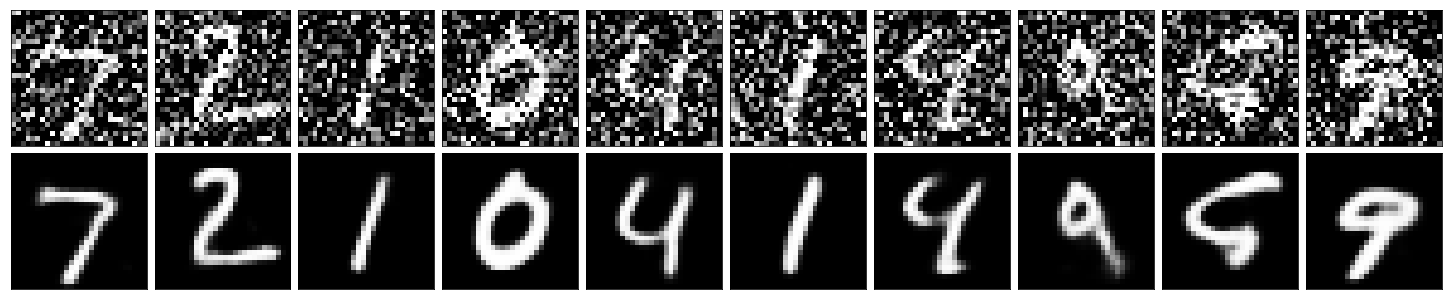

In [61]:
#定义某些图片
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True,figsize=(20,4))#设置行为2列为10的图像 图像像素为20x4

#可视化一些图片
input_images = mnist_dataset.test.images[:10] #可视化前十个图像
noisy_imges = input_images + mnist_noise_factor * np.random.randn(*input_images.shape)#把输入图片贴加噪声 
#mnist_noise_factor = 0.5
#剪切和重塑噪声图像
noisy_images = np.clip(noisy_imges, 0.,1.).reshape((10,28,28,1))

#得到重构的图像
reconstructed_images = sess.run(decoding_layer, feed_dict={inputs_values:noisy_images})

#可视化输入图像和有噪声的图像
for imgs, row in zip([noisy_images, reconstructed_images], axes):
    for img, ax in zip(imgs, row):
        ax.imshow(img.reshape((28,28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False) #false代表不显示坐标轴
        ax.get_yaxis().set_visible(False)
        
fig.tight_layout(pad=0.1) #调整多个图之间的间隔来减少堆叠，pad值越大，间隔越大

# 总结




在本章中，我们介绍了一种全新的体系结构，可以用于许多有趣的应用程序。自动编码器非常灵活，所以您可以在图像增强、着色或构造方面自由地提出您自己的问题。此外，还有更多的自编码器变体，称为变分自编码器。它们还用于非常有趣的应用程序，例如图像生成。
